# Earthquake Damage Prediction

## Business Case
- To create a predictive model to predict the level of damage grade affected by the earthquake.


## Domain Analysis
* Features
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.
    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.
* Description
    - geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
    - age (type: int): age of the building in years.
    - area_percentage (type: int): normalized area of the building footprint.
    - height_percentage (type: int): normalized height of the building footprint.
    - land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
        - n: Indicates "normal" surface condition.
        - o: Indicates "other" surface condition.
        - t: Indicates "technical" surface condition.
    - foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
        - h: Indicates the use of "hard foundation."
        - i: Indicates the use of "other foundation."
        - r: Indicates the use of "reinforced foundation."
        - u: Indicates the use of "bamboo foundation."
        - w: Indicates the use of "wooden foundation."

    - roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
        - n: Indicates the use of a "normal" roof type.
        - q: Indicates the use of a "hip" roof type.
        - x: Indicates the use of an "unknown" roof type.
    - ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
        - f: Indicates a ground floor made of "fine aggregate concrete."
        - m: Indicates a ground floor made of "mud."
        - v: Indicates a ground floor made of "not applicable" material.
        - x: Indicates a ground floor made of "timber."
        - z: Indicates a ground floor made of "zinc."
    - other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - position (type: categorical): position of the building. Possible values: j, o, s, t.
        - j: Indicates the building is in a "j" (juvenile) position.
        - o: Indicates the building is in an "o" (other) position.
        - s: Indicates the building is in an "s" (secondary) position.
        - t: Indicates the building is in a "t" (tertiary) position.
    - plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
    - has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
    - has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
    - has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
    - has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
    - legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
        - a: Indicates "other" legal ownership status.
        - r: Indicates "rented" legal ownership status.
        - v: Indicates "private" legal ownership status.
        - w: Indicates "public" legal ownership status. 
        
    - count_families (type: int): number of families that live in the building.
    - has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
    - has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
    - has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
    - has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
    - has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
    - has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
    - has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
    - has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
    - has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
    - has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
    - has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.


### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autoviz.AutoViz_Class import AutoViz_Class

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from category_encoders import CountEncoder

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV,TimeSeriesSplit
from sklearn.utils import class_weight


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from kerastuner.tuners import RandomSearch


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


## Basic Checks

In [2]:
data1=pd.read_csv("train_labels.csv")
data1

building_id  damage_grade
0         802906           3     
1          28830           2     
2          94947           3     
3         590882           2     
4         201944           3     
...             ...           ...
260596    688636           2     
260597    669485           3     
260598    602512           3     
260599    151409           2     
260600    747594           3     

[260601 rows x 2 columns]

In [3]:
data2=pd.read_csv("train_values.csv")
data2

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0         802906            6              487            12198       
1          28830            8              900             2812       
2          94947           21              363             8973       
3         590882           22              418            10694       
4         201944           11              131             1488       
...             ...             ...             ...             ...   
260596    688636           25             1335             1621       
260597    669485           17              715             2060       
260598    602512           17               51             8163       
260599    151409           26               39             1851       
260600    747594           21                9             9101       

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                2           30          6                 5           
1                2           10          8                 7           
2                2           10          5                 5           
3                2           10          6                 5           
4                3           30          8                 9           
...                     ...  ...              ...                ...   
260596           1           55          6                 3           
260597           2            0          6                 5           
260598           3           55          6                 7           
260599           2           10         14                 6           
260600           3           10          7                 6           

       land_surface_condition foundation_type roof_type ground_floor_type  \
0                 t                   r            n             f          
1                 o                   r            n             x          
2                 t                   r            n             f          
3                 t                   r            n             f          
4                 t                   r            n             f          
...                       ...             ...       ...               ...   
260596            n                   r            n             f          
260597            t                   r            n             f          
260598            t                   r            q             f          
260599            t                   r            x             v          
260600            n                   r            n             f          

       other_floor_type position plan_configuration  \
0              q            t             d           
1              q            s             d           
2              x            t             d           
3              x            s             d           
4              x            s             d           
...                 ...      ...                ...   
260596         j            s             q           
260597         q            s             d           
260598         q            s             d           
260599         s            j             d           
260600         q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ...   
260596                0                                1                    
260597                0                                1                    
260598     

In [4]:
data = pd.merge(data1,data2,on='building_id',how='inner')
data

building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0         802906           3              6              487        
1          28830           2              8              900        
2          94947           3             21              363        
3         590882           2             22              418        
4         201944           3             11              131        
...             ...           ...             ...             ...   
260596    688636           2             25             1335        
260597    669485           3             17              715        
260598    602512           3             17               51        
260599    151409           2             26               39        
260600    747594           3             21                9        

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0            12198               2           30          6          
1             2812               2           10          8          
2             8973               2           10          5          
3            10694               2           10          6          
4             1488               3           30          8          
...                ...                  ...  ...              ...   
260596        1621               1           55          6          
260597        2060               2            0          6          
260598        8163               3           55          6          
260599        1851               2           10         14          
260600        9101               3           10          7          

        height_percentage land_surface_condition foundation_type roof_type  \
0               5                    t                   r            n      
1               7                    o                   r            n      
2               5                    t                   r            n      
3               5                    t                   r            n      
4               9                    t                   r            n      
...                   ...                    ...             ...       ...   
260596          3                    n                   r            n      
260597          5                    t                   r            n      
260598          7                    t                   r            q      
260599          6                    t                   r            x      
260600          6                    n                   r            n      

       ground_floor_type other_floor_type position plan_configuration  \
0               f                q            t             d           
1               x                q            s             d           
2               f                x            t             d           
3               f                x            s             d           
4               f                x            s             d           
...                  ...              ...      ...                ...   
260596          f                j            s             q           
260597          f                q            s             d           
260598          f                q            s             d           
260599          v                s            j             d           
260600          f                q            j             d           

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ... 

In [5]:
data.head(10)

building_id  damage_grade  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0    802906           3              6              487            12198       
1     28830           2              8              900             2812       
2     94947           3             21              363             8973       
3    590882           2             22              418            10694       
4    201944           3             11              131             1488       
5    333020           2              8              558             6089       
6    728451           3              9              475            12066       
7    475515           1             20              323            12236       
8    441126           2              0              757             7219       
9    989500           1             26              886              994       

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0           2           30          6                 5           
1           2           10          8                 7           
2           2           10          5                 5           
3           2           10          6                 5           
4           3           30          8                 9           
5           2           10          9                 5           
6           2           25          3                 4           
7           2            0          8                 6           
8           2           15          8                 6           
9           1            0         13                 4           

  land_surface_condition foundation_type roof_type ground_floor_type  \
0            t                   r            n             f          
1            o                   r            n             x          
2            t                   r            n             f          
3            t                   r            n             f          
4            t                   r            n             f          
5            t                   r            n             f          
6            n                   r            n             x          
7            t                   w            q             v          
8            t                   r            q             f          
9            t                   i            n             v          

  other_floor_type position plan_configuration  has_superstructure_adobe_mud  \
0         q            t             d                        1                
1         q            s             d                        0                
2         x            t             d                        0                
3         x            s             d                        0                
4         x            s             d                        1                
5         q            s             d                        0                
6         q            s             d                        0                
7         x            s             u                        0                
8         q            s             d                        0                
9         j            s             d                        0                

   has_superstructure_mud_mortar_stone  has_superstructure_stone_flag  \
0                   1                                 0                 
1                   1                                 0                 
2                   1                                 0                 
3                   1                                 0                 
4                   0                                 0                 
5                   1                                 0                 
6                   1                                 0                 
7                   0                                 0                 
8                   1                                

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [7]:
data.describe().T.style.bar(subset=['mean'],color='#93d206').background_gradient(subset=['std'],cmap="Accent")\
.background_gradient(subset=['50%'],cmap="tab10")

In [8]:
data.describe(include="O").T

count  unique top   freq 
land_surface_condition  260601    3     t  216757
foundation_type         260601    5     r  219196
roof_type               260601    3     n  182842
ground_floor_type       260601    5     f  209619
other_floor_type        260601    4     q  165282
position                260601    4     s  202090
plan_configuration      260601   10     d  250072
legal_ownership_status  260601    4     v  250939

## Exploratory Data Analysis

### Univarate Analysis

In [56]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Distribution of damage grade (target variable)

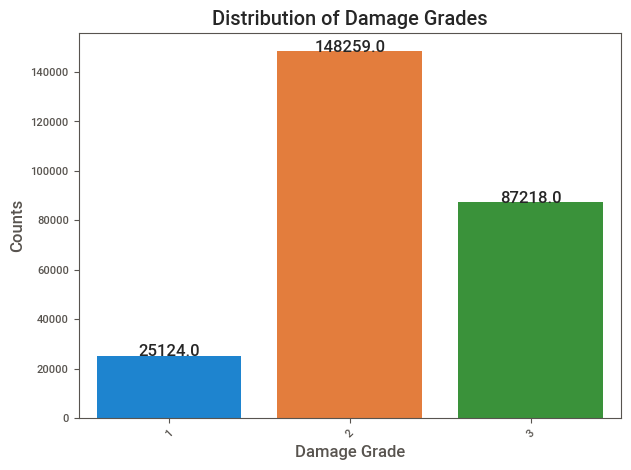

In [57]:
plt.figure(figsize=(7, 5))  

# Create the countplot
sns.countplot(data=data, x='damage_grade')

# Add labels and title
plt.xlabel('Damage Grade')
plt.ylabel('Counts')
plt.title('Distribution of Damage Grades')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')

plt.show()


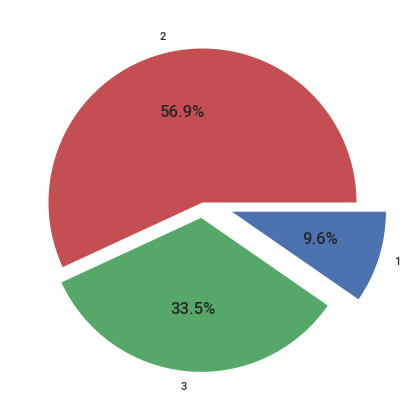

In [58]:
label = list(data['damage_grade'].value_counts().index)
explode  = (0,0.1,0.2)

plt.figure(figsize = (7,5))
plt.pie(data['damage_grade'].value_counts(), labels = label, explode = explode, autopct = '%.1f%%', colors = ['r','g','b'])
plt.show()

### Observations made from the pie chat
- 1 represents low damage
- 2 represents a medium amount of damage
- 3 represents almost complete destruction



    - 9.6% of the buildings experienced minor damage from the earthquake.
    - 56.9% incurred moderate damage.
    - 33.5% suffered severe damage due to the earthquake.

### To investigate whether the geographic region in which building exists has an impact on the extent of damage caused by an earthquake.

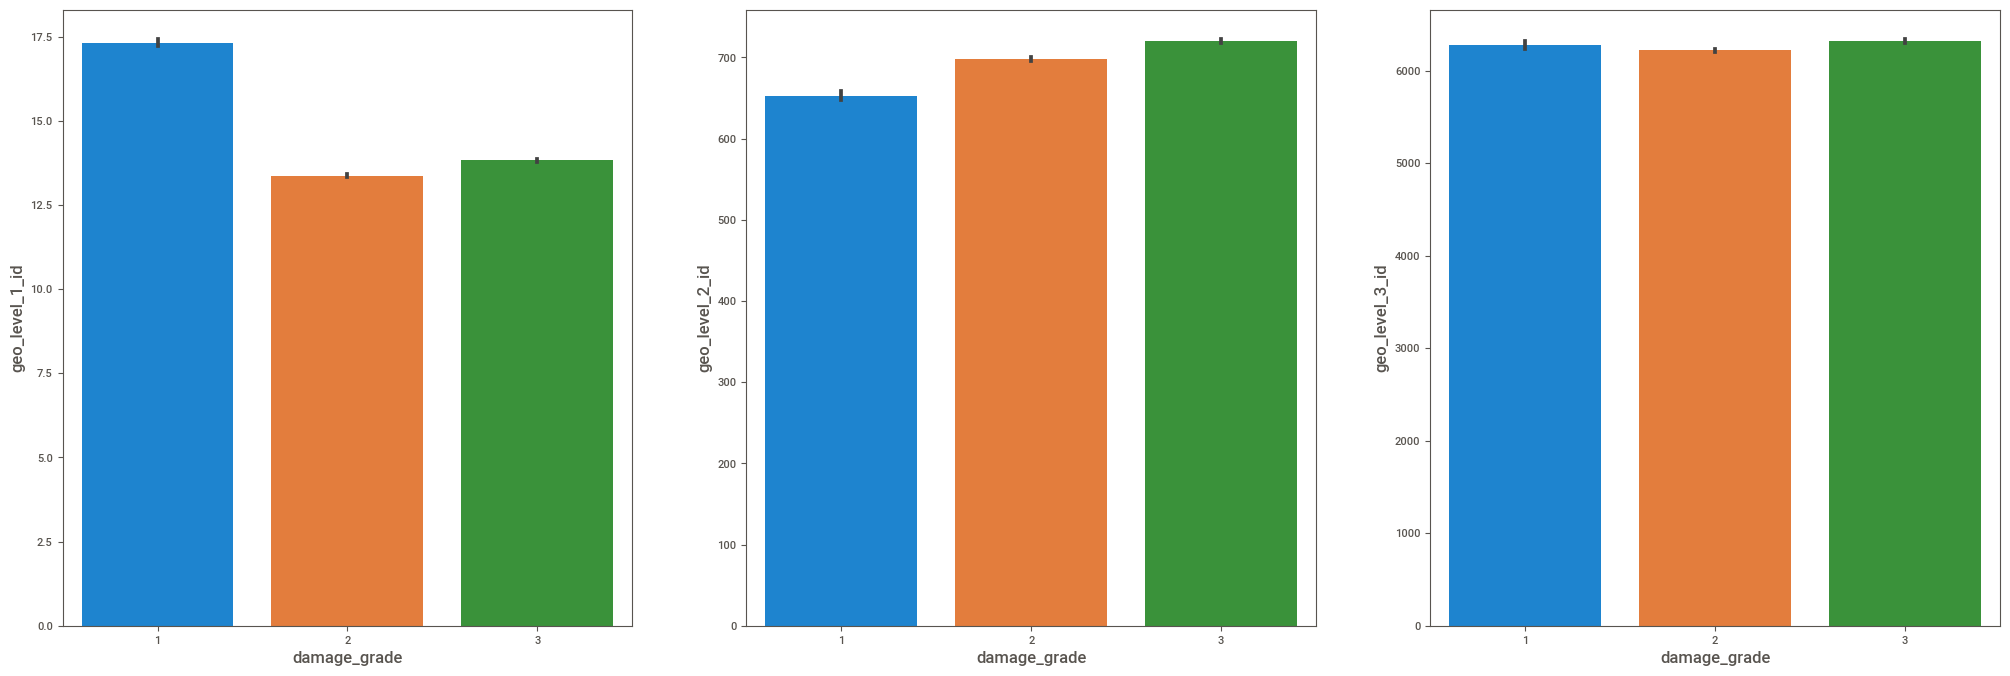

In [59]:
plt.figure(figsize=(25, 8))

plt.subplot(1, 3, 1)
sns.barplot(data=data, x='damage_grade', y='geo_level_1_id')

plt.subplot(1, 3, 2)
sns.barplot(data=data, x='damage_grade', y='geo_level_2_id')

plt.subplot(1, 3, 3)
sns.barplot(data=data, x='damage_grade', y='geo_level_3_id')

plt.show()


### To investigate whether the age of a building has an impact on the extent of damage caused by an earthquake, we will analyze the data and assess the relationship between the age of buildings and the earthquake damage.

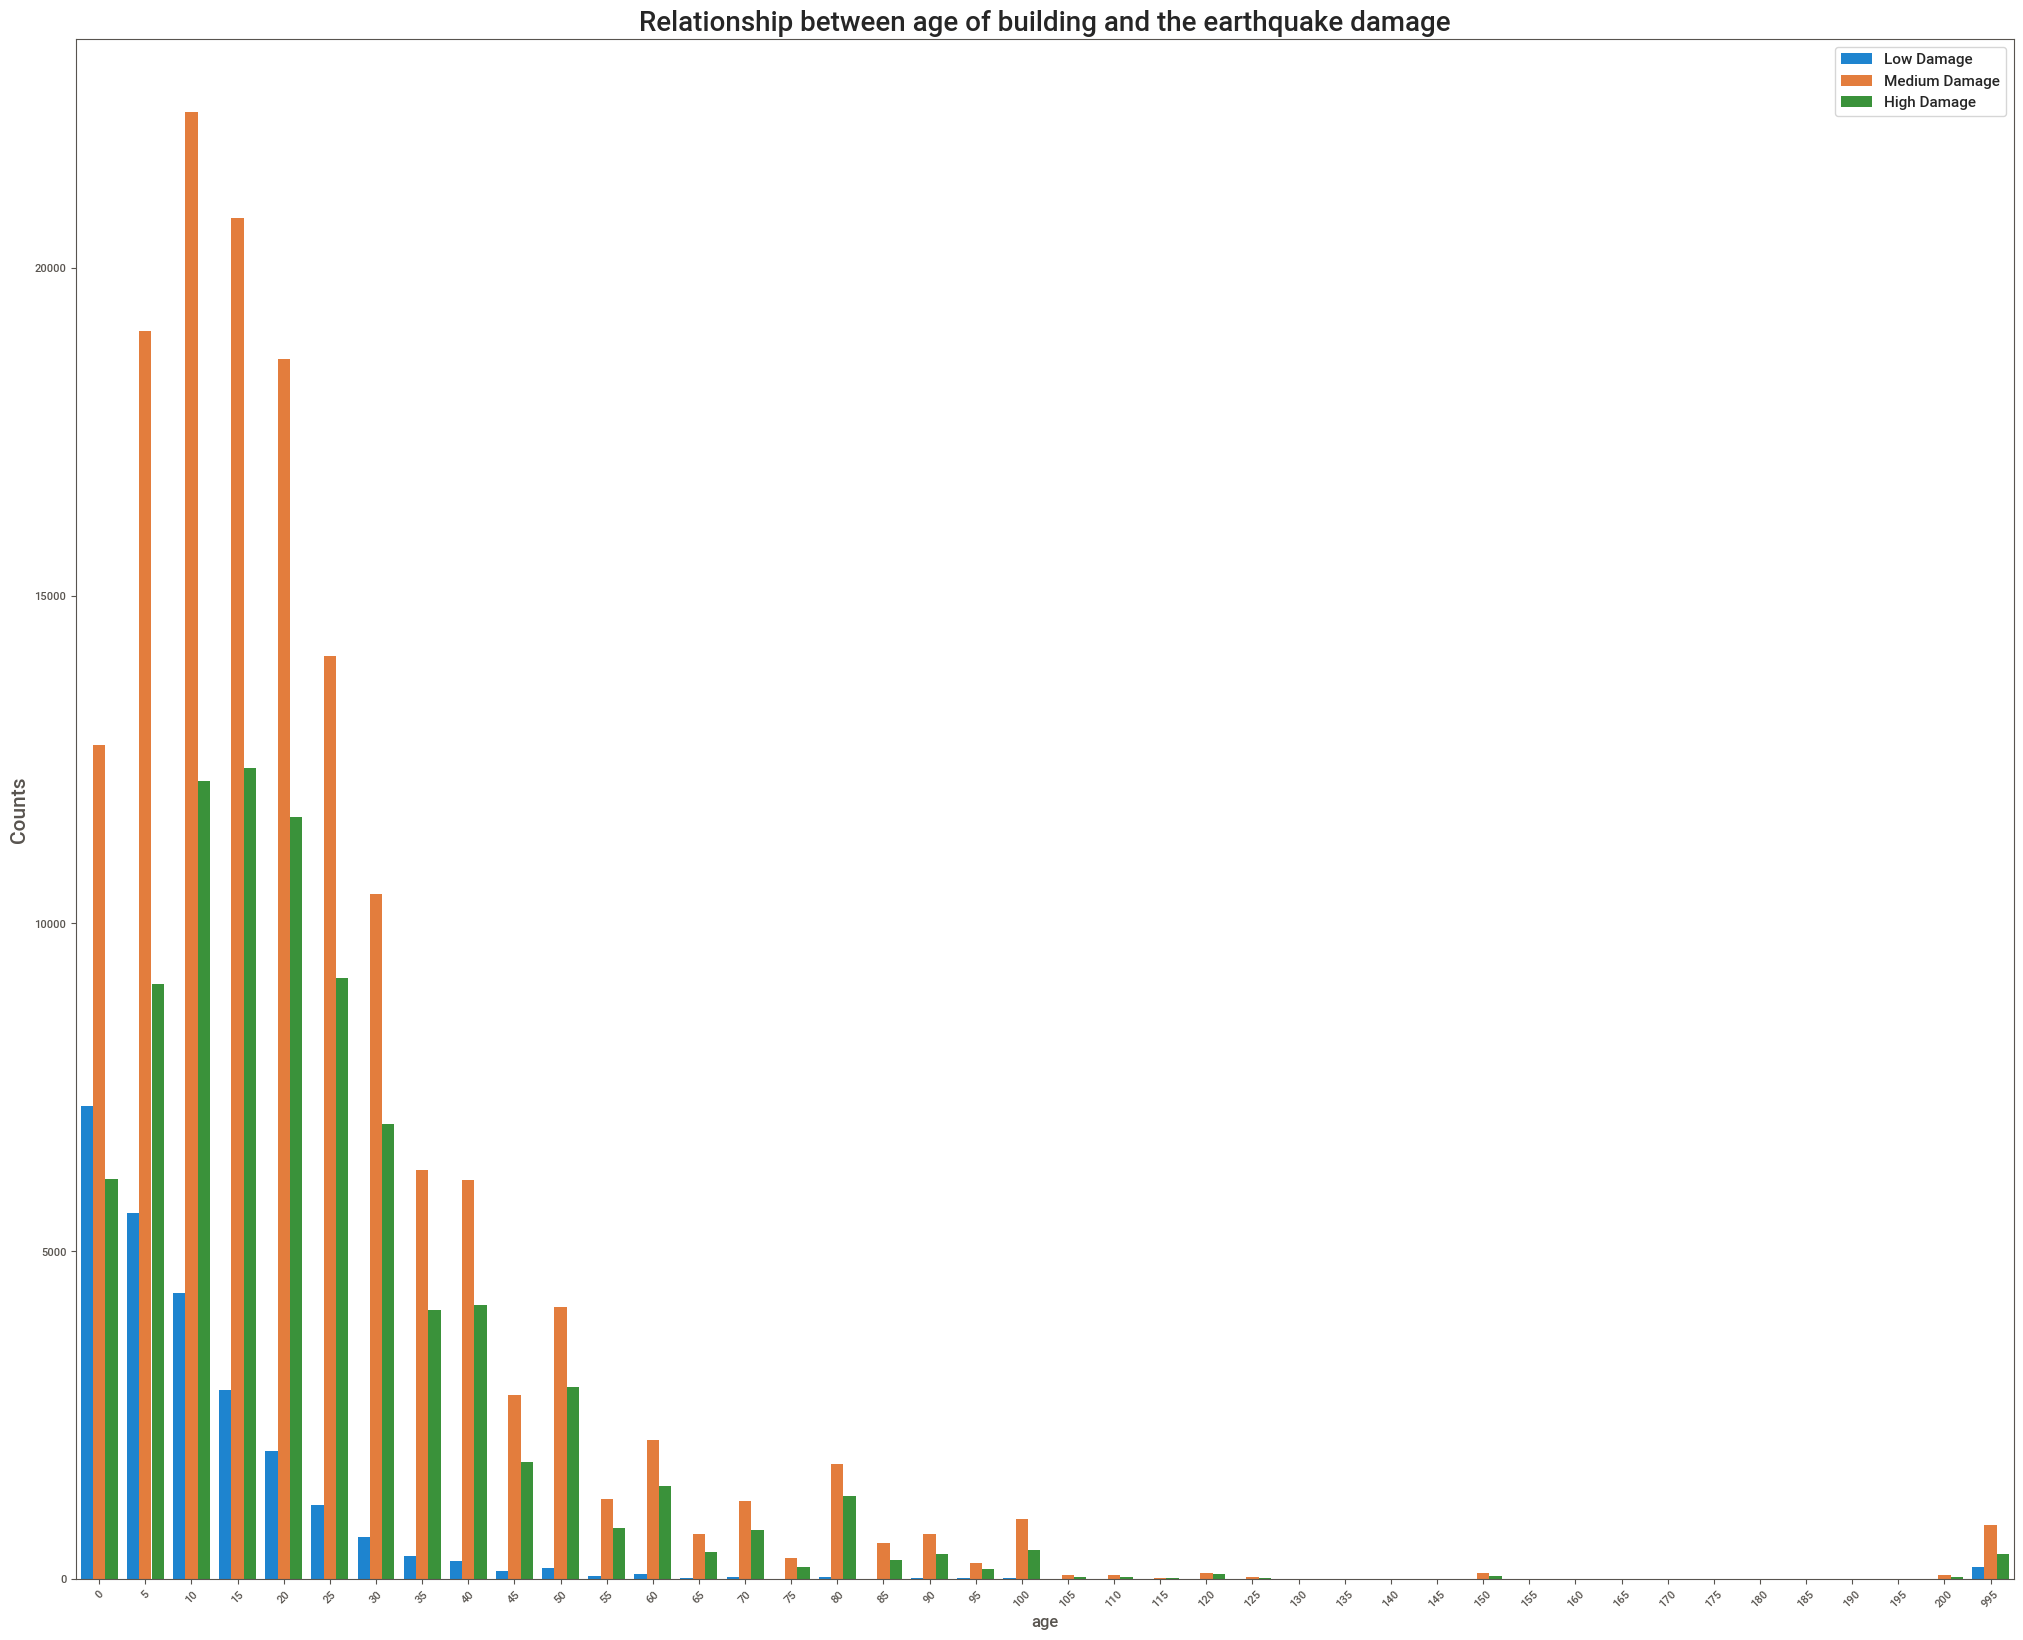

In [60]:
plt.figure(figsize=(25, 20))
sns.countplot(x = data['age'], hue = data['damage_grade'])
plt.title('Relationship between age of building and the earthquake damage',fontweight = 'bold', fontsize = 20)
plt.ylabel('Counts',fontsize = 15, fontweight = 'bold')
plt.legend(['Low Damage', 'Medium Damage', 'High Damage'], loc = 'upper right')
plt.xticks(rotation = 45)
plt.show()

### Plot to show how each categorical feature correlate with the target variable (damage_grade)

In [63]:
# Create a new dataframe with categorical variables only 
cat_features = []
for columns in data.columns:
    if data[columns].dtype=='O':
        cat_features.append(columns)

In [64]:
cat_features

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [65]:
# creating dataframe (converting the list to dataframe)for the categorical features
cat_features_df = pd.DataFrame({col: data[col] for col in cat_features})

In [66]:
cat_features_df

land_surface_condition foundation_type roof_type ground_floor_type  \
0                 t                   r            n             f          
1                 o                   r            n             x          
2                 t                   r            n             f          
3                 t                   r            n             f          
4                 t                   r            n             f          
...                       ...             ...       ...               ...   
260596            n                   r            n             f          
260597            t                   r            n             f          
260598            t                   r            q             f          
260599            t                   r            x             v          
260600            n                   r            n             f          

       other_floor_type position plan_configuration legal_ownership_status  
0              q            t             d                    v            
1              q            s             d                    v            
2              x            t             d                    v            
3              x            s             d                    v            
4              x            s             d                    v            
...                 ...      ...                ...                    ...  
260596         j            s             q                    v            
260597         q            s             d                    v            
260598         q            s             d                    v            
260599         s            j             d                    v            
260600         q            j             d                    v            

[260601 rows x 8 columns]

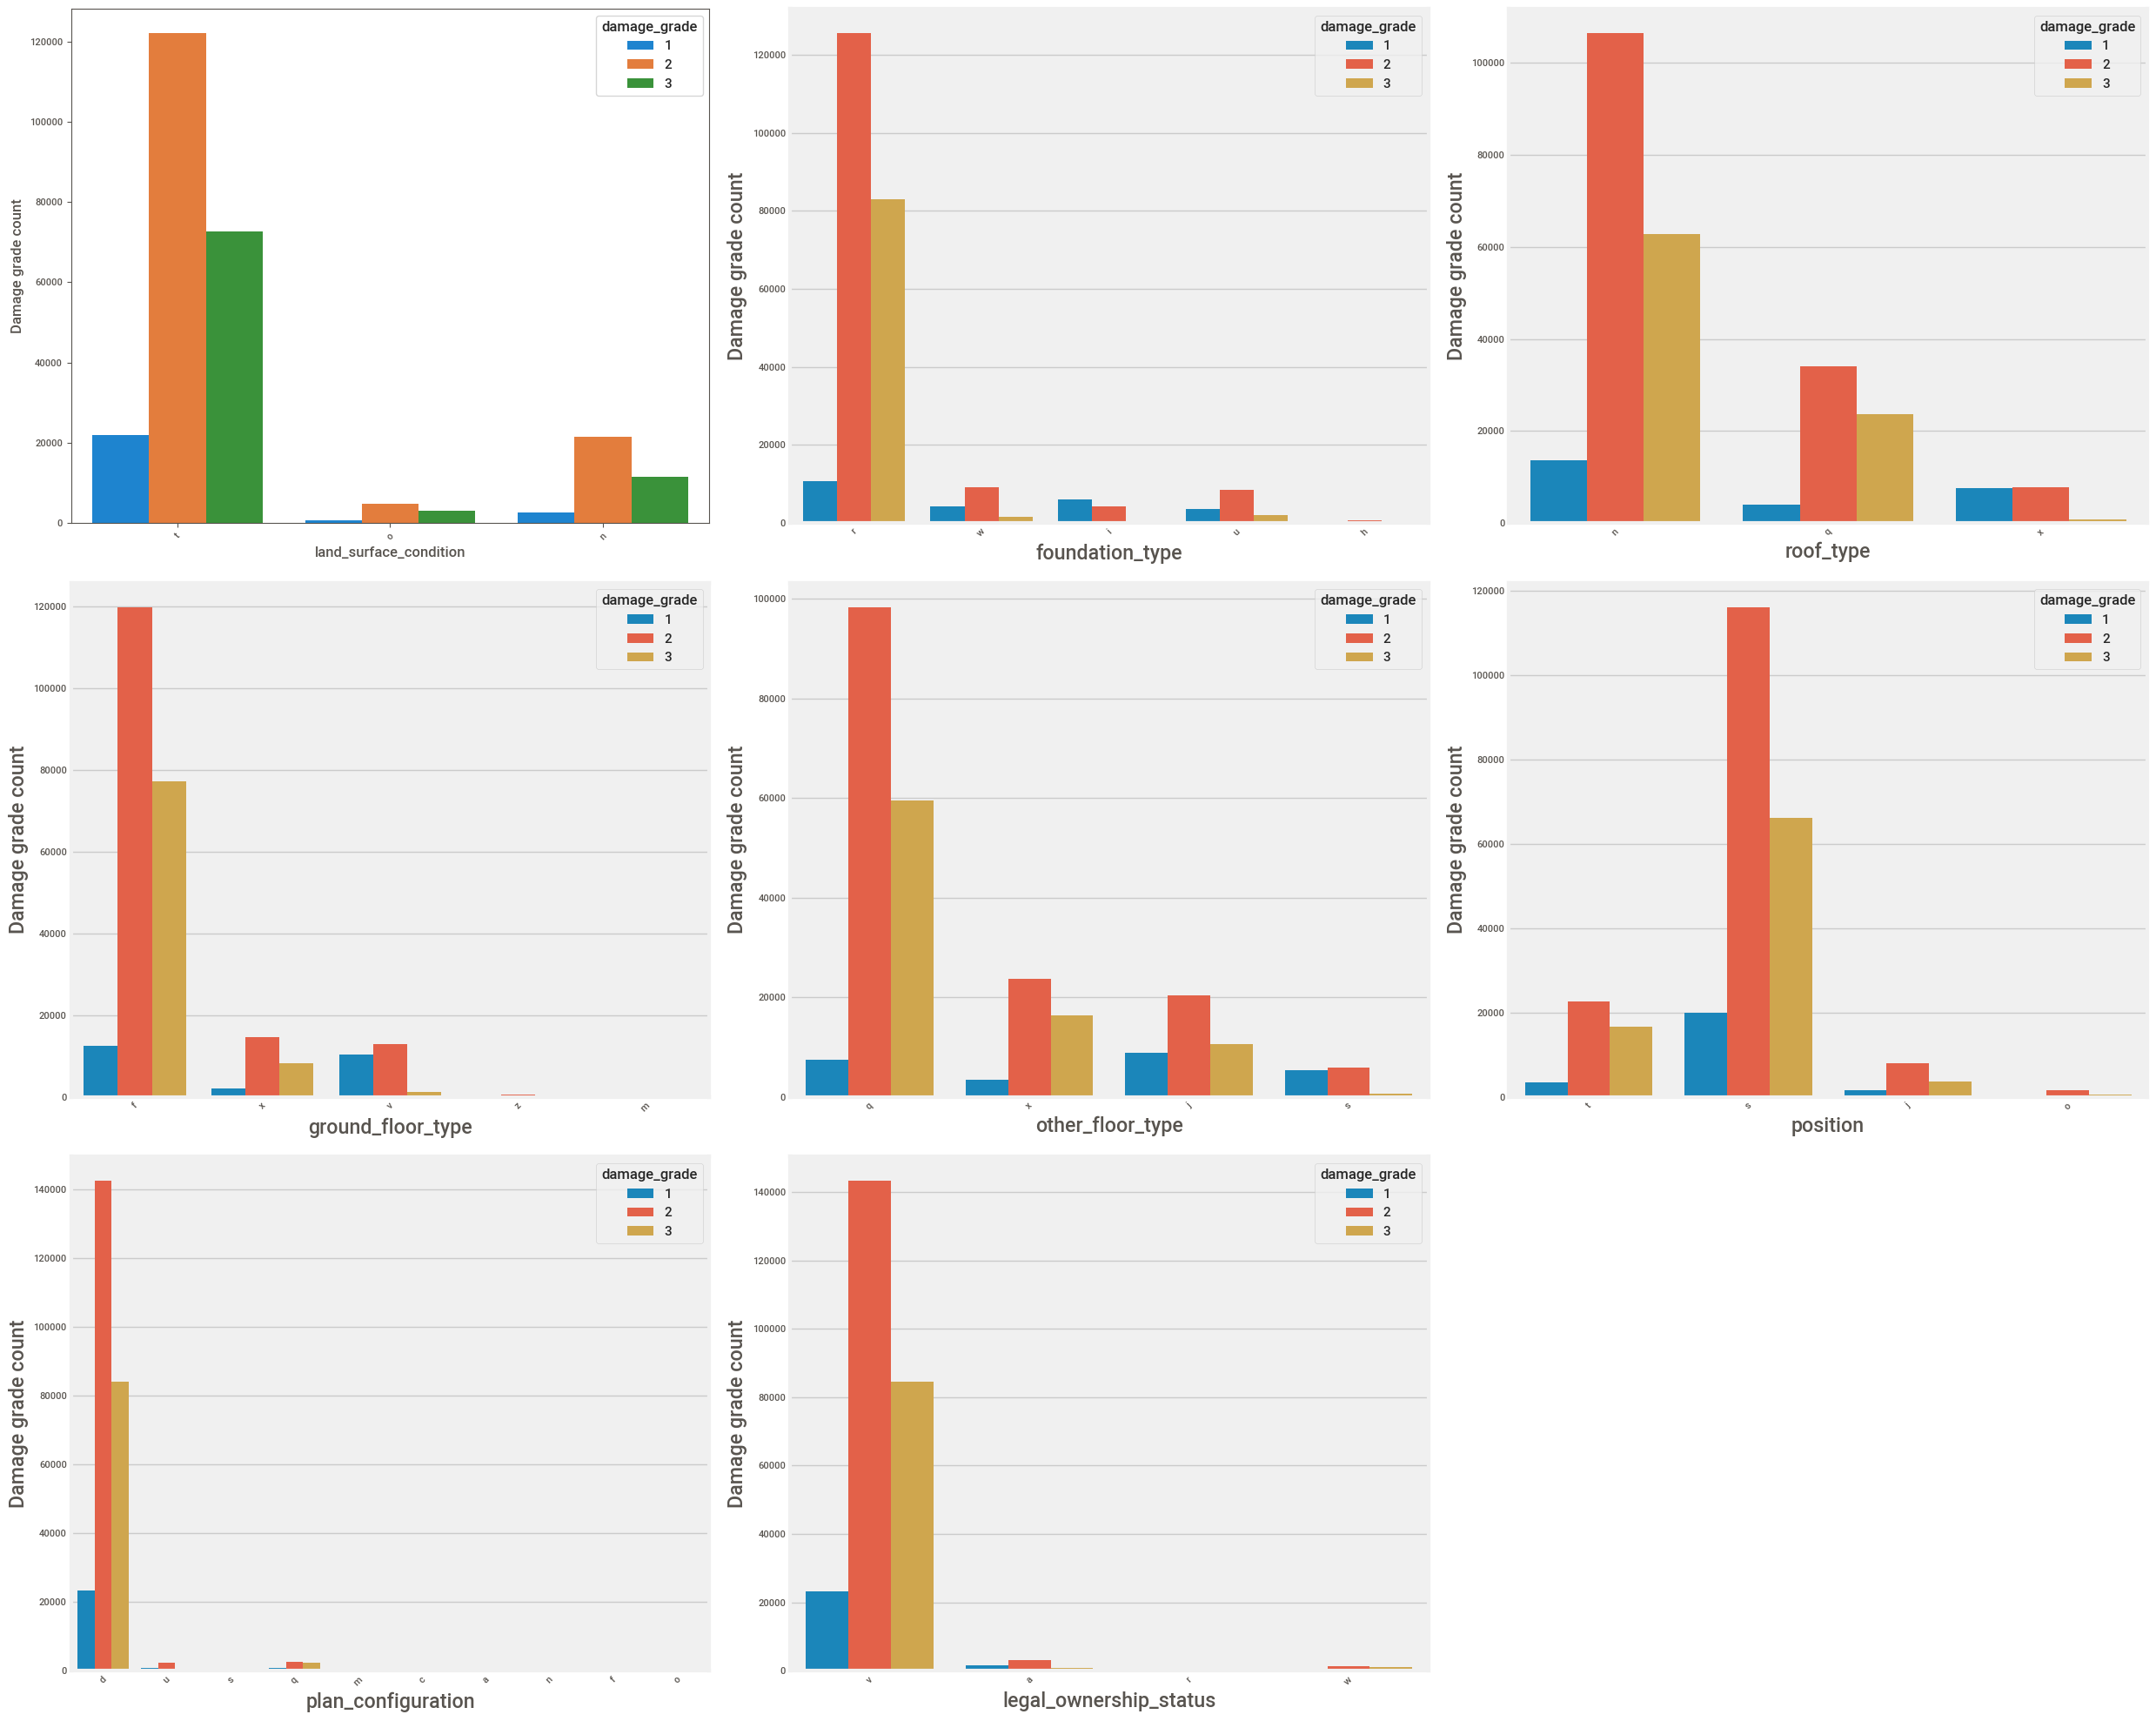

In [67]:
# plot to show how each categorical feature correlate with the target variable (damage_grade)
plt.figure(figsize = (25,20))
plotnumber = 1
for column in cat_features_df:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x = cat_features_df[column], hue = data['damage_grade'])
        plt.xlabel(column,fontweight = 'bold')
        plt.ylabel('Damage grade count',fontweight = 'bold')
        plt.xticks(rotation = 45)
        plt.rcParams['font.size'] = 16  
        plt.style.use('fivethirtyeight')
    plotnumber+=1
plt.tight_layout()
plt.show()

### Plot to show how each binary feature correlate with the target variable (damage_grade)

In [68]:
# Create new dataframe with binary features
bin_features = []
for column in data.columns:
    if set(data[column].unique())=={0,1}:
        bin_features.append(column)

In [69]:
bin_features

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [70]:
bin_features_df = pd.DataFrame({col: data[col] for col in bin_features})
bin_features_df

has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                     1                                1                    
1                     0                                1                    
2                     0                                1                    
3                     0                                1                    
4                     1                                0                    
...                              ...                                  ...   
260596                0                                1                    
260597                0                                1                    
260598                0                                1                    
260599                0                                0                    
260600                0                                1                    

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                     0                                   0                     
1                     0                                   0                     
2                     0                                   0                     
3                     0                                   0                     
4                     0                                   0                     
...                               ...                                     ...   
260596                0                                   0                     
260597                0                                   0                     
260598                0                                   0                     
260599                0                                   0                     
260600                0                                   0                     

        has_superstructure_mud_mortar_brick  \
0                        0                    
1                        0                    
2                        0                    
3                        0                    
4                        0                    
...                                     ...   
260596                   0                    
260597                   0                    
260598                   0                    
260599                   0                    
260600                   0                    

        has_superstructure_cement_mortar_brick  has_superstructure_timber  \
0                          0                                0               
1                          0                                0               
2                          0                                0               
3                          0                                1               
4                          0                                0               
...                                        ...                        ...   
260596                     0                                0               
260597                     0                                0               
260598                     0                                0               
260599                     1                                0               
260600                     0                                0               

        has_superstructure_bamboo  has_superstructure_rc_non_engineered  \
0                   0                                0                    
1                   0                                0                    
2                   0                                0                    
3                   1                                0                    
4                   0                                0                    
...                           ...                                   ...   
260596              0                                0                    
260597              

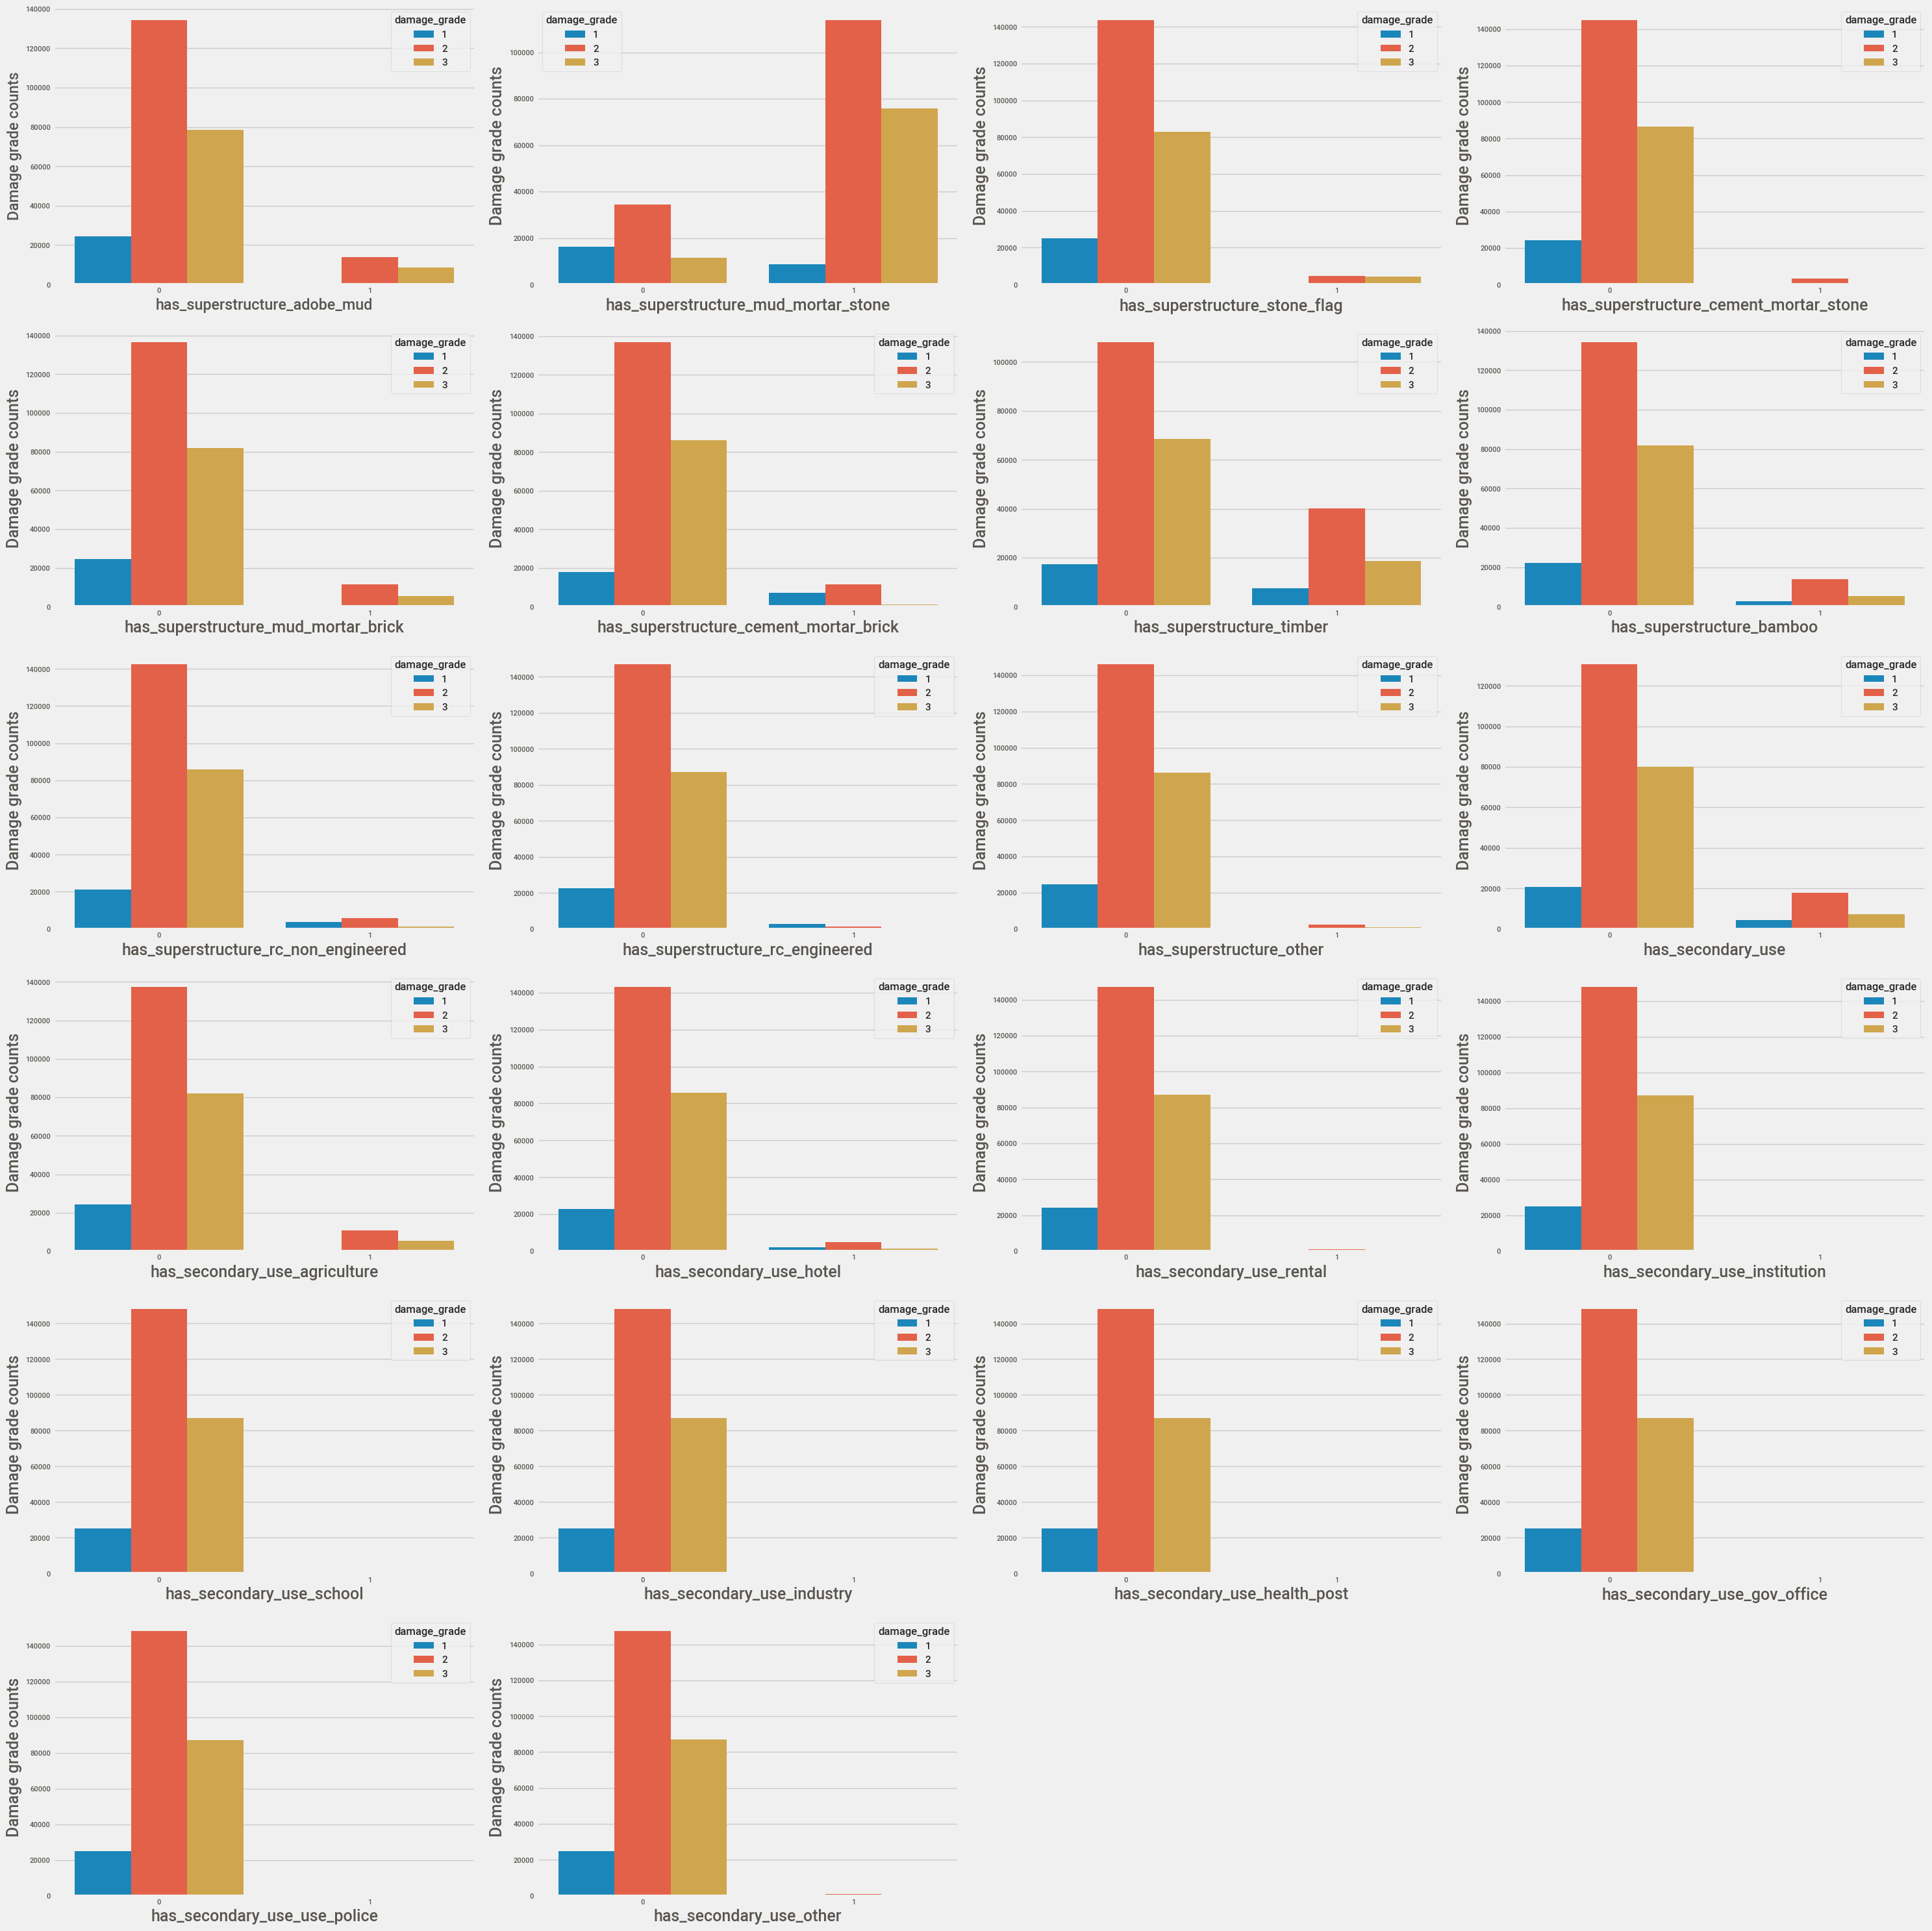

In [71]:
plt.figure(figsize = (30,30))
plotnumber = 1
for column in bin_features_df:
    if plotnumber <= 22:
        ax = plt.subplot(6,4,plotnumber)
        sns.countplot(x = bin_features_df[column], hue = data['damage_grade'])
        plt.xlabel(column, fontweight = 'bold')
        plt.ylabel('Damage grade counts', fontweight = 'bold')
        plt.style.use('fivethirtyeight')
        plt.rcParams['font.size'] = 15    
    plotnumber+=1
plt.tight_layout()
plt.show()

### Plot to show how each continuous feature correlate with the target variable (damage_grade)

In [73]:
#Create new dataframe with continuous features only
con_features = []
for column in data:
    if (data[column].dtype!= 'O' and 
        column not in bin_features and 
        column!='damage_grade' and 
        column!='building_id') :
        con_features.append(column)

In [74]:
con_features

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'count_families']

In [75]:
con_features_df = pd.DataFrame({col: data[col] for col in con_features})
con_features_df

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0              6              487            12198               2            
1              8              900             2812               2            
2             21              363             8973               2            
3             22              418            10694               2            
4             11              131             1488               3            
...                ...             ...             ...                  ...   
260596        25             1335             1621               1            
260597        17              715             2060               2            
260598        17               51             8163               3            
260599        26               39             1851               2            
260600        21                9             9101               3            

        age  area_percentage  height_percentage  count_families  
0       30          6                 5                 1        
1       10          8                 7                 1        
2       10          5                 5                 1        
3       10          6                 5                 1        
4       30          8                 9                 1        
...     ...              ...                ...             ...  
260596  55          6                 3                 1        
260597   0          6                 5                 1        
260598  55          6                 7                 1        
260599  10         14                 6                 1        
260600  10          7                 6                 3        

[260601 rows x 8 columns]

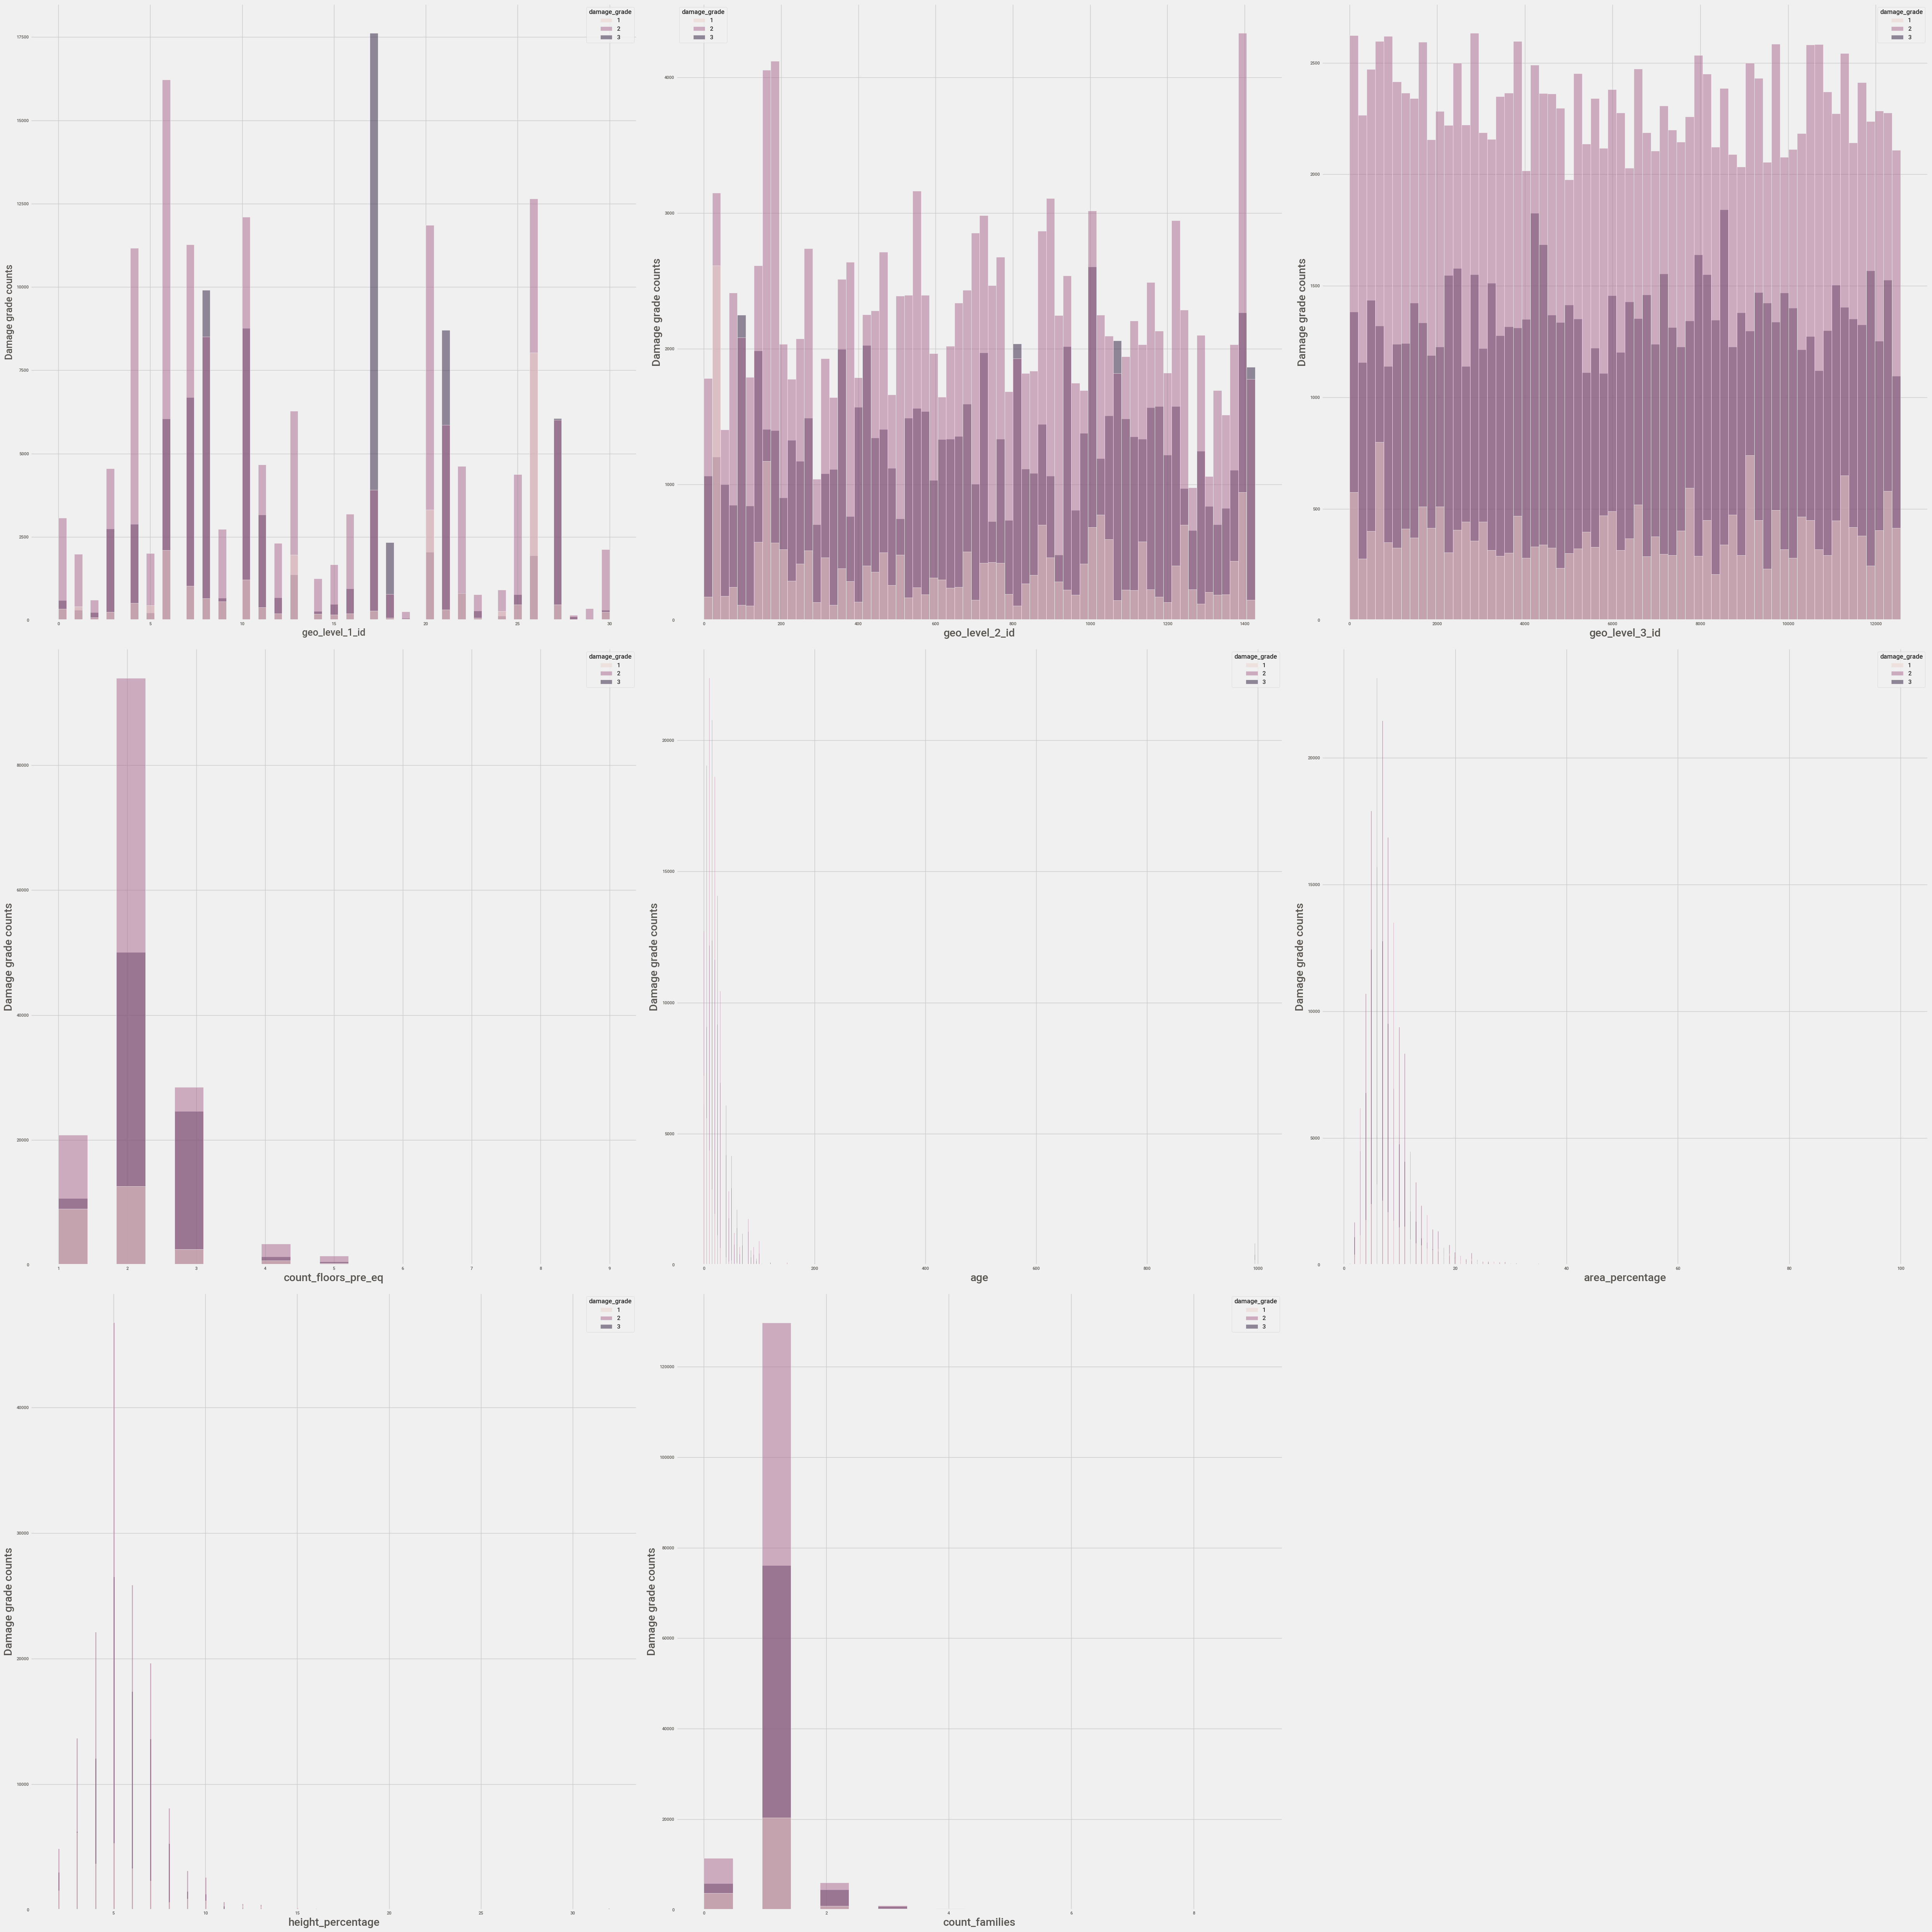

In [76]:
# plotting how each continuous feature correlate with the target variable (damaged_grade)
plt.figure(figsize = (50,50))
plotnumber = 1
for column in con_features_df:
    if plotnumber<=8: 
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x = con_features_df[column], hue = data['damage_grade'])
        plt.xlabel(column, fontweight = 'bold')
        plt.ylabel('Damage grade counts', fontweight = 'bold')
        plt.style.use('fivethirtyeight')
        plt.rcParams['font.size'] = 17    
    plotnumber+=1
plt.tight_layout()
plt.show()

In [9]:
numerical_col = data.select_dtypes(exclude='O').columns
categorical_col = data.select_dtypes(include='O').columns

In [10]:
len(numerical_col)

32

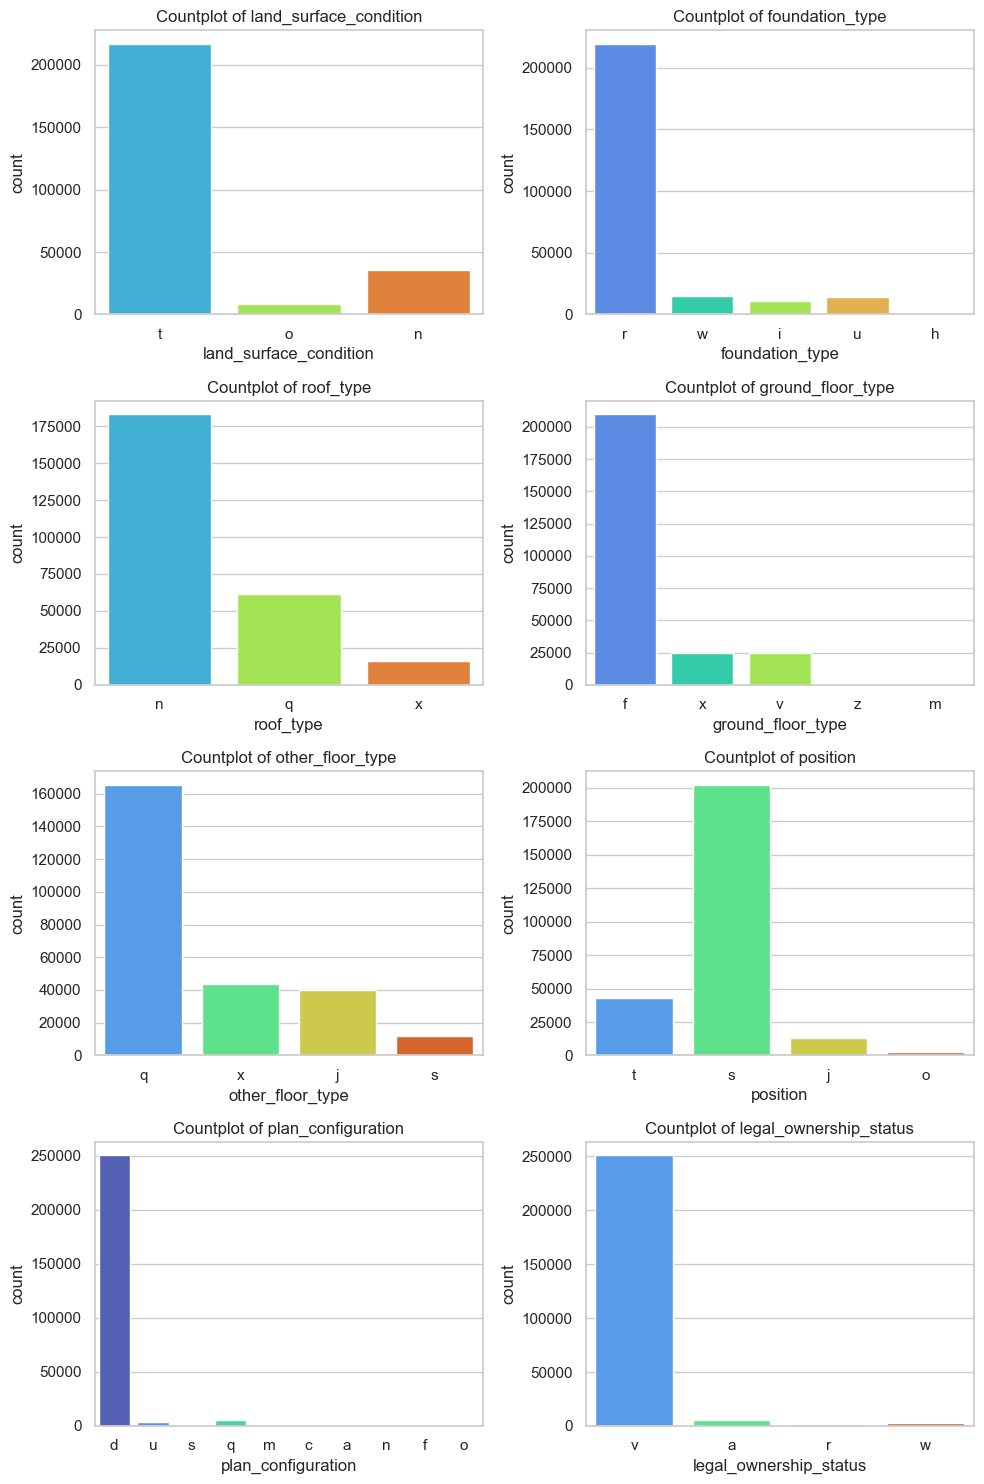

In [11]:
plt.figure(figsize=(10,15))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],palette="turbo")
        plt.title(f'Countplot of {col}')
        pltnum +=1

plt.tight_layout()
plt.show()

#### Insights
- `land_surface_condition`:-more land surface is of t(technical) type.
- `foundation_type`:-more buildings are of r(reinforced) type.
- `roof_type`:-more roofs are of n(normal) type.
- `ground_floor_type`:-more are of f(fine aggregate) type roofs.
- `other_floor_type`:- q type floors are more.
- `position`:-more buildings are in s(secondary) position.
- `plan_configuration`:-d type are more in plan_configuration.
- `legal_ownership_status`:-more are of private owned.

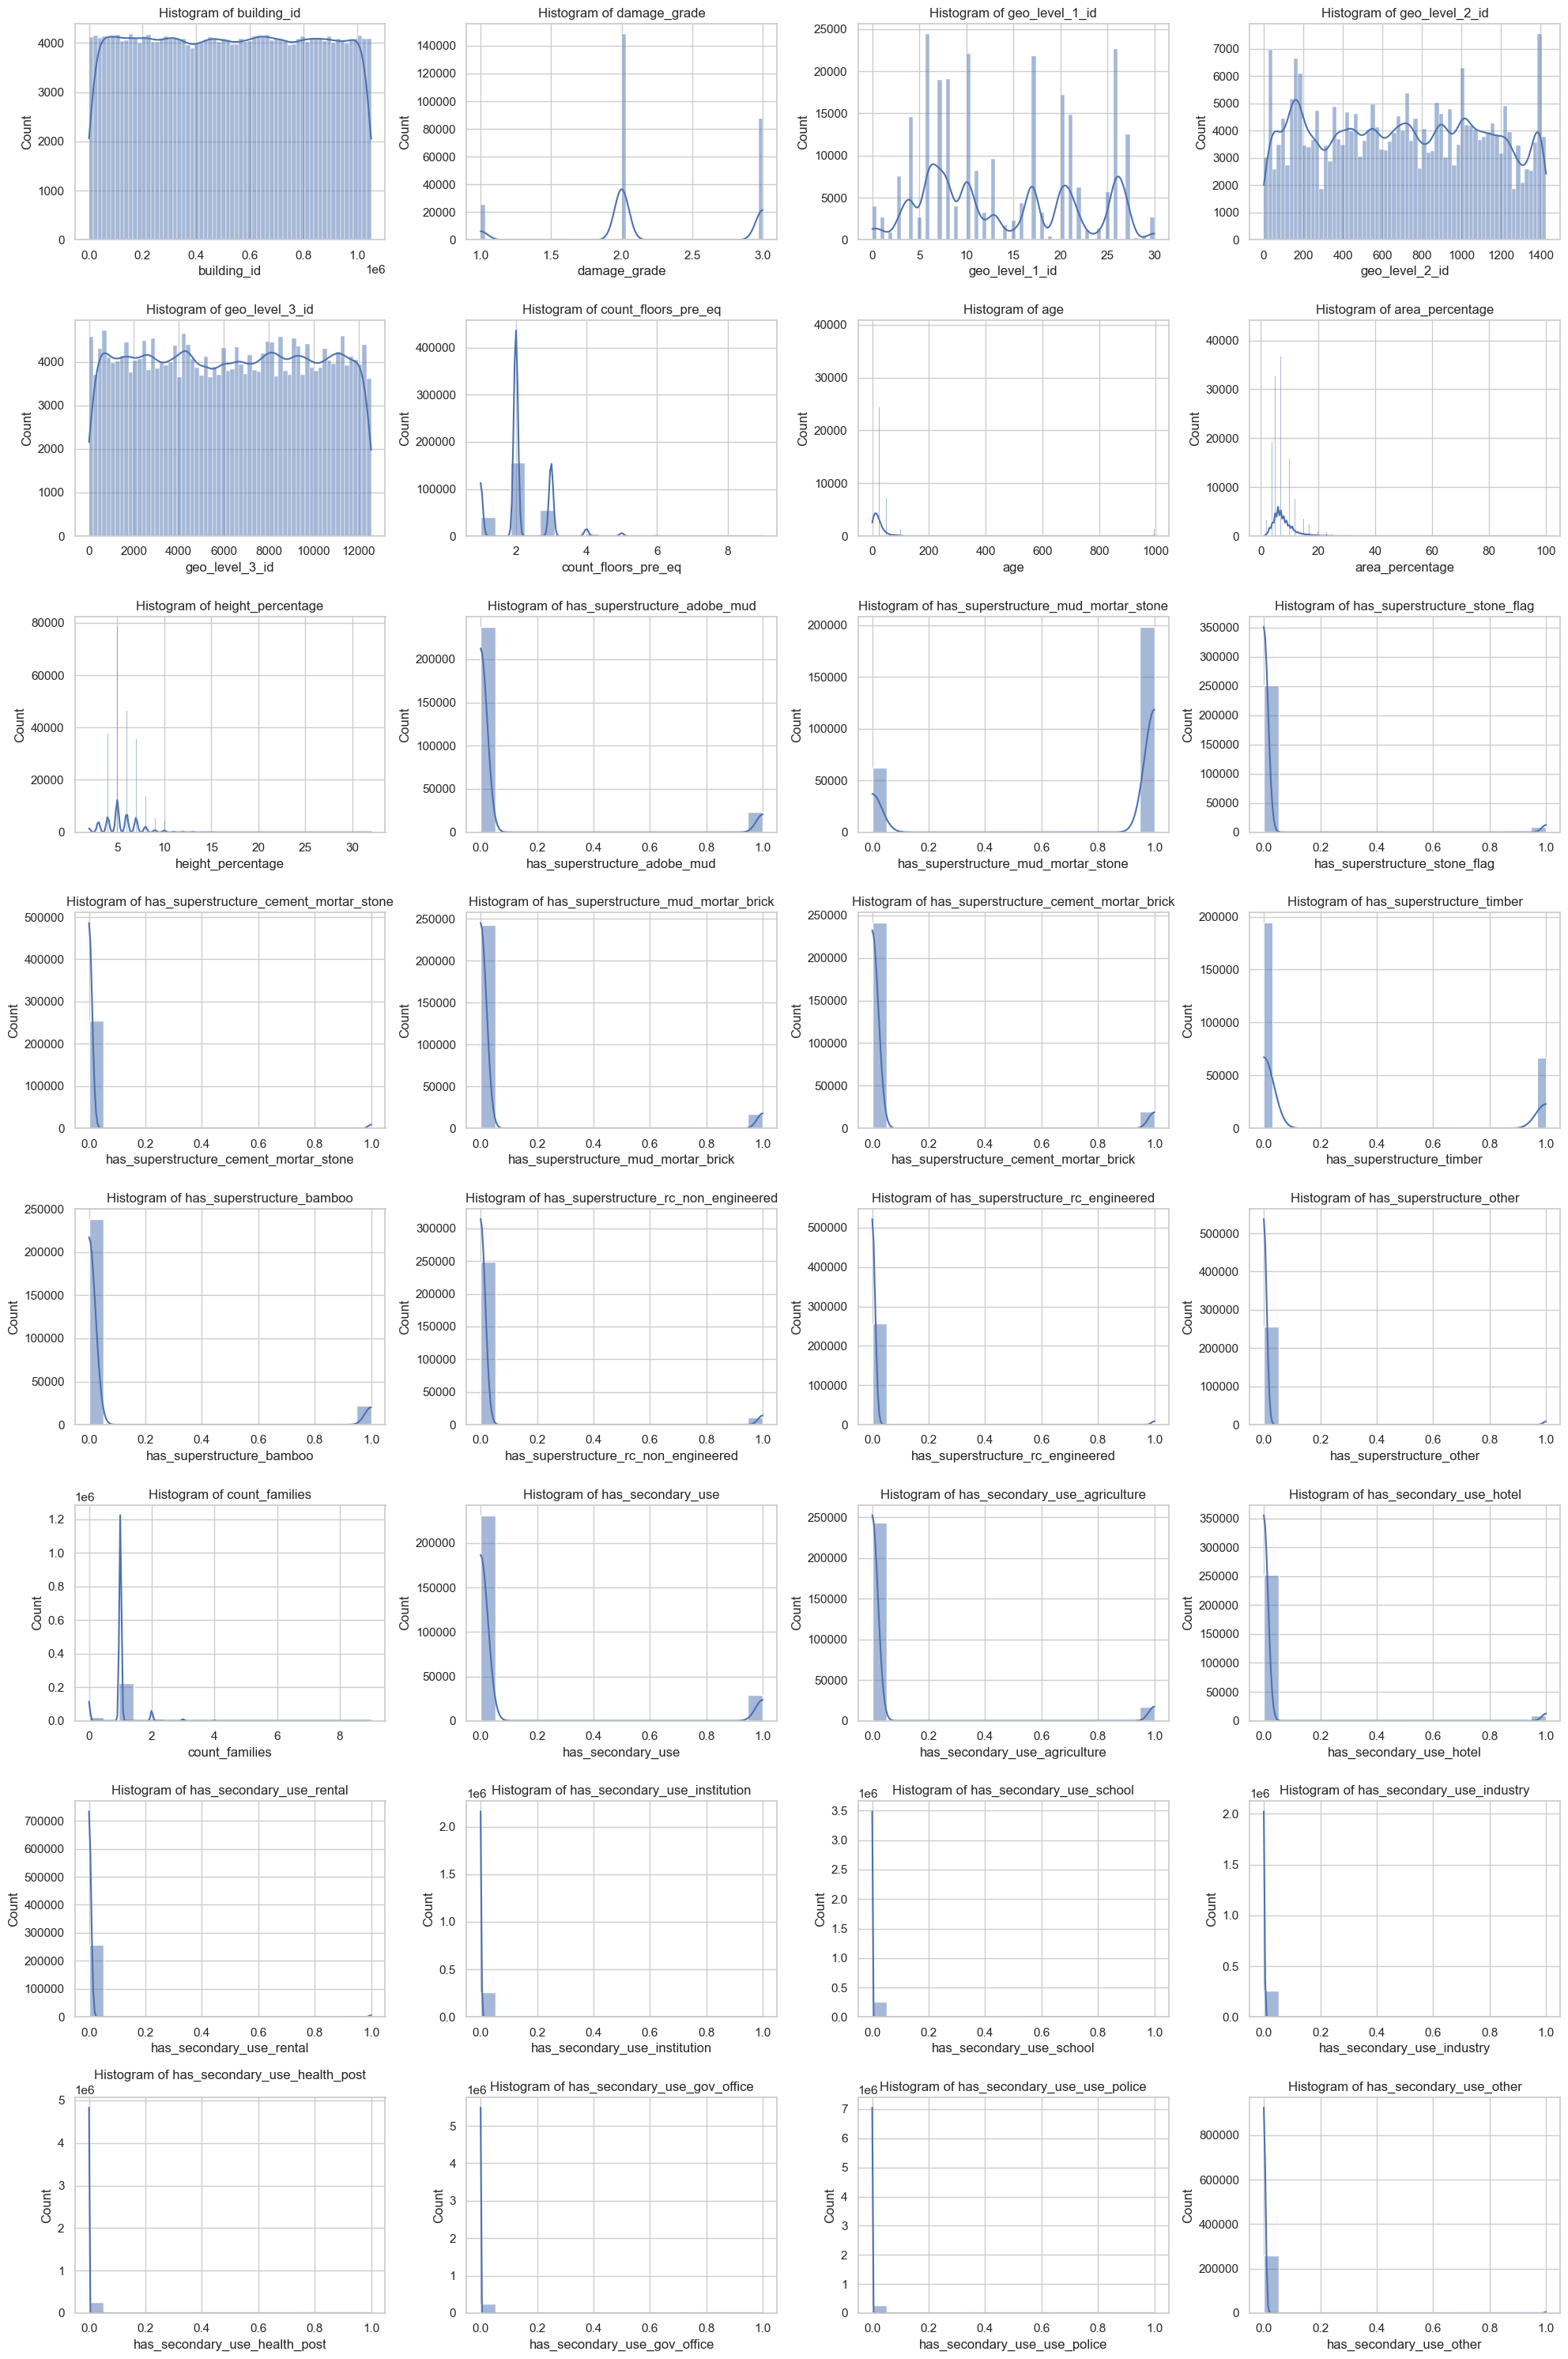

In [12]:
plt.figure(figsize=(20,30))
pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()
plt.show()

**Insights**
* 'has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other' - has discrete values `0 or 1` as its values, where all the features except has_superstructure_mud_mortar_brick has 0 as highest count.
* target column has 3 damage levels,the values are `imbalanced`
* 'building_id','geo_level_1_id', 'geo_level_2_id','geo_level_3_id' doesn't follow a particular pattern ,they are constant features and could be ignored
* age and area_percentage are postively skewed
* most of the buildings are newly build
* 2 storeyed buildings are more
* The independent homes are more compared to apartments


### Bivariate analysis

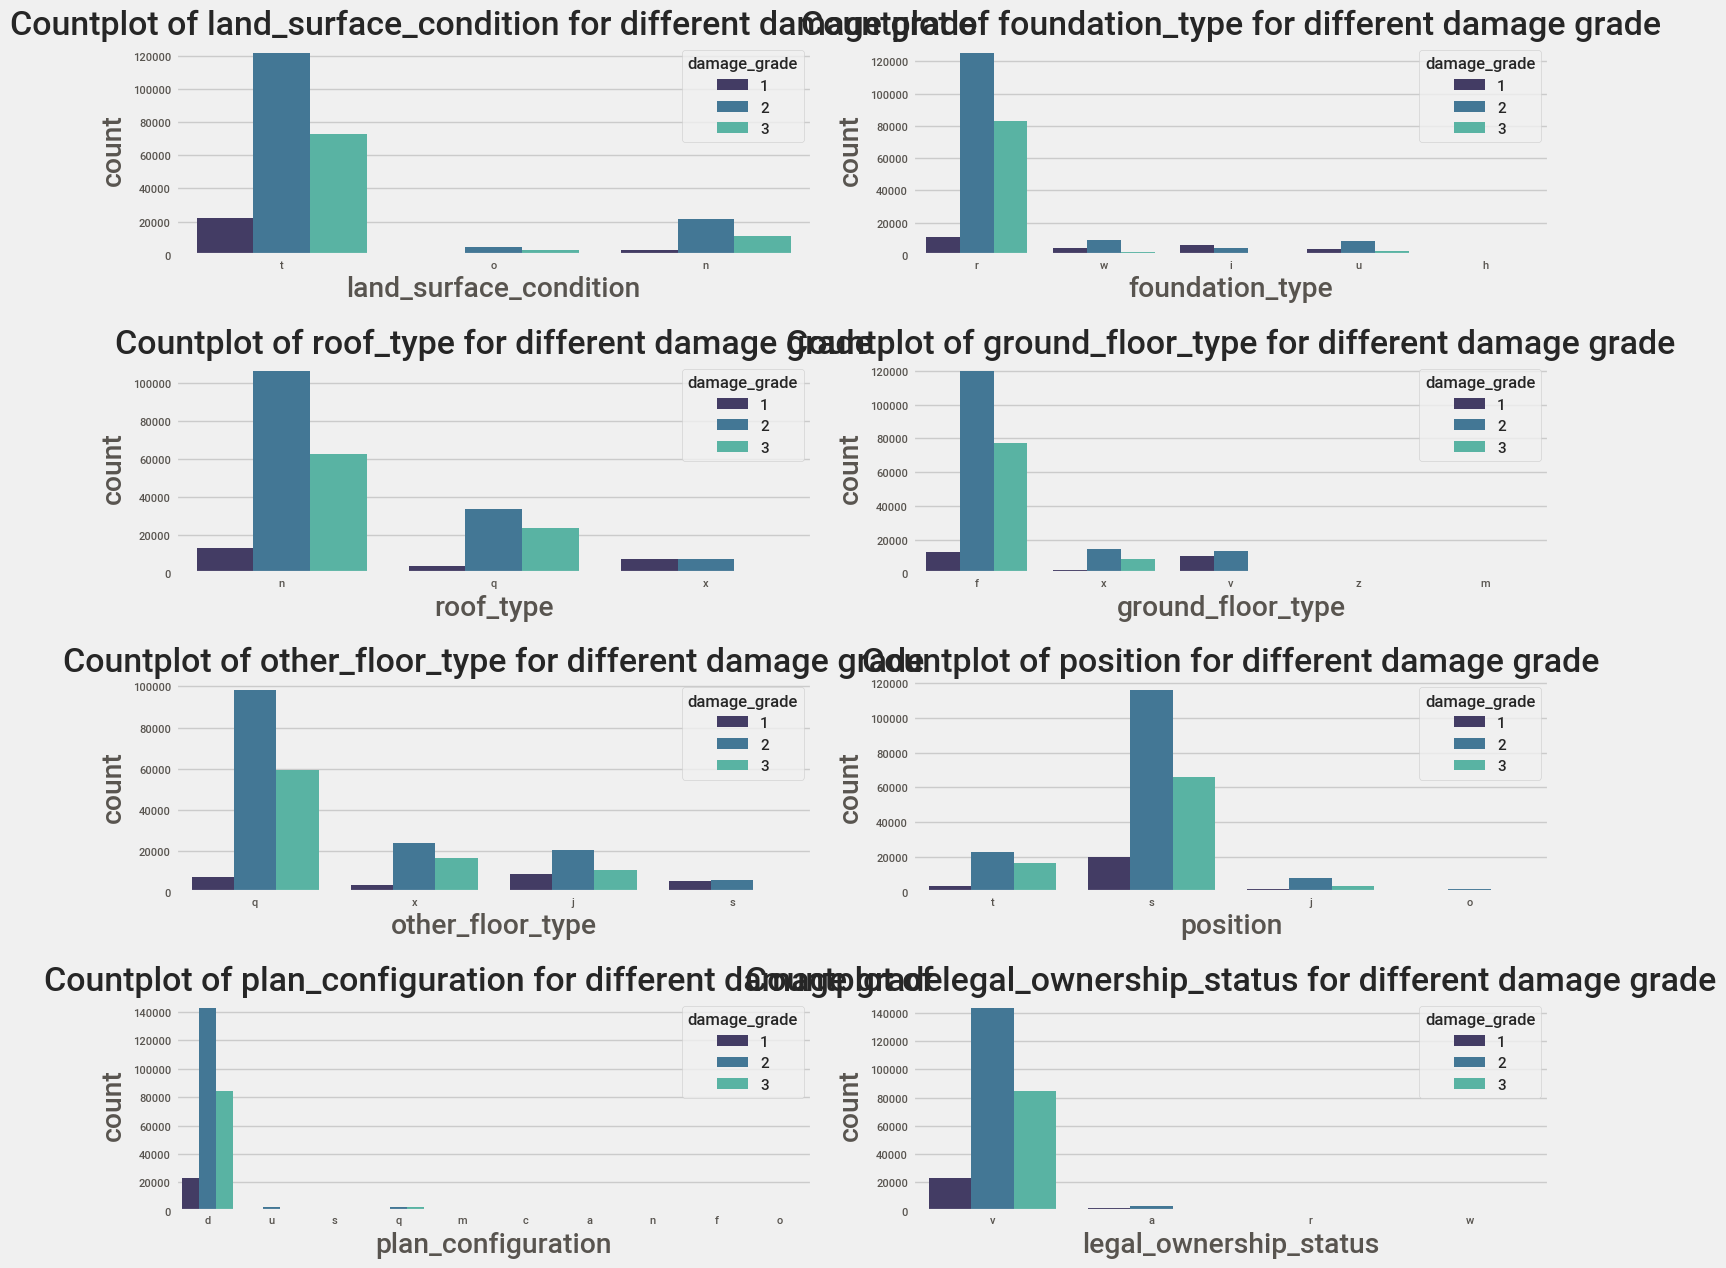

In [77]:
# Count plot with respect to damage grade
plt.figure(figsize=(15,13))
pltnum=1
for col in categorical_col:
    if pltnum<=8:
        ax=plt.subplot(4,2,pltnum)
        sns.countplot(x=data[col],hue=data['damage_grade'],palette="mako")
        plt.title(f'Countplot of {col} for different damage grade')
        pltnum +=1
plt.tight_layout()

#### Insights:
- The damage_grade is affected mostly to t(technical) of land_surface_condition, r(reinforced) of foundation_type , n(normal) of roof_type,f(fine aggregate concrete) of groud_floor_type,q of other_floor_type,s(secondary) position of position type,d of plan_configuration type,v(private owned)in legal_ownership_status.
- In all these damage level 2 has affected mostly by the buildings.

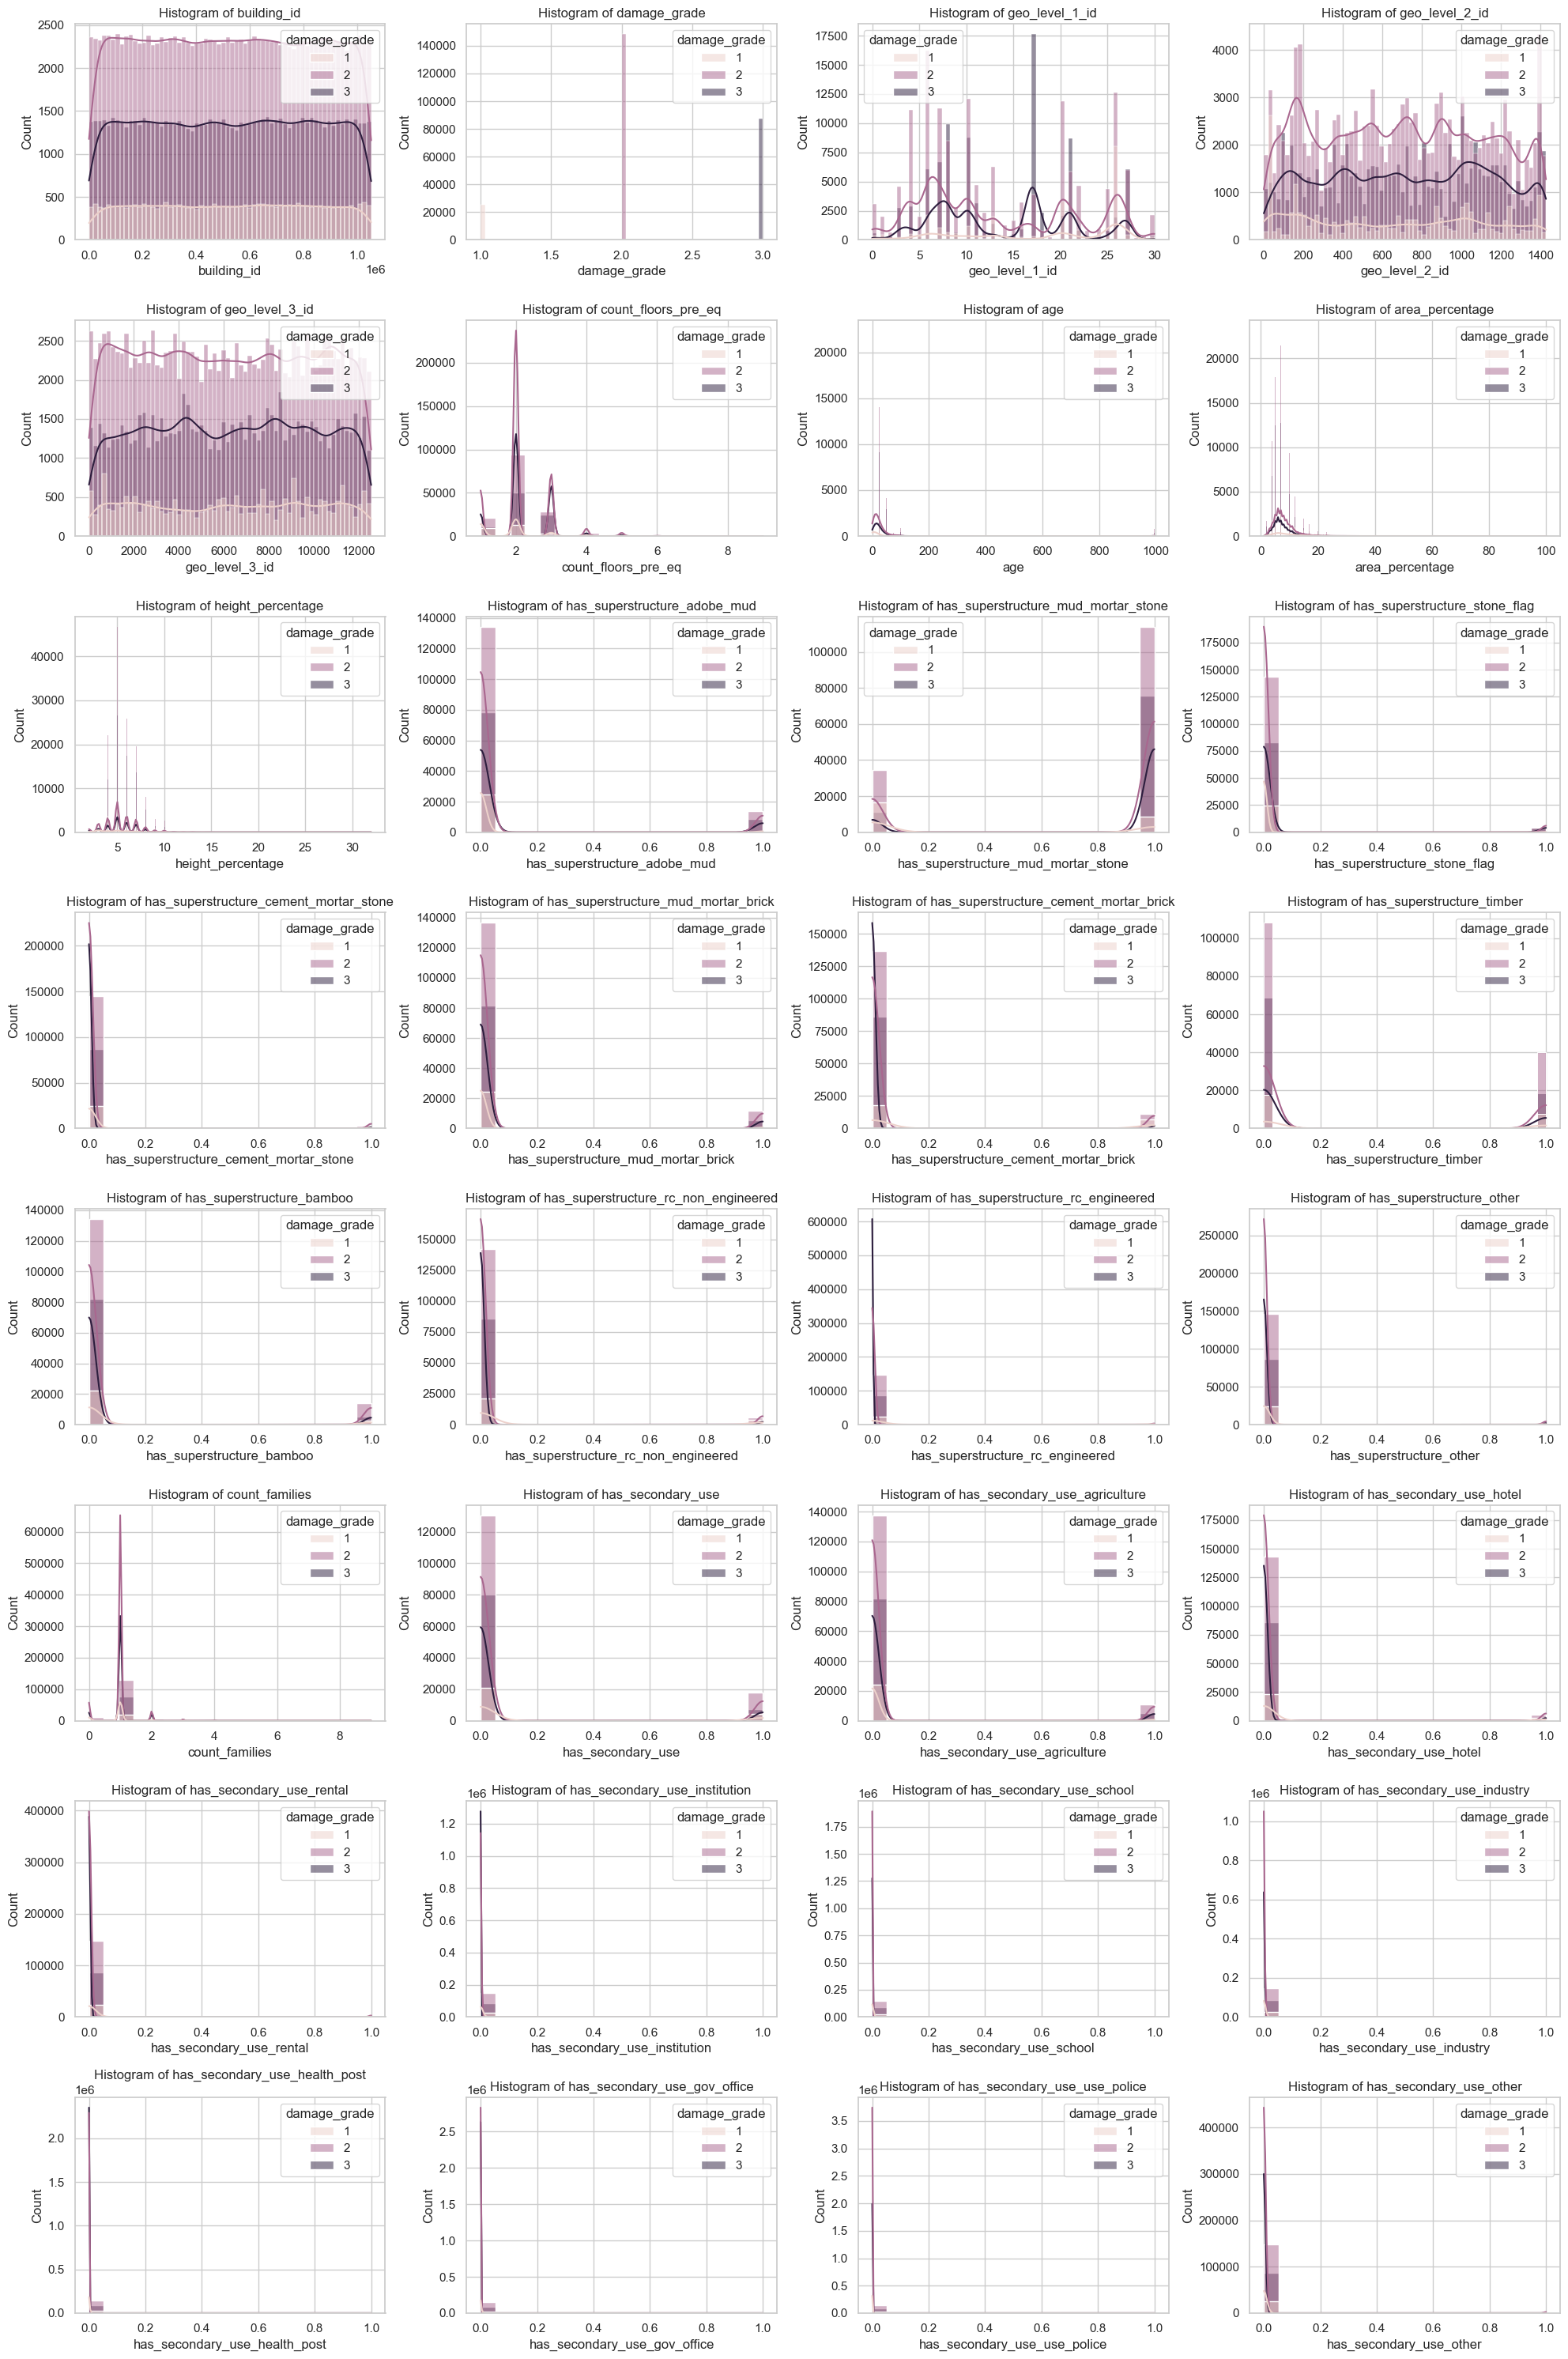

In [14]:
# Histogram plot with respect to damage grade of the buildings.
plt.figure(figsize=(20,30))
pltnum=1
for col in numerical_col:
    if pltnum<=32:
        ax=plt.subplot(8,4,pltnum)
        sns.histplot(x=data[col],hue=data['damage_grade'],kde=True)
        plt.title(f'Histogram of {col}')
        pltnum +=1
plt.tight_layout()
plt.show()

#### Insights:
* Buildings are more damaged by level 2 of damage_grade
* The damage_grade is more on buildings which is aged below 100 years,it has high positive skewness
* The buildings with 2 floor is damaged by level 2 damage,while the buildings with more than 2 floor is damaged by level 3 damage grade
* The buildings with area less than 20 units is affected mostly by earthqauke ,level 2 damage has occured to these buildings
* The biuldings with height 5 units is damaged more
* The buildings which was made without adobe/mud,stone,cement mortor-stone,non engineered concrete is affected mostly by level 2 damage grade
* The buildings which has used mud/motor stone has a damage grade more compared to the ones which has not used
* The buildings which has used engineerred concrete has less damage grade
* The buildings which has secondary use are damaged more

## Data Preprocessing

In [15]:
X = data.drop(columns=['damage_grade'])

In [16]:
num_col = X.select_dtypes(exclude="O").columns
cat_col = X.select_dtypes(include="O").columns

### Pipeline

In [17]:
# Outlier handling, scaling and frequency encoding

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('count_encode',CountEncoder()),
    ('scale', MinMaxScaler())

])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline',num_pipeline,num_col),
        ('cat_pipeline',cat_pipeline,cat_col)
    ]
)

In [18]:
X = preprocessor.fit_transform(X)

In [19]:
X.shape

(260601, 39)

In [20]:
df = pd.DataFrame(X,columns=['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other','land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'])

In [21]:
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0        0.762541       0.200000        0.341275        0.970637      
1        0.027377       0.266667        0.630694        0.223761      
2        0.090170       0.700000        0.254380        0.714013      
3        0.561175       0.733333        0.292922        0.850959      
4        0.191789       0.366667        0.091801        0.118405      
...             ...             ...             ...             ...   
260596   0.654015       0.833333        0.935529        0.128989      
260597   0.635827       0.566667        0.501051        0.163921      
260598   0.572220       0.566667        0.035739        0.649558      
260599   0.143794       0.866667        0.027330        0.147291      
260600   0.710009       0.700000        0.006307        0.724198      

        count_floors_pre_eq     age    area_percentage  height_percentage  \
0              0.125         0.030151     0.050505          0.100000        
1              0.125         0.010050     0.070707          0.166667        
2              0.125         0.010050     0.040404          0.100000        
3              0.125         0.010050     0.050505          0.100000        
4              0.250         0.030151     0.070707          0.233333        
...                     ...       ...              ...                ...   
260596         0.000         0.055276     0.050505          0.033333        
260597         0.125         0.000000     0.050505          0.100000        
260598         0.250         0.055276     0.050505          0.166667        
260599         0.125         0.010050     0.131313          0.133333        
260600         0.250         0.010050     0.060606          0.133333        

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                    1.0                              1.0                   
1                    0.0                              1.0                   
2                    0.0                              1.0                   
3                    0.0                              1.0                   
4                    1.0                              0.0                   
...                              ...                                  ...   
260596               0.0                              1.0                   
260597               0.0                              1.0                   
260598               0.0                              1.0                   
260599               0.0                              0.0                   
260600               0.0                              1.0                   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                    0.0                                 0.0                    
1                    0.0                                 0.0                    
2                    0.0                                 0.0                    
3                    0.0                                 0.0                    
4                    0.0                                 0.0                    
...                               ...                                     ...   
260596               0.0                                 0.0                    
260597               0.0                                 0.0                    
260598               0.0                                 0.0                    
260599               0.0                                 0.0                    
260600               0.0                                 0.0                    

        has_superstructure_mud_mortar_brick  \
0                       0.0                   
1                       0.0                   
2                       0.0                   
3                       0.0                   
4                       0.0                   
...                                     ...   
260

### Feature Selection

In [81]:
# dropping unwanted variables
data.drop('building_id', axis =1, inplace=True)

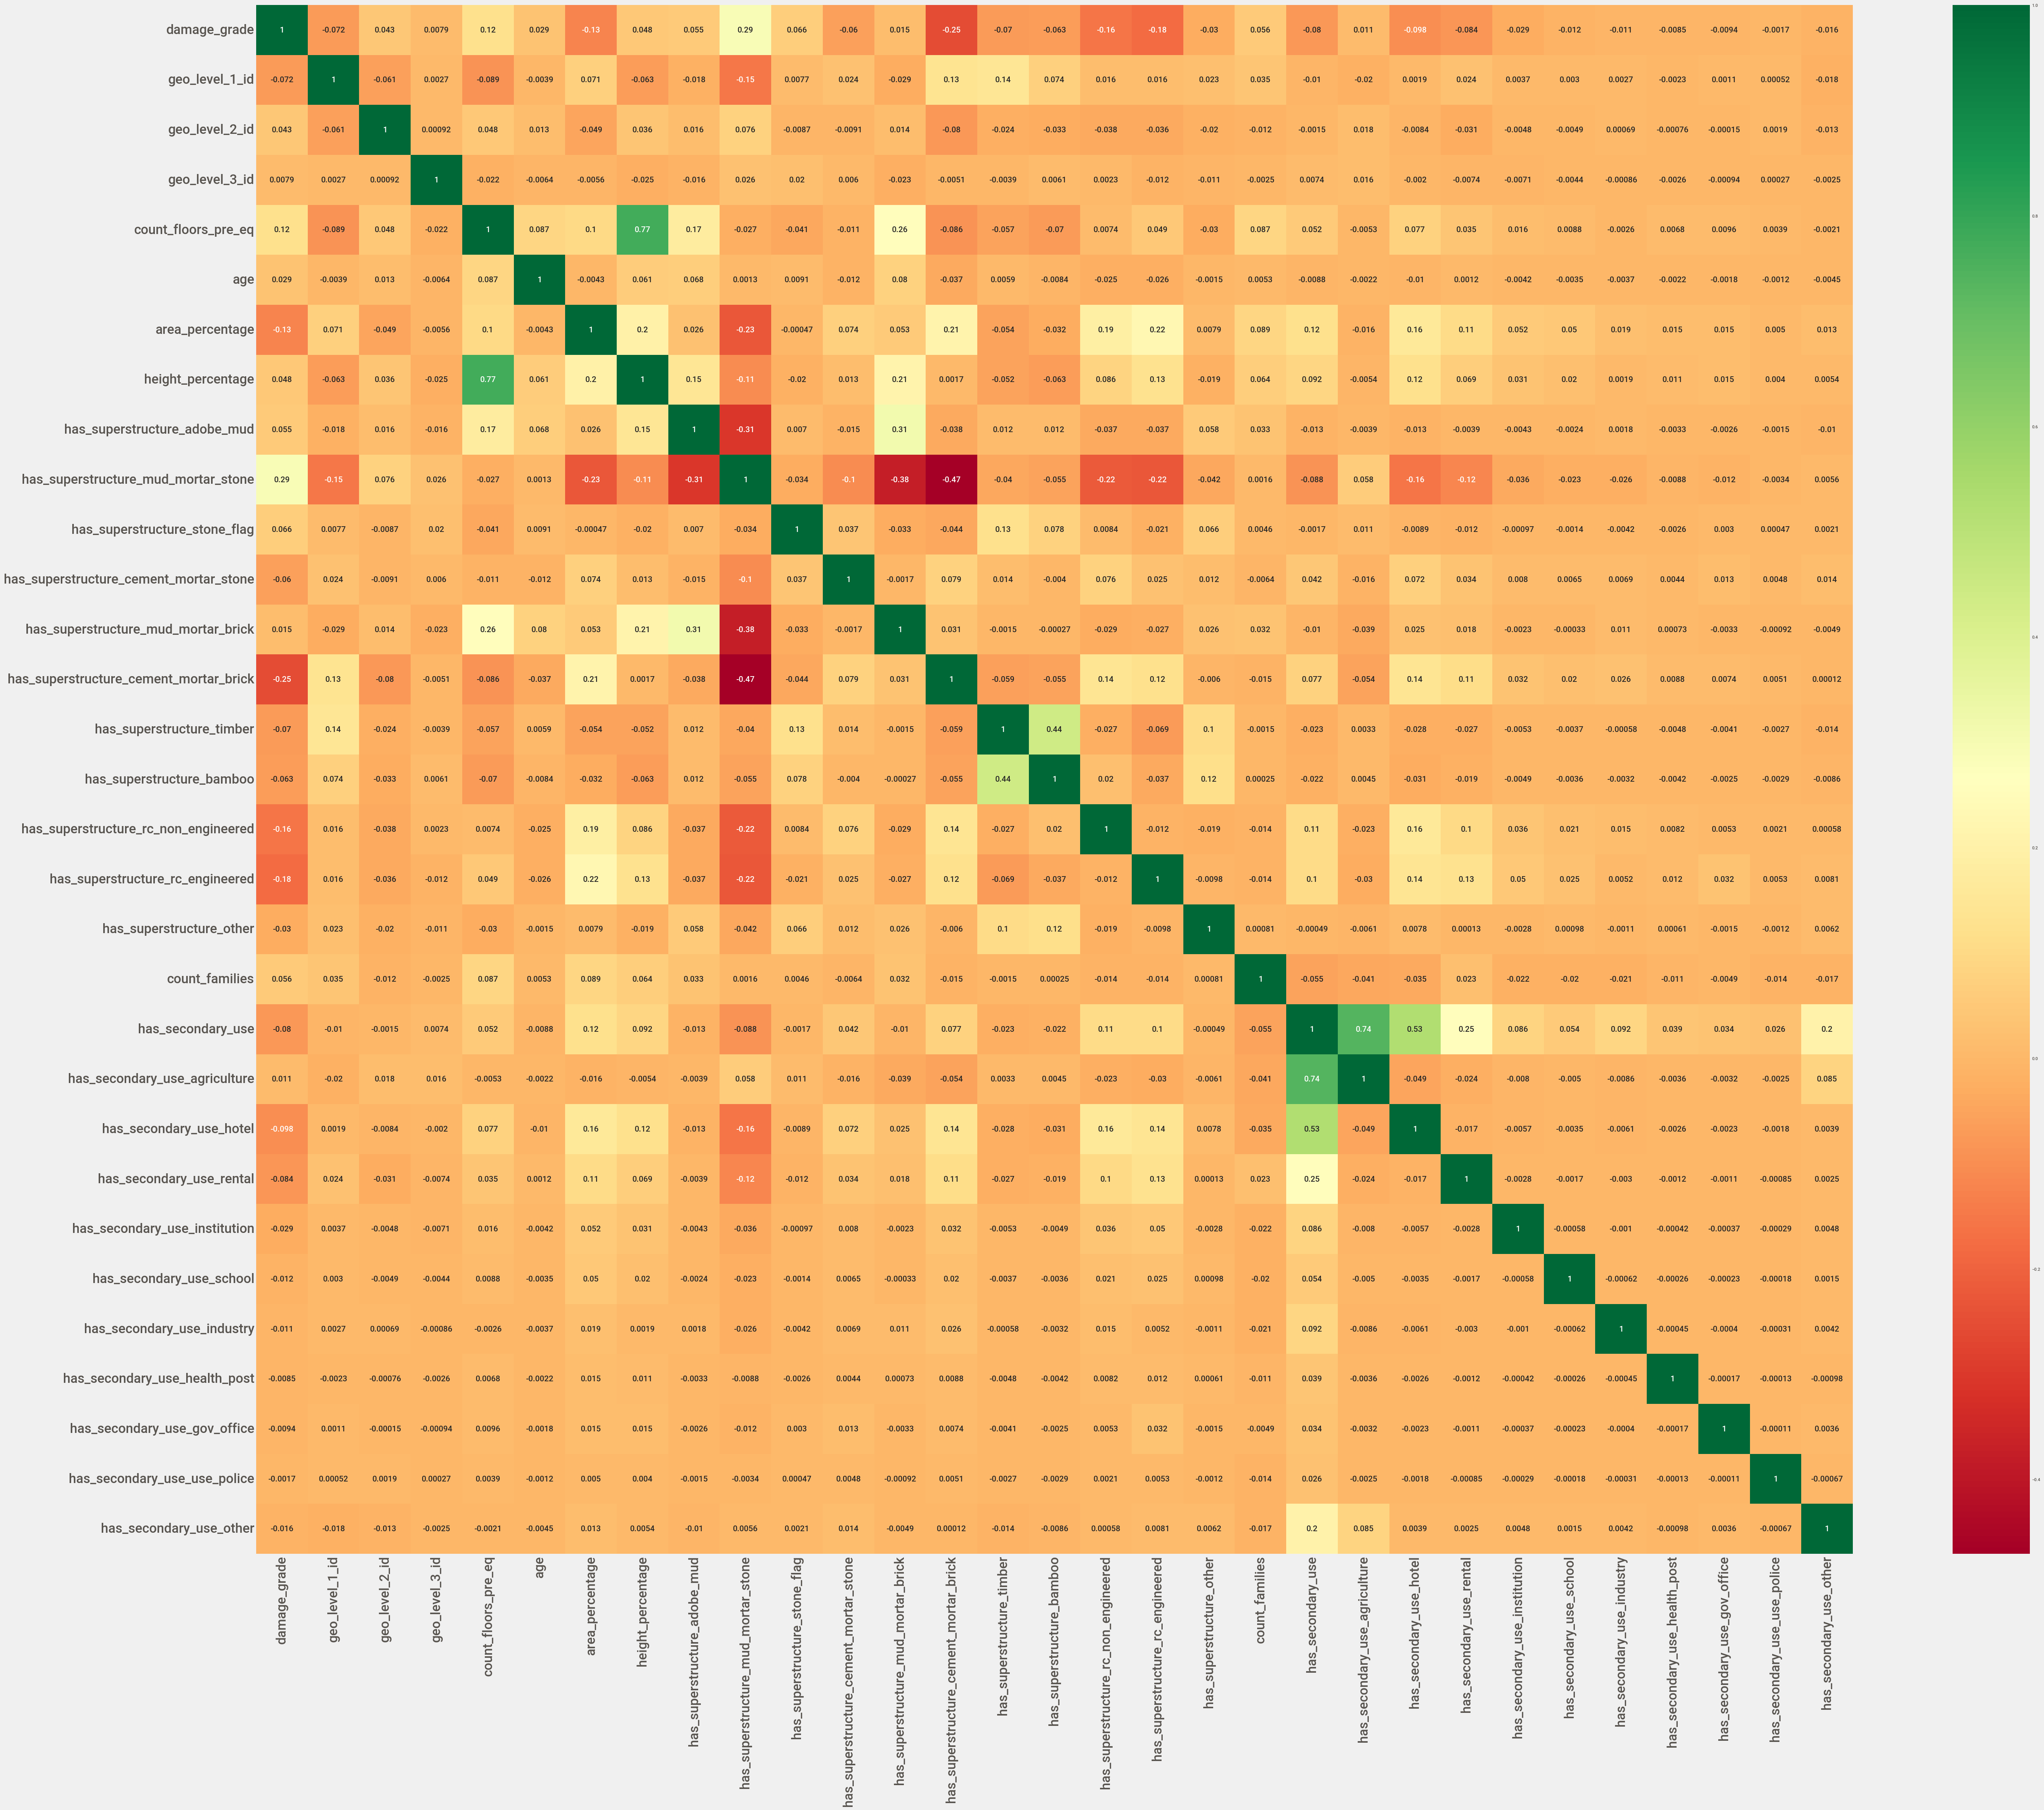

In [82]:
# plotting heat map to check for correlation between independent variables, correlation is done for only continuous data
plt.figure(figsize = (60,50))
heatmap = sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', annot_kws={'size':15})
heatmap.tick_params(axis='both', which='major', labelsize=25)

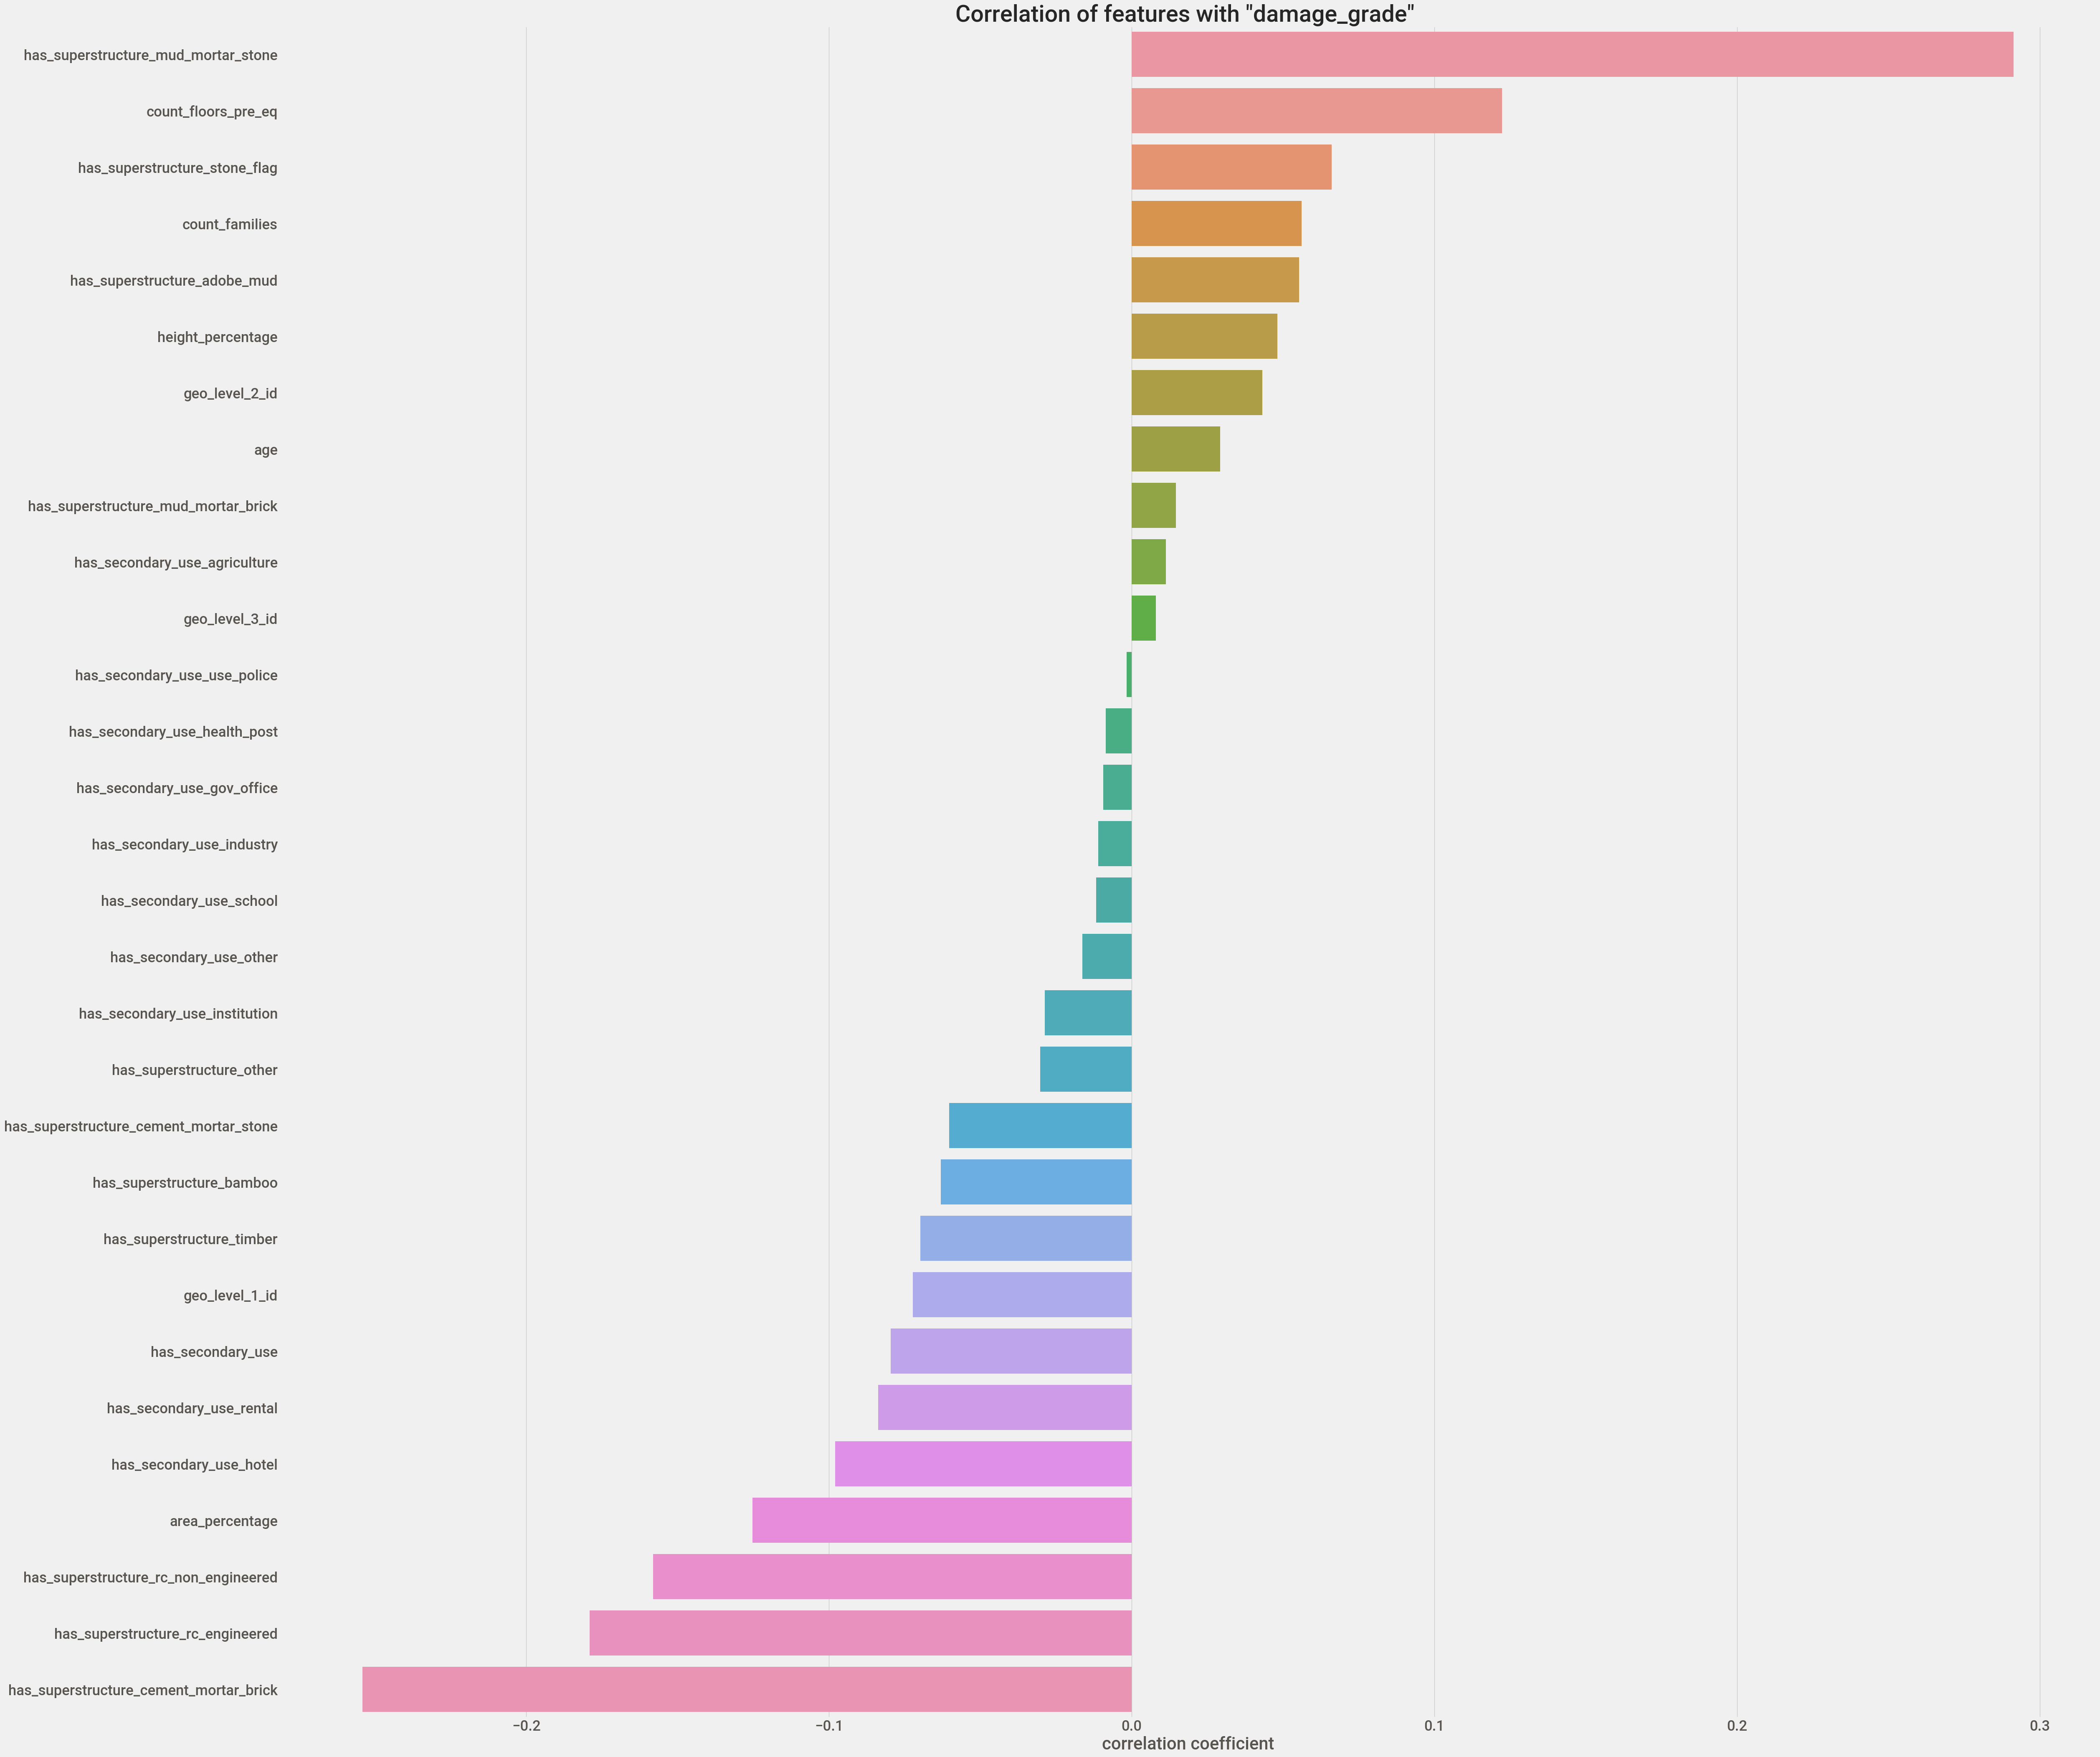

In [83]:
### checking how each independennt feature correlate with the target variable ('damage_grade')

plt.figure(figsize = (50,50))
limit=-1
data = data.corr()['damage_grade'].sort_values(ascending = False)
indices = data.index
labels = []
corr = []
for i in range(1,len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x = corr,y = labels)
plt.title('Correlation of features with "damage_grade" ', fontsize = 40, fontweight = 'bold')
plt.xlabel('correlation coefficient', fontsize = 30, fontweight = 'bold')
plt.rcParams['font.size'] = 30
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

#### Checking feature importance

In [22]:
model = CatBoostClassifier()

model.fit(df, data['damage_grade'])

feature_importance_catboost = model.get_feature_importance()

# Create a DataFrame with feature names and their importance scores
feature_importance_df_catboost = pd.DataFrame({
    'Feature':
    df.columns,
    'Importance':
    feature_importance_catboost
})

# Sort the DataFrame by importance in descending order
feature_importance_df_catboost = feature_importance_df_catboost.sort_values(
    by='Importance', ascending=False)

# Print or return the top features
print("Top Features - CatBoost:")
feature_importance_df_catboost = feature_importance_df_catboost.head(16)
feature_importance_df_catboost

Learning rate set to 0.105084
0:	learn: 1.0426749	total: 241ms	remaining: 4m
1:	learn: 0.9975364	total: 312ms	remaining: 2m 35s
2:	learn: 0.9605911	total: 386ms	remaining: 2m 8s
3:	learn: 0.9297411	total: 461ms	remaining: 1m 54s
4:	learn: 0.9043619	total: 533ms	remaining: 1m 46s
5:	learn: 0.8819064	total: 599ms	remaining: 1m 39s
6:	learn: 0.8632312	total: 664ms	remaining: 1m 34s
7:	learn: 0.8481845	total: 734ms	remaining: 1m 31s
8:	learn: 0.8345457	total: 808ms	remaining: 1m 28s
9:	learn: 0.8222961	total: 874ms	remaining: 1m 26s
10:	learn: 0.8111332	total: 939ms	remaining: 1m 24s
11:	learn: 0.8018982	total: 1.01s	remaining: 1m 23s
12:	learn: 0.7935622	total: 1.08s	remaining: 1m 21s
13:	learn: 0.7866916	total: 1.14s	remaining: 1m 20s
14:	learn: 0.7802538	total: 1.21s	remaining: 1m 19s
15:	learn: 0.7755001	total: 1.27s	remaining: 1m 18s
16:	learn: 0.7702933	total: 1.34s	remaining: 1m 17s
17:	learn: 0.7649444	total: 1.4s	remaining: 1m 16s
18:	learn: 0.7607804	total: 1.48s	remaining: 1m 16

161:	learn: 0.6680646	total: 11.2s	remaining: 58.1s
162:	learn: 0.6678456	total: 11.3s	remaining: 58.1s
163:	learn: 0.6677360	total: 11.4s	remaining: 58s
164:	learn: 0.6675049	total: 11.4s	remaining: 57.9s
165:	learn: 0.6673615	total: 11.5s	remaining: 57.8s
166:	learn: 0.6671722	total: 11.6s	remaining: 57.7s
167:	learn: 0.6669525	total: 11.6s	remaining: 57.6s
168:	learn: 0.6666618	total: 11.7s	remaining: 57.5s
169:	learn: 0.6663867	total: 11.8s	remaining: 57.5s
170:	learn: 0.6661485	total: 11.8s	remaining: 57.4s
171:	learn: 0.6659393	total: 11.9s	remaining: 57.3s
172:	learn: 0.6657002	total: 12s	remaining: 57.3s
173:	learn: 0.6655571	total: 12s	remaining: 57.2s
174:	learn: 0.6653358	total: 12.1s	remaining: 57.1s
175:	learn: 0.6651396	total: 12.2s	remaining: 57s
176:	learn: 0.6649405	total: 12.2s	remaining: 56.9s
177:	learn: 0.6646557	total: 12.3s	remaining: 56.8s
178:	learn: 0.6645299	total: 12.4s	remaining: 56.7s
179:	learn: 0.6644099	total: 12.4s	remaining: 56.6s
180:	learn: 0.664205

323:	learn: 0.6429087	total: 22.1s	remaining: 46s
324:	learn: 0.6428217	total: 22.1s	remaining: 45.9s
325:	learn: 0.6426417	total: 22.2s	remaining: 45.9s
326:	learn: 0.6425633	total: 22.2s	remaining: 45.8s
327:	learn: 0.6423585	total: 22.3s	remaining: 45.8s
328:	learn: 0.6422275	total: 22.4s	remaining: 45.7s
329:	learn: 0.6421905	total: 22.5s	remaining: 45.6s
330:	learn: 0.6420791	total: 22.5s	remaining: 45.5s
331:	learn: 0.6420314	total: 22.6s	remaining: 45.5s
332:	learn: 0.6419265	total: 22.7s	remaining: 45.4s
333:	learn: 0.6418497	total: 22.7s	remaining: 45.3s
334:	learn: 0.6417863	total: 22.8s	remaining: 45.2s
335:	learn: 0.6416870	total: 22.9s	remaining: 45.2s
336:	learn: 0.6416219	total: 22.9s	remaining: 45.1s
337:	learn: 0.6415554	total: 23s	remaining: 45s
338:	learn: 0.6414455	total: 23.1s	remaining: 44.9s
339:	learn: 0.6413522	total: 23.1s	remaining: 44.9s
340:	learn: 0.6412411	total: 23.2s	remaining: 44.8s
341:	learn: 0.6411613	total: 23.3s	remaining: 44.7s
342:	learn: 0.6409

482:	learn: 0.6276037	total: 32.8s	remaining: 35.1s
483:	learn: 0.6275029	total: 32.8s	remaining: 35s
484:	learn: 0.6274349	total: 32.9s	remaining: 34.9s
485:	learn: 0.6272832	total: 33s	remaining: 34.9s
486:	learn: 0.6272063	total: 33s	remaining: 34.8s
487:	learn: 0.6271280	total: 33.1s	remaining: 34.7s
488:	learn: 0.6270753	total: 33.2s	remaining: 34.7s
489:	learn: 0.6270205	total: 33.2s	remaining: 34.6s
490:	learn: 0.6269807	total: 33.3s	remaining: 34.5s
491:	learn: 0.6269257	total: 33.3s	remaining: 34.4s
492:	learn: 0.6268779	total: 33.4s	remaining: 34.4s
493:	learn: 0.6268178	total: 33.5s	remaining: 34.3s
494:	learn: 0.6266435	total: 33.6s	remaining: 34.2s
495:	learn: 0.6265918	total: 33.6s	remaining: 34.2s
496:	learn: 0.6265020	total: 33.7s	remaining: 34.1s
497:	learn: 0.6264589	total: 33.8s	remaining: 34s
498:	learn: 0.6263723	total: 33.8s	remaining: 34s
499:	learn: 0.6262787	total: 33.9s	remaining: 33.9s
500:	learn: 0.6261828	total: 34s	remaining: 33.8s
501:	learn: 0.6261623	to

644:	learn: 0.6164845	total: 43.6s	remaining: 24s
645:	learn: 0.6163973	total: 43.7s	remaining: 23.9s
646:	learn: 0.6163647	total: 43.8s	remaining: 23.9s
647:	learn: 0.6163178	total: 43.8s	remaining: 23.8s
648:	learn: 0.6162574	total: 43.9s	remaining: 23.7s
649:	learn: 0.6162020	total: 43.9s	remaining: 23.7s
650:	learn: 0.6161135	total: 44s	remaining: 23.6s
651:	learn: 0.6160678	total: 44.1s	remaining: 23.5s
652:	learn: 0.6159100	total: 44.1s	remaining: 23.5s
653:	learn: 0.6158563	total: 44.2s	remaining: 23.4s
654:	learn: 0.6157889	total: 44.3s	remaining: 23.3s
655:	learn: 0.6157525	total: 44.3s	remaining: 23.2s
656:	learn: 0.6157210	total: 44.4s	remaining: 23.2s
657:	learn: 0.6156596	total: 44.5s	remaining: 23.1s
658:	learn: 0.6155753	total: 44.5s	remaining: 23s
659:	learn: 0.6155182	total: 44.6s	remaining: 23s
660:	learn: 0.6154711	total: 44.6s	remaining: 22.9s
661:	learn: 0.6153988	total: 44.7s	remaining: 22.8s
662:	learn: 0.6153300	total: 44.8s	remaining: 22.8s
663:	learn: 0.615308

805:	learn: 0.6076844	total: 54.3s	remaining: 13.1s
806:	learn: 0.6076407	total: 54.3s	remaining: 13s
807:	learn: 0.6075918	total: 54.4s	remaining: 12.9s
808:	learn: 0.6075180	total: 54.5s	remaining: 12.9s
809:	learn: 0.6074956	total: 54.5s	remaining: 12.8s
810:	learn: 0.6073639	total: 54.6s	remaining: 12.7s
811:	learn: 0.6073413	total: 54.7s	remaining: 12.7s
812:	learn: 0.6072987	total: 54.7s	remaining: 12.6s
813:	learn: 0.6072708	total: 54.8s	remaining: 12.5s
814:	learn: 0.6072417	total: 54.9s	remaining: 12.5s
815:	learn: 0.6071855	total: 54.9s	remaining: 12.4s
816:	learn: 0.6071340	total: 55s	remaining: 12.3s
817:	learn: 0.6070199	total: 55.1s	remaining: 12.3s
818:	learn: 0.6069821	total: 55.1s	remaining: 12.2s
819:	learn: 0.6069360	total: 55.2s	remaining: 12.1s
820:	learn: 0.6069090	total: 55.3s	remaining: 12s
821:	learn: 0.6068699	total: 55.3s	remaining: 12s
822:	learn: 0.6068315	total: 55.4s	remaining: 11.9s
823:	learn: 0.6068080	total: 55.4s	remaining: 11.8s
824:	learn: 0.606756

967:	learn: 0.5995119	total: 1m 5s	remaining: 2.15s
968:	learn: 0.5994779	total: 1m 5s	remaining: 2.09s
969:	learn: 0.5994561	total: 1m 5s	remaining: 2.02s
970:	learn: 0.5993571	total: 1m 5s	remaining: 1.95s
971:	learn: 0.5992860	total: 1m 5s	remaining: 1.88s
972:	learn: 0.5992197	total: 1m 5s	remaining: 1.82s
973:	learn: 0.5991633	total: 1m 5s	remaining: 1.75s
974:	learn: 0.5991350	total: 1m 5s	remaining: 1.68s
975:	learn: 0.5991079	total: 1m 5s	remaining: 1.61s
976:	learn: 0.5990958	total: 1m 5s	remaining: 1.55s
977:	learn: 0.5990707	total: 1m 5s	remaining: 1.48s
978:	learn: 0.5990412	total: 1m 5s	remaining: 1.41s
979:	learn: 0.5989862	total: 1m 5s	remaining: 1.34s
980:	learn: 0.5989350	total: 1m 6s	remaining: 1.28s
981:	learn: 0.5989009	total: 1m 6s	remaining: 1.21s
982:	learn: 0.5988426	total: 1m 6s	remaining: 1.14s
983:	learn: 0.5988021	total: 1m 6s	remaining: 1.08s
984:	learn: 0.5987422	total: 1m 6s	remaining: 1.01s
985:	learn: 0.5987011	total: 1m 6s	remaining: 942ms
986:	learn: 

Feature                  Importance
1                           geo_level_1_id   43.339947
2                           geo_level_2_id   15.464393
3                           geo_level_3_id    4.885660
32                         foundation_type    3.999813
5                                      age    3.862410
9      has_superstructure_mud_mortar_stone    3.591616
35                        other_floor_type    2.562591
34                       ground_floor_type    2.524384
4                      count_floors_pre_eq    2.135636
7                        height_percentage    2.045902
6                          area_percentage    1.986807
33                               roof_type    1.891953
14               has_superstructure_timber    1.851640
13  has_superstructure_cement_mortar_brick    1.138036
8             has_superstructure_adobe_mud    1.034329
10           has_superstructure_stone_flag    1.024317

## Model Creation

In [23]:
selected_feature_names = feature_importance_df_catboost['Feature'].to_list()

In [24]:
X = df[selected_feature_names]
y = data['damage_grade']

#### Note:
- As the data is imbalanced, the training data is balanced using SMOTE

In [25]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({2: 148259, 3: 87218, 1: 25124})


In [26]:
sm = SMOTE(sampling_strategy='all',random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X,y)
print('Original dataset shape %s' % Counter(y_train_resampled))

Original dataset shape Counter({3: 148259, 2: 148259, 1: 148259})


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X_train_resampled,y_train_resampled,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((311343, 16), (133434, 16))

In [28]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted,average='weighted')
    precision = precision_score(true,predicted,average='weighted')
    recall = recall_score(true,predicted,average='weighted')
    return accuracy,f1,precision, recall

In [29]:
params={
        "Decision Tree": {
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "Random Forest":{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20, 30], 
            'min_samples_split': [2, 5, 10]
        },
        "Logistic Regression":{
            'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'penalty': ['l1', 'l2']
        },
        "KNN":{
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance'],
            'algorithm':['ball_tree','kd_tree','brute']
        },
        "GradientBoost":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
        },
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        },
        "CatBoostClassifier":{
            'iterations': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'depth': [4, 6, 8]
        },
        "AdaBoost":{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "LightGBMClassifier":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
           },
        "MLPClassifier" : {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01]
        }

}

In [30]:
model_results = {}
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train_mapped = np.vectorize(class_mapping.get)(y_train)
class_mapping = {label: idx for idx, label in enumerate(np.unique(y_test))}
y_test_mapped = np.vectorize(class_mapping.get)(y_test)
def run_model(model_name, model):
    '''
    Function to run the model and return the results
    '''
    model.fit(X_train, y_train_mapped)  # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # Map class labels for test set if needed
    y_test_mapped = np.vectorize(class_mapping.get)(y_test)
    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(
        y_train_mapped, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(
        y_test_mapped, y_test_pred)
    cross_val_mean = cross_val_score(model,
                                     X_train,
                                     y_train_mapped,
                                     cv=5,
                                     scoring='f1_weighted').mean()
    cross_val_std = cross_val_score(model,
                                    X_train,
                                    y_train_mapped,
                                    cv=5,
                                    scoring='f1_weighted').std()
    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1_score : {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))
    print('----------------------------------')
    print("Crossvalidate Score(mean): {:.4f}".format(cross_val_mean))
    print("Crossvalidate Std: {:.4f}".format(cross_val_std))

    model_results[model_name] = {
        'accuracy_train': model_train_accuracy,
        'accuracy_test': model_test_accuracy,
        'f1_train': model_train_f1,
        'f1_test': model_test_f1
    }
    print('=' * 35)

In [31]:
def hyper_tuning(model_name,model):
        '''
        Function to do hyperparameter tuning
        '''
        para = params[model_name]
        gs = RandomizedSearchCV(model,para,cv=5,scoring='f1_weighted',n_jobs=-1)
        gs.fit(X_train,y_train_mapped)
        model.set_params(**gs.best_params_)
        run_model(model_name,model)

In [32]:
hyper_tuning('Decision Tree',DecisionTreeClassifier())

Decision Tree
Model performance for Training set
- Accuracy : 0.9096
- F1_score : 0.9095
- Precision Score: 0.9099
- Recall Score: 0.9096
----------------------------------
Model performance for Test set
- Accuracy: 0.7624
- F1_score: 0.7619
- Precision Score: 0.7618
- Recall Score: 0.7624
----------------------------------
Crossvalidate Score(mean): 0.7535
Crossvalidate Std: 0.0011


In [33]:
hyper_tuning('Logistic Regression',LogisticRegression())

Logistic Regression
Model performance for Training set
- Accuracy : 0.5650
- F1_score : 0.5556
- Precision Score: 0.5679
- Recall Score: 0.5650
----------------------------------
Model performance for Test set
- Accuracy: 0.5635
- F1_score: 0.5540
- Precision Score: 0.5667
- Recall Score: 0.5635
----------------------------------
Crossvalidate Score(mean): 0.5557
Crossvalidate Std: 0.0014


In [34]:
run_model('KNN',KNeighborsClassifier())

KNN
Model performance for Training set
- Accuracy : 0.8383
- F1_score : 0.8347
- Precision Score: 0.8371
- Recall Score: 0.8383
----------------------------------
Model performance for Test set
- Accuracy: 0.7693
- F1_score: 0.7628
- Precision Score: 0.7640
- Recall Score: 0.7693
----------------------------------
Crossvalidate Score(mean): 0.7479
Crossvalidate Std: 0.0012


In [35]:
run_model('XGBClassifier',XGBClassifier())

XGBClassifier
Model performance for Training set
- Accuracy : 0.8158
- F1_score : 0.8163
- Precision Score: 0.8206
- Recall Score: 0.8158
----------------------------------
Model performance for Test set
- Accuracy: 0.8047
- F1_score: 0.8051
- Precision Score: 0.8091
- Recall Score: 0.8047
----------------------------------
Crossvalidate Score(mean): 0.8043
Crossvalidate Std: 0.0009


In [37]:
run_model('Random Forest',RandomForestClassifier())

Random Forest
Model performance for Training set
- Accuracy : 0.9851
- F1_score : 0.9851
- Precision Score: 0.9851
- Recall Score: 0.9851
----------------------------------
Model performance for Test set
- Accuracy: 0.8207
- F1_score: 0.8204
- Precision Score: 0.8206
- Recall Score: 0.8207
----------------------------------
Crossvalidate Score(mean): 0.8144
Crossvalidate Std: 0.0010


In [38]:
run_model('CatBoostClassifier',CatBoostClassifier())

Learning rate set to 0.106042
0:	learn: 1.0485014	total: 99.3ms	remaining: 1m 39s
1:	learn: 1.0100157	total: 193ms	remaining: 1m 36s
2:	learn: 0.9792981	total: 288ms	remaining: 1m 35s
3:	learn: 0.9513556	total: 386ms	remaining: 1m 36s
4:	learn: 0.9290011	total: 485ms	remaining: 1m 36s
5:	learn: 0.9098246	total: 580ms	remaining: 1m 36s
6:	learn: 0.8929156	total: 667ms	remaining: 1m 34s
7:	learn: 0.8767940	total: 759ms	remaining: 1m 34s
8:	learn: 0.8619670	total: 857ms	remaining: 1m 34s
9:	learn: 0.8487529	total: 940ms	remaining: 1m 33s
10:	learn: 0.8371041	total: 1.04s	remaining: 1m 33s
11:	learn: 0.8259681	total: 1.13s	remaining: 1m 33s
12:	learn: 0.8162417	total: 1.21s	remaining: 1m 31s
13:	learn: 0.8069468	total: 1.31s	remaining: 1m 32s
14:	learn: 0.7996854	total: 1.4s	remaining: 1m 32s
15:	learn: 0.7912180	total: 1.49s	remaining: 1m 31s
16:	learn: 0.7845103	total: 1.58s	remaining: 1m 31s
17:	learn: 0.7757614	total: 1.67s	remaining: 1m 31s
18:	learn: 0.7704273	total: 1.74s	remaining:

157:	learn: 0.5568022	total: 13.2s	remaining: 1m 10s
158:	learn: 0.5555702	total: 13.3s	remaining: 1m 10s
159:	learn: 0.5551172	total: 13.4s	remaining: 1m 10s
160:	learn: 0.5548483	total: 13.4s	remaining: 1m 10s
161:	learn: 0.5545812	total: 13.5s	remaining: 1m 9s
162:	learn: 0.5541783	total: 13.6s	remaining: 1m 9s
163:	learn: 0.5537997	total: 13.7s	remaining: 1m 9s
164:	learn: 0.5530579	total: 13.8s	remaining: 1m 9s
165:	learn: 0.5526570	total: 13.8s	remaining: 1m 9s
166:	learn: 0.5516539	total: 13.9s	remaining: 1m 9s
167:	learn: 0.5506847	total: 14s	remaining: 1m 9s
168:	learn: 0.5499225	total: 14.1s	remaining: 1m 9s
169:	learn: 0.5493844	total: 14.2s	remaining: 1m 9s
170:	learn: 0.5485481	total: 14.3s	remaining: 1m 9s
171:	learn: 0.5479424	total: 14.4s	remaining: 1m 9s
172:	learn: 0.5473607	total: 14.4s	remaining: 1m 9s
173:	learn: 0.5466391	total: 14.5s	remaining: 1m 8s
174:	learn: 0.5463523	total: 14.6s	remaining: 1m 8s
175:	learn: 0.5461094	total: 14.7s	remaining: 1m 8s
176:	learn

316:	learn: 0.5073883	total: 26.2s	remaining: 56.4s
317:	learn: 0.5072066	total: 26.2s	remaining: 56.3s
318:	learn: 0.5070767	total: 26.3s	remaining: 56.2s
319:	learn: 0.5069021	total: 26.4s	remaining: 56.1s
320:	learn: 0.5067637	total: 26.5s	remaining: 56s
321:	learn: 0.5065076	total: 26.6s	remaining: 55.9s
322:	learn: 0.5062736	total: 26.6s	remaining: 55.8s
323:	learn: 0.5061175	total: 26.7s	remaining: 55.7s
324:	learn: 0.5059757	total: 26.8s	remaining: 55.7s
325:	learn: 0.5058628	total: 26.9s	remaining: 55.6s
326:	learn: 0.5057024	total: 27s	remaining: 55.5s
327:	learn: 0.5054626	total: 27s	remaining: 55.4s
328:	learn: 0.5052759	total: 27.1s	remaining: 55.3s
329:	learn: 0.5051535	total: 27.2s	remaining: 55.3s
330:	learn: 0.5049276	total: 27.3s	remaining: 55.2s
331:	learn: 0.5047610	total: 27.4s	remaining: 55.1s
332:	learn: 0.5044695	total: 27.5s	remaining: 55s
333:	learn: 0.5043170	total: 27.5s	remaining: 54.9s
334:	learn: 0.5041619	total: 27.6s	remaining: 54.8s
335:	learn: 0.503992

477:	learn: 0.4852787	total: 38.9s	remaining: 42.4s
478:	learn: 0.4851702	total: 38.9s	remaining: 42.4s
479:	learn: 0.4849758	total: 39s	remaining: 42.3s
480:	learn: 0.4848426	total: 39.1s	remaining: 42.2s
481:	learn: 0.4846819	total: 39.2s	remaining: 42.1s
482:	learn: 0.4846170	total: 39.3s	remaining: 42s
483:	learn: 0.4845835	total: 39.3s	remaining: 41.9s
484:	learn: 0.4844917	total: 39.4s	remaining: 41.8s
485:	learn: 0.4843047	total: 39.5s	remaining: 41.8s
486:	learn: 0.4841802	total: 39.6s	remaining: 41.7s
487:	learn: 0.4840734	total: 39.6s	remaining: 41.6s
488:	learn: 0.4839545	total: 39.7s	remaining: 41.5s
489:	learn: 0.4839049	total: 39.8s	remaining: 41.4s
490:	learn: 0.4837712	total: 39.9s	remaining: 41.3s
491:	learn: 0.4836995	total: 39.9s	remaining: 41.2s
492:	learn: 0.4836273	total: 40s	remaining: 41.2s
493:	learn: 0.4834214	total: 40.1s	remaining: 41.1s
494:	learn: 0.4833588	total: 40.2s	remaining: 41s
495:	learn: 0.4831480	total: 40.3s	remaining: 40.9s
496:	learn: 0.483081

637:	learn: 0.4699378	total: 51.5s	remaining: 29.2s
638:	learn: 0.4698102	total: 51.6s	remaining: 29.1s
639:	learn: 0.4697503	total: 51.7s	remaining: 29.1s
640:	learn: 0.4696837	total: 51.7s	remaining: 29s
641:	learn: 0.4696101	total: 51.8s	remaining: 28.9s
642:	learn: 0.4695488	total: 51.9s	remaining: 28.8s
643:	learn: 0.4694154	total: 52s	remaining: 28.7s
644:	learn: 0.4693607	total: 52.1s	remaining: 28.7s
645:	learn: 0.4693124	total: 52.1s	remaining: 28.6s
646:	learn: 0.4692606	total: 52.2s	remaining: 28.5s
647:	learn: 0.4691720	total: 52.3s	remaining: 28.4s
648:	learn: 0.4690669	total: 52.4s	remaining: 28.3s
649:	learn: 0.4690188	total: 52.5s	remaining: 28.2s
650:	learn: 0.4689422	total: 52.5s	remaining: 28.2s
651:	learn: 0.4689058	total: 52.6s	remaining: 28.1s
652:	learn: 0.4688776	total: 52.7s	remaining: 28s
653:	learn: 0.4687928	total: 52.8s	remaining: 27.9s
654:	learn: 0.4686722	total: 52.8s	remaining: 27.8s
655:	learn: 0.4686130	total: 52.9s	remaining: 27.7s
656:	learn: 0.4685

799:	learn: 0.4581665	total: 1m 4s	remaining: 16.2s
800:	learn: 0.4580684	total: 1m 4s	remaining: 16.1s
801:	learn: 0.4579603	total: 1m 4s	remaining: 16s
802:	learn: 0.4578696	total: 1m 5s	remaining: 16s
803:	learn: 0.4578513	total: 1m 5s	remaining: 15.9s
804:	learn: 0.4577745	total: 1m 5s	remaining: 15.8s
805:	learn: 0.4577220	total: 1m 5s	remaining: 15.7s
806:	learn: 0.4576752	total: 1m 5s	remaining: 15.6s
807:	learn: 0.4575593	total: 1m 5s	remaining: 15.6s
808:	learn: 0.4574927	total: 1m 5s	remaining: 15.5s
809:	learn: 0.4573745	total: 1m 5s	remaining: 15.4s
810:	learn: 0.4573514	total: 1m 5s	remaining: 15.3s
811:	learn: 0.4573051	total: 1m 5s	remaining: 15.2s
812:	learn: 0.4572503	total: 1m 5s	remaining: 15.1s
813:	learn: 0.4571987	total: 1m 5s	remaining: 15.1s
814:	learn: 0.4571073	total: 1m 6s	remaining: 15s
815:	learn: 0.4570279	total: 1m 6s	remaining: 14.9s
816:	learn: 0.4569677	total: 1m 6s	remaining: 14.8s
817:	learn: 0.4569239	total: 1m 6s	remaining: 14.7s
818:	learn: 0.4568

958:	learn: 0.4492231	total: 1m 17s	remaining: 3.31s
959:	learn: 0.4491883	total: 1m 17s	remaining: 3.23s
960:	learn: 0.4491601	total: 1m 17s	remaining: 3.15s
961:	learn: 0.4491136	total: 1m 17s	remaining: 3.07s
962:	learn: 0.4489756	total: 1m 17s	remaining: 2.99s
963:	learn: 0.4488943	total: 1m 17s	remaining: 2.91s
964:	learn: 0.4488399	total: 1m 17s	remaining: 2.83s
965:	learn: 0.4488126	total: 1m 18s	remaining: 2.75s
966:	learn: 0.4487400	total: 1m 18s	remaining: 2.67s
967:	learn: 0.4487026	total: 1m 18s	remaining: 2.58s
968:	learn: 0.4486582	total: 1m 18s	remaining: 2.5s
969:	learn: 0.4486391	total: 1m 18s	remaining: 2.42s
970:	learn: 0.4486035	total: 1m 18s	remaining: 2.34s
971:	learn: 0.4485364	total: 1m 18s	remaining: 2.26s
972:	learn: 0.4484648	total: 1m 18s	remaining: 2.18s
973:	learn: 0.4483990	total: 1m 18s	remaining: 2.1s
974:	learn: 0.4483659	total: 1m 18s	remaining: 2.02s
975:	learn: 0.4483261	total: 1m 18s	remaining: 1.94s
976:	learn: 0.4483106	total: 1m 18s	remaining: 1

121:	learn: 0.5796966	total: 8.11s	remaining: 58.4s
122:	learn: 0.5793513	total: 8.17s	remaining: 58.3s
123:	learn: 0.5785977	total: 8.24s	remaining: 58.2s
124:	learn: 0.5779896	total: 8.31s	remaining: 58.2s
125:	learn: 0.5774420	total: 8.37s	remaining: 58.1s
126:	learn: 0.5772164	total: 8.43s	remaining: 57.9s
127:	learn: 0.5758545	total: 8.49s	remaining: 57.9s
128:	learn: 0.5753759	total: 8.56s	remaining: 57.8s
129:	learn: 0.5748226	total: 8.63s	remaining: 57.7s
130:	learn: 0.5736805	total: 8.69s	remaining: 57.7s
131:	learn: 0.5732849	total: 8.76s	remaining: 57.6s
132:	learn: 0.5729245	total: 8.81s	remaining: 57.5s
133:	learn: 0.5725583	total: 8.87s	remaining: 57.3s
134:	learn: 0.5721118	total: 8.93s	remaining: 57.2s
135:	learn: 0.5710207	total: 8.99s	remaining: 57.1s
136:	learn: 0.5696887	total: 9.06s	remaining: 57.1s
137:	learn: 0.5690031	total: 9.13s	remaining: 57s
138:	learn: 0.5677500	total: 9.19s	remaining: 56.9s
139:	learn: 0.5667963	total: 9.25s	remaining: 56.8s
140:	learn: 0.

281:	learn: 0.5160632	total: 18.4s	remaining: 46.8s
282:	learn: 0.5159195	total: 18.5s	remaining: 46.8s
283:	learn: 0.5154954	total: 18.5s	remaining: 46.7s
284:	learn: 0.5152848	total: 18.6s	remaining: 46.6s
285:	learn: 0.5150153	total: 18.6s	remaining: 46.6s
286:	learn: 0.5148177	total: 18.7s	remaining: 46.5s
287:	learn: 0.5145383	total: 18.8s	remaining: 46.4s
288:	learn: 0.5142868	total: 18.8s	remaining: 46.4s
289:	learn: 0.5141945	total: 18.9s	remaining: 46.3s
290:	learn: 0.5139502	total: 19s	remaining: 46.2s
291:	learn: 0.5136453	total: 19s	remaining: 46.1s
292:	learn: 0.5134751	total: 19.1s	remaining: 46.1s
293:	learn: 0.5132634	total: 19.2s	remaining: 46s
294:	learn: 0.5131187	total: 19.2s	remaining: 45.9s
295:	learn: 0.5129448	total: 19.3s	remaining: 45.8s
296:	learn: 0.5127834	total: 19.3s	remaining: 45.8s
297:	learn: 0.5125093	total: 19.4s	remaining: 45.7s
298:	learn: 0.5123471	total: 19.5s	remaining: 45.6s
299:	learn: 0.5121030	total: 19.5s	remaining: 45.6s
300:	learn: 0.5119

441:	learn: 0.4898356	total: 28.7s	remaining: 36.2s
442:	learn: 0.4896766	total: 28.7s	remaining: 36.1s
443:	learn: 0.4896206	total: 28.8s	remaining: 36s
444:	learn: 0.4895568	total: 28.8s	remaining: 36s
445:	learn: 0.4894293	total: 28.9s	remaining: 35.9s
446:	learn: 0.4892506	total: 29s	remaining: 35.9s
447:	learn: 0.4891058	total: 29s	remaining: 35.8s
448:	learn: 0.4889877	total: 29.1s	remaining: 35.7s
449:	learn: 0.4888082	total: 29.2s	remaining: 35.7s
450:	learn: 0.4887485	total: 29.3s	remaining: 35.6s
451:	learn: 0.4885963	total: 29.3s	remaining: 35.5s
452:	learn: 0.4884779	total: 29.4s	remaining: 35.5s
453:	learn: 0.4883892	total: 29.4s	remaining: 35.4s
454:	learn: 0.4882890	total: 29.5s	remaining: 35.3s
455:	learn: 0.4881991	total: 29.6s	remaining: 35.3s
456:	learn: 0.4881089	total: 29.6s	remaining: 35.2s
457:	learn: 0.4880363	total: 29.7s	remaining: 35.1s
458:	learn: 0.4878861	total: 29.8s	remaining: 35.1s
459:	learn: 0.4877954	total: 29.8s	remaining: 35s
460:	learn: 0.4876463	

602:	learn: 0.4734239	total: 39.2s	remaining: 25.8s
603:	learn: 0.4733050	total: 39.2s	remaining: 25.7s
604:	learn: 0.4732492	total: 39.3s	remaining: 25.6s
605:	learn: 0.4731646	total: 39.3s	remaining: 25.6s
606:	learn: 0.4731140	total: 39.4s	remaining: 25.5s
607:	learn: 0.4730045	total: 39.5s	remaining: 25.4s
608:	learn: 0.4728738	total: 39.5s	remaining: 25.4s
609:	learn: 0.4728024	total: 39.6s	remaining: 25.3s
610:	learn: 0.4726876	total: 39.7s	remaining: 25.3s
611:	learn: 0.4726475	total: 39.7s	remaining: 25.2s
612:	learn: 0.4726024	total: 39.8s	remaining: 25.1s
613:	learn: 0.4725377	total: 39.9s	remaining: 25.1s
614:	learn: 0.4724943	total: 39.9s	remaining: 25s
615:	learn: 0.4723932	total: 40s	remaining: 24.9s
616:	learn: 0.4722881	total: 40.1s	remaining: 24.9s
617:	learn: 0.4722183	total: 40.1s	remaining: 24.8s
618:	learn: 0.4720904	total: 40.2s	remaining: 24.7s
619:	learn: 0.4720212	total: 40.3s	remaining: 24.7s
620:	learn: 0.4719637	total: 40.3s	remaining: 24.6s
621:	learn: 0.47

763:	learn: 0.4608026	total: 49.5s	remaining: 15.3s
764:	learn: 0.4607501	total: 49.6s	remaining: 15.2s
765:	learn: 0.4606794	total: 49.7s	remaining: 15.2s
766:	learn: 0.4606031	total: 49.7s	remaining: 15.1s
767:	learn: 0.4605213	total: 49.8s	remaining: 15s
768:	learn: 0.4604643	total: 49.9s	remaining: 15s
769:	learn: 0.4604451	total: 49.9s	remaining: 14.9s
770:	learn: 0.4603413	total: 50s	remaining: 14.8s
771:	learn: 0.4602817	total: 50s	remaining: 14.8s
772:	learn: 0.4602274	total: 50.1s	remaining: 14.7s
773:	learn: 0.4601246	total: 50.2s	remaining: 14.6s
774:	learn: 0.4600621	total: 50.2s	remaining: 14.6s
775:	learn: 0.4600130	total: 50.3s	remaining: 14.5s
776:	learn: 0.4599845	total: 50.4s	remaining: 14.5s
777:	learn: 0.4599002	total: 50.4s	remaining: 14.4s
778:	learn: 0.4598405	total: 50.5s	remaining: 14.3s
779:	learn: 0.4597536	total: 50.5s	remaining: 14.3s
780:	learn: 0.4597145	total: 50.6s	remaining: 14.2s
781:	learn: 0.4596796	total: 50.7s	remaining: 14.1s
782:	learn: 0.459564

924:	learn: 0.4507610	total: 60s	remaining: 4.86s
925:	learn: 0.4507268	total: 1m	remaining: 4.8s
926:	learn: 0.4505986	total: 1m	remaining: 4.73s
927:	learn: 0.4505568	total: 1m	remaining: 4.67s
928:	learn: 0.4505077	total: 1m	remaining: 4.61s
929:	learn: 0.4504036	total: 1m	remaining: 4.54s
930:	learn: 0.4503694	total: 1m	remaining: 4.47s
931:	learn: 0.4503217	total: 1m	remaining: 4.41s
932:	learn: 0.4502343	total: 1m	remaining: 4.35s
933:	learn: 0.4501782	total: 1m	remaining: 4.28s
934:	learn: 0.4501337	total: 1m	remaining: 4.22s
935:	learn: 0.4500921	total: 1m	remaining: 4.15s
936:	learn: 0.4500446	total: 1m	remaining: 4.09s
937:	learn: 0.4499897	total: 1m	remaining: 4.02s
938:	learn: 0.4499519	total: 1m	remaining: 3.96s
939:	learn: 0.4499297	total: 1m	remaining: 3.89s
940:	learn: 0.4498898	total: 1m 1s	remaining: 3.83s
941:	learn: 0.4498411	total: 1m 1s	remaining: 3.76s
942:	learn: 0.4498195	total: 1m 1s	remaining: 3.7s
943:	learn: 0.4497567	total: 1m 1s	remaining: 3.63s
944:	lear

86:	learn: 0.6084302	total: 6.79s	remaining: 1m 11s
87:	learn: 0.6075627	total: 6.86s	remaining: 1m 11s
88:	learn: 0.6067290	total: 6.92s	remaining: 1m 10s
89:	learn: 0.6058778	total: 7s	remaining: 1m 10s
90:	learn: 0.6043452	total: 7.08s	remaining: 1m 10s
91:	learn: 0.6028244	total: 7.16s	remaining: 1m 10s
92:	learn: 0.6017190	total: 7.22s	remaining: 1m 10s
93:	learn: 0.6013156	total: 7.28s	remaining: 1m 10s
94:	learn: 0.6006933	total: 7.35s	remaining: 1m 9s
95:	learn: 0.5998887	total: 7.42s	remaining: 1m 9s
96:	learn: 0.5992493	total: 7.48s	remaining: 1m 9s
97:	learn: 0.5984912	total: 7.54s	remaining: 1m 9s
98:	learn: 0.5979680	total: 7.61s	remaining: 1m 9s
99:	learn: 0.5973263	total: 7.67s	remaining: 1m 9s
100:	learn: 0.5968502	total: 7.73s	remaining: 1m 8s
101:	learn: 0.5963088	total: 7.79s	remaining: 1m 8s
102:	learn: 0.5953183	total: 7.86s	remaining: 1m 8s
103:	learn: 0.5946063	total: 7.93s	remaining: 1m 8s
104:	learn: 0.5932936	total: 7.99s	remaining: 1m 8s
105:	learn: 0.5923398

248:	learn: 0.5237154	total: 17.3s	remaining: 52.1s
249:	learn: 0.5235431	total: 17.3s	remaining: 52s
250:	learn: 0.5232423	total: 17.4s	remaining: 52s
251:	learn: 0.5229924	total: 17.5s	remaining: 51.9s
252:	learn: 0.5228352	total: 17.5s	remaining: 51.8s
253:	learn: 0.5225534	total: 17.6s	remaining: 51.7s
254:	learn: 0.5221947	total: 17.7s	remaining: 51.6s
255:	learn: 0.5220083	total: 17.7s	remaining: 51.6s
256:	learn: 0.5218748	total: 17.8s	remaining: 51.5s
257:	learn: 0.5214988	total: 17.9s	remaining: 51.4s
258:	learn: 0.5210064	total: 18s	remaining: 51.4s
259:	learn: 0.5206391	total: 18s	remaining: 51.3s
260:	learn: 0.5205264	total: 18.1s	remaining: 51.2s
261:	learn: 0.5203037	total: 18.1s	remaining: 51.1s
262:	learn: 0.5201039	total: 18.2s	remaining: 51s
263:	learn: 0.5198584	total: 18.3s	remaining: 50.9s
264:	learn: 0.5196502	total: 18.3s	remaining: 50.8s
265:	learn: 0.5194245	total: 18.4s	remaining: 50.7s
266:	learn: 0.5190598	total: 18.4s	remaining: 50.6s
267:	learn: 0.5188671	

410:	learn: 0.4933566	total: 27.8s	remaining: 39.9s
411:	learn: 0.4932649	total: 27.9s	remaining: 39.8s
412:	learn: 0.4931471	total: 27.9s	remaining: 39.7s
413:	learn: 0.4929705	total: 28s	remaining: 39.6s
414:	learn: 0.4928546	total: 28.1s	remaining: 39.6s
415:	learn: 0.4927485	total: 28.1s	remaining: 39.5s
416:	learn: 0.4926559	total: 28.2s	remaining: 39.4s
417:	learn: 0.4925090	total: 28.3s	remaining: 39.3s
418:	learn: 0.4923272	total: 28.3s	remaining: 39.3s
419:	learn: 0.4921822	total: 28.4s	remaining: 39.2s
420:	learn: 0.4921415	total: 28.4s	remaining: 39.1s
421:	learn: 0.4920328	total: 28.5s	remaining: 39.1s
422:	learn: 0.4919246	total: 28.6s	remaining: 39s
423:	learn: 0.4918306	total: 28.6s	remaining: 38.9s
424:	learn: 0.4917640	total: 28.7s	remaining: 38.8s
425:	learn: 0.4916866	total: 28.8s	remaining: 38.8s
426:	learn: 0.4915866	total: 28.8s	remaining: 38.7s
427:	learn: 0.4915573	total: 28.9s	remaining: 38.6s
428:	learn: 0.4914611	total: 28.9s	remaining: 38.5s
429:	learn: 0.49

570:	learn: 0.4764565	total: 38.1s	remaining: 28.6s
571:	learn: 0.4763561	total: 38.2s	remaining: 28.6s
572:	learn: 0.4762693	total: 38.2s	remaining: 28.5s
573:	learn: 0.4761715	total: 38.3s	remaining: 28.4s
574:	learn: 0.4760781	total: 38.3s	remaining: 28.3s
575:	learn: 0.4760179	total: 38.4s	remaining: 28.3s
576:	learn: 0.4758941	total: 38.5s	remaining: 28.2s
577:	learn: 0.4758338	total: 38.5s	remaining: 28.1s
578:	learn: 0.4757422	total: 38.6s	remaining: 28.1s
579:	learn: 0.4756862	total: 38.7s	remaining: 28s
580:	learn: 0.4756491	total: 38.7s	remaining: 27.9s
581:	learn: 0.4755723	total: 38.8s	remaining: 27.9s
582:	learn: 0.4755176	total: 38.9s	remaining: 27.8s
583:	learn: 0.4752725	total: 38.9s	remaining: 27.7s
584:	learn: 0.4752023	total: 39s	remaining: 27.7s
585:	learn: 0.4751740	total: 39s	remaining: 27.6s
586:	learn: 0.4751025	total: 39.1s	remaining: 27.5s
587:	learn: 0.4750685	total: 39.2s	remaining: 27.4s
588:	learn: 0.4749239	total: 39.2s	remaining: 27.4s
589:	learn: 0.4748

732:	learn: 0.4627220	total: 48.6s	remaining: 17.7s
733:	learn: 0.4626874	total: 48.7s	remaining: 17.6s
734:	learn: 0.4626062	total: 48.8s	remaining: 17.6s
735:	learn: 0.4625699	total: 48.8s	remaining: 17.5s
736:	learn: 0.4624381	total: 48.9s	remaining: 17.4s
737:	learn: 0.4623921	total: 49s	remaining: 17.4s
738:	learn: 0.4623068	total: 49s	remaining: 17.3s
739:	learn: 0.4622558	total: 49.1s	remaining: 17.2s
740:	learn: 0.4621475	total: 49.2s	remaining: 17.2s
741:	learn: 0.4620819	total: 49.2s	remaining: 17.1s
742:	learn: 0.4619791	total: 49.3s	remaining: 17s
743:	learn: 0.4618720	total: 49.4s	remaining: 17s
744:	learn: 0.4618398	total: 49.4s	remaining: 16.9s
745:	learn: 0.4618133	total: 49.5s	remaining: 16.8s
746:	learn: 0.4617507	total: 49.5s	remaining: 16.8s
747:	learn: 0.4616729	total: 49.6s	remaining: 16.7s
748:	learn: 0.4616355	total: 49.7s	remaining: 16.6s
749:	learn: 0.4615966	total: 49.7s	remaining: 16.6s
750:	learn: 0.4615574	total: 49.8s	remaining: 16.5s
751:	learn: 0.461515

891:	learn: 0.4530007	total: 58.9s	remaining: 7.13s
892:	learn: 0.4529662	total: 59s	remaining: 7.07s
893:	learn: 0.4529271	total: 59s	remaining: 7s
894:	learn: 0.4528960	total: 59.1s	remaining: 6.93s
895:	learn: 0.4528616	total: 59.2s	remaining: 6.87s
896:	learn: 0.4527703	total: 59.2s	remaining: 6.8s
897:	learn: 0.4526834	total: 59.3s	remaining: 6.74s
898:	learn: 0.4526402	total: 59.4s	remaining: 6.67s
899:	learn: 0.4526081	total: 59.4s	remaining: 6.6s
900:	learn: 0.4524556	total: 59.5s	remaining: 6.54s
901:	learn: 0.4523919	total: 59.6s	remaining: 6.47s
902:	learn: 0.4522886	total: 59.6s	remaining: 6.41s
903:	learn: 0.4522343	total: 59.7s	remaining: 6.34s
904:	learn: 0.4521775	total: 59.8s	remaining: 6.27s
905:	learn: 0.4521069	total: 59.8s	remaining: 6.21s
906:	learn: 0.4520644	total: 59.9s	remaining: 6.14s
907:	learn: 0.4519853	total: 60s	remaining: 6.07s
908:	learn: 0.4519390	total: 1m	remaining: 6.01s
909:	learn: 0.4518845	total: 1m	remaining: 5.94s
910:	learn: 0.4518173	total: 

51:	learn: 0.6593952	total: 3.55s	remaining: 1m 4s
52:	learn: 0.6582503	total: 3.61s	remaining: 1m 4s
53:	learn: 0.6559241	total: 3.67s	remaining: 1m 4s
54:	learn: 0.6539071	total: 3.74s	remaining: 1m 4s
55:	learn: 0.6514055	total: 3.81s	remaining: 1m 4s
56:	learn: 0.6491535	total: 3.87s	remaining: 1m 4s
57:	learn: 0.6477490	total: 3.94s	remaining: 1m 4s
58:	learn: 0.6467220	total: 4s	remaining: 1m 3s
59:	learn: 0.6453565	total: 4.06s	remaining: 1m 3s
60:	learn: 0.6431799	total: 4.13s	remaining: 1m 3s
61:	learn: 0.6416450	total: 4.19s	remaining: 1m 3s
62:	learn: 0.6405831	total: 4.25s	remaining: 1m 3s
63:	learn: 0.6392016	total: 4.32s	remaining: 1m 3s
64:	learn: 0.6383428	total: 4.38s	remaining: 1m 2s
65:	learn: 0.6372381	total: 4.44s	remaining: 1m 2s
66:	learn: 0.6363104	total: 4.5s	remaining: 1m 2s
67:	learn: 0.6342109	total: 4.58s	remaining: 1m 2s
68:	learn: 0.6318489	total: 4.65s	remaining: 1m 2s
69:	learn: 0.6306450	total: 4.72s	remaining: 1m 2s
70:	learn: 0.6292902	total: 4.78s	r

211:	learn: 0.5333302	total: 14s	remaining: 52.2s
212:	learn: 0.5331311	total: 14.1s	remaining: 52.1s
213:	learn: 0.5330278	total: 14.2s	remaining: 52s
214:	learn: 0.5328069	total: 14.2s	remaining: 52s
215:	learn: 0.5324994	total: 14.3s	remaining: 51.9s
216:	learn: 0.5323455	total: 14.4s	remaining: 51.8s
217:	learn: 0.5321103	total: 14.4s	remaining: 51.7s
218:	learn: 0.5318815	total: 14.5s	remaining: 51.6s
219:	learn: 0.5315520	total: 14.5s	remaining: 51.6s
220:	learn: 0.5309152	total: 14.6s	remaining: 51.5s
221:	learn: 0.5306985	total: 14.7s	remaining: 51.4s
222:	learn: 0.5302333	total: 14.7s	remaining: 51.4s
223:	learn: 0.5299535	total: 14.8s	remaining: 51.3s
224:	learn: 0.5297016	total: 14.9s	remaining: 51.2s
225:	learn: 0.5294767	total: 14.9s	remaining: 51.1s
226:	learn: 0.5292186	total: 15s	remaining: 51.1s
227:	learn: 0.5290048	total: 15.1s	remaining: 51s
228:	learn: 0.5287905	total: 15.1s	remaining: 51s
229:	learn: 0.5282229	total: 15.2s	remaining: 50.9s
230:	learn: 0.5278902	to

370:	learn: 0.4990254	total: 24.4s	remaining: 41.4s
371:	learn: 0.4989376	total: 24.4s	remaining: 41.3s
372:	learn: 0.4987885	total: 24.5s	remaining: 41.2s
373:	learn: 0.4985058	total: 24.6s	remaining: 41.1s
374:	learn: 0.4983793	total: 24.6s	remaining: 41.1s
375:	learn: 0.4981612	total: 24.7s	remaining: 41s
376:	learn: 0.4980021	total: 24.8s	remaining: 40.9s
377:	learn: 0.4978704	total: 24.8s	remaining: 40.8s
378:	learn: 0.4977836	total: 24.9s	remaining: 40.8s
379:	learn: 0.4976264	total: 25s	remaining: 40.7s
380:	learn: 0.4973944	total: 25s	remaining: 40.6s
381:	learn: 0.4972911	total: 25.1s	remaining: 40.6s
382:	learn: 0.4971234	total: 25.1s	remaining: 40.5s
383:	learn: 0.4970064	total: 25.2s	remaining: 40.4s
384:	learn: 0.4969200	total: 25.3s	remaining: 40.4s
385:	learn: 0.4968308	total: 25.3s	remaining: 40.3s
386:	learn: 0.4967133	total: 25.4s	remaining: 40.2s
387:	learn: 0.4965687	total: 25.5s	remaining: 40.2s
388:	learn: 0.4963188	total: 25.6s	remaining: 40.1s
389:	learn: 0.4962

529:	learn: 0.4791672	total: 34.6s	remaining: 30.7s
530:	learn: 0.4791135	total: 34.6s	remaining: 30.6s
531:	learn: 0.4790646	total: 34.7s	remaining: 30.5s
532:	learn: 0.4789562	total: 34.7s	remaining: 30.4s
533:	learn: 0.4789032	total: 34.8s	remaining: 30.4s
534:	learn: 0.4788457	total: 34.9s	remaining: 30.3s
535:	learn: 0.4787337	total: 34.9s	remaining: 30.2s
536:	learn: 0.4785961	total: 35s	remaining: 30.2s
537:	learn: 0.4784253	total: 35.1s	remaining: 30.1s
538:	learn: 0.4783075	total: 35.1s	remaining: 30.1s
539:	learn: 0.4781673	total: 35.2s	remaining: 30s
540:	learn: 0.4780783	total: 35.3s	remaining: 29.9s
541:	learn: 0.4780228	total: 35.3s	remaining: 29.9s
542:	learn: 0.4779134	total: 35.4s	remaining: 29.8s
543:	learn: 0.4778328	total: 35.5s	remaining: 29.7s
544:	learn: 0.4777217	total: 35.5s	remaining: 29.7s
545:	learn: 0.4776317	total: 35.6s	remaining: 29.6s
546:	learn: 0.4774830	total: 35.7s	remaining: 29.5s
547:	learn: 0.4774204	total: 35.7s	remaining: 29.5s
548:	learn: 0.47

691:	learn: 0.4646246	total: 45.1s	remaining: 20.1s
692:	learn: 0.4645743	total: 45.1s	remaining: 20s
693:	learn: 0.4644844	total: 45.2s	remaining: 19.9s
694:	learn: 0.4643854	total: 45.3s	remaining: 19.9s
695:	learn: 0.4643520	total: 45.3s	remaining: 19.8s
696:	learn: 0.4643047	total: 45.4s	remaining: 19.7s
697:	learn: 0.4642251	total: 45.5s	remaining: 19.7s
698:	learn: 0.4641465	total: 45.5s	remaining: 19.6s
699:	learn: 0.4640976	total: 45.6s	remaining: 19.5s
700:	learn: 0.4639600	total: 45.7s	remaining: 19.5s
701:	learn: 0.4638649	total: 45.7s	remaining: 19.4s
702:	learn: 0.4637448	total: 45.8s	remaining: 19.3s
703:	learn: 0.4636957	total: 45.9s	remaining: 19.3s
704:	learn: 0.4636342	total: 45.9s	remaining: 19.2s
705:	learn: 0.4635609	total: 46s	remaining: 19.1s
706:	learn: 0.4635032	total: 46s	remaining: 19.1s
707:	learn: 0.4634361	total: 46.1s	remaining: 19s
708:	learn: 0.4633169	total: 46.2s	remaining: 18.9s
709:	learn: 0.4632622	total: 46.2s	remaining: 18.9s
710:	learn: 0.463202

851:	learn: 0.4543969	total: 55.3s	remaining: 9.61s
852:	learn: 0.4543494	total: 55.4s	remaining: 9.54s
853:	learn: 0.4542966	total: 55.5s	remaining: 9.48s
854:	learn: 0.4542668	total: 55.5s	remaining: 9.41s
855:	learn: 0.4542247	total: 55.6s	remaining: 9.35s
856:	learn: 0.4541922	total: 55.6s	remaining: 9.28s
857:	learn: 0.4540799	total: 55.7s	remaining: 9.22s
858:	learn: 0.4540171	total: 55.8s	remaining: 9.15s
859:	learn: 0.4539637	total: 55.8s	remaining: 9.09s
860:	learn: 0.4539439	total: 55.9s	remaining: 9.02s
861:	learn: 0.4538413	total: 56s	remaining: 8.96s
862:	learn: 0.4537640	total: 56s	remaining: 8.89s
863:	learn: 0.4537362	total: 56.1s	remaining: 8.83s
864:	learn: 0.4536542	total: 56.1s	remaining: 8.76s
865:	learn: 0.4536225	total: 56.2s	remaining: 8.7s
866:	learn: 0.4535665	total: 56.3s	remaining: 8.63s
867:	learn: 0.4534652	total: 56.3s	remaining: 8.57s
868:	learn: 0.4533796	total: 56.4s	remaining: 8.5s
869:	learn: 0.4533072	total: 56.5s	remaining: 8.44s
870:	learn: 0.4532

12:	learn: 0.8238560	total: 918ms	remaining: 1m 9s
13:	learn: 0.8146017	total: 992ms	remaining: 1m 9s
14:	learn: 0.8067548	total: 1.05s	remaining: 1m 8s
15:	learn: 0.7995544	total: 1.11s	remaining: 1m 8s
16:	learn: 0.7927908	total: 1.19s	remaining: 1m 8s
17:	learn: 0.7838135	total: 1.26s	remaining: 1m 8s
18:	learn: 0.7772708	total: 1.33s	remaining: 1m 8s
19:	learn: 0.7698044	total: 1.41s	remaining: 1m 8s
20:	learn: 0.7655252	total: 1.47s	remaining: 1m 8s
21:	learn: 0.7614172	total: 1.53s	remaining: 1m 7s
22:	learn: 0.7535016	total: 1.6s	remaining: 1m 8s
23:	learn: 0.7483490	total: 1.67s	remaining: 1m 8s
24:	learn: 0.7425540	total: 1.74s	remaining: 1m 7s
25:	learn: 0.7384553	total: 1.8s	remaining: 1m 7s
26:	learn: 0.7330285	total: 1.87s	remaining: 1m 7s
27:	learn: 0.7291348	total: 1.94s	remaining: 1m 7s
28:	learn: 0.7251645	total: 2.01s	remaining: 1m 7s
29:	learn: 0.7214267	total: 2.08s	remaining: 1m 7s
30:	learn: 0.7174637	total: 2.15s	remaining: 1m 7s
31:	learn: 0.7133544	total: 2.22s

175:	learn: 0.5504573	total: 11.6s	remaining: 54.4s
176:	learn: 0.5498720	total: 11.7s	remaining: 54.3s
177:	learn: 0.5496829	total: 11.7s	remaining: 54.2s
178:	learn: 0.5491737	total: 11.8s	remaining: 54.1s
179:	learn: 0.5484655	total: 11.9s	remaining: 54s
180:	learn: 0.5481039	total: 11.9s	remaining: 53.9s
181:	learn: 0.5477612	total: 12s	remaining: 53.8s
182:	learn: 0.5469085	total: 12s	remaining: 53.8s
183:	learn: 0.5465656	total: 12.1s	remaining: 53.7s
184:	learn: 0.5459885	total: 12.2s	remaining: 53.6s
185:	learn: 0.5457065	total: 12.2s	remaining: 53.6s
186:	learn: 0.5453260	total: 12.3s	remaining: 53.5s
187:	learn: 0.5447827	total: 12.4s	remaining: 53.4s
188:	learn: 0.5444549	total: 12.4s	remaining: 53.3s
189:	learn: 0.5442350	total: 12.5s	remaining: 53.2s
190:	learn: 0.5439954	total: 12.5s	remaining: 53.1s
191:	learn: 0.5436394	total: 12.6s	remaining: 53.1s
192:	learn: 0.5433437	total: 12.7s	remaining: 53.1s
193:	learn: 0.5428576	total: 12.8s	remaining: 53s
194:	learn: 0.542587

336:	learn: 0.5053452	total: 22s	remaining: 43.4s
337:	learn: 0.5050855	total: 22.1s	remaining: 43.3s
338:	learn: 0.5049075	total: 22.2s	remaining: 43.2s
339:	learn: 0.5048505	total: 22.2s	remaining: 43.2s
340:	learn: 0.5047347	total: 22.3s	remaining: 43.1s
341:	learn: 0.5045928	total: 22.4s	remaining: 43s
342:	learn: 0.5044196	total: 22.4s	remaining: 42.9s
343:	learn: 0.5043292	total: 22.5s	remaining: 42.9s
344:	learn: 0.5042604	total: 22.5s	remaining: 42.8s
345:	learn: 0.5041193	total: 22.6s	remaining: 42.7s
346:	learn: 0.5040012	total: 22.7s	remaining: 42.6s
347:	learn: 0.5038888	total: 22.7s	remaining: 42.6s
348:	learn: 0.5036965	total: 22.8s	remaining: 42.5s
349:	learn: 0.5035315	total: 22.8s	remaining: 42.4s
350:	learn: 0.5034085	total: 22.9s	remaining: 42.3s
351:	learn: 0.5031022	total: 23s	remaining: 42.3s
352:	learn: 0.5028199	total: 23s	remaining: 42.2s
353:	learn: 0.5026338	total: 23.1s	remaining: 42.2s
354:	learn: 0.5024447	total: 23.2s	remaining: 42.1s
355:	learn: 0.502297

495:	learn: 0.4838467	total: 32.2s	remaining: 32.7s
496:	learn: 0.4837648	total: 32.3s	remaining: 32.7s
497:	learn: 0.4836918	total: 32.3s	remaining: 32.6s
498:	learn: 0.4835670	total: 32.4s	remaining: 32.5s
499:	learn: 0.4834523	total: 32.5s	remaining: 32.5s
500:	learn: 0.4833231	total: 32.5s	remaining: 32.4s
501:	learn: 0.4831304	total: 32.6s	remaining: 32.3s
502:	learn: 0.4829780	total: 32.7s	remaining: 32.3s
503:	learn: 0.4828683	total: 32.7s	remaining: 32.2s
504:	learn: 0.4826979	total: 32.8s	remaining: 32.2s
505:	learn: 0.4825226	total: 32.9s	remaining: 32.1s
506:	learn: 0.4824639	total: 32.9s	remaining: 32s
507:	learn: 0.4823747	total: 33s	remaining: 31.9s
508:	learn: 0.4822637	total: 33.1s	remaining: 31.9s
509:	learn: 0.4821901	total: 33.1s	remaining: 31.8s
510:	learn: 0.4821426	total: 33.2s	remaining: 31.7s
511:	learn: 0.4820025	total: 33.2s	remaining: 31.7s
512:	learn: 0.4818604	total: 33.3s	remaining: 31.6s
513:	learn: 0.4817647	total: 33.4s	remaining: 31.6s
514:	learn: 0.48

657:	learn: 0.4686389	total: 42.6s	remaining: 22.2s
658:	learn: 0.4685717	total: 42.7s	remaining: 22.1s
659:	learn: 0.4685230	total: 42.7s	remaining: 22s
660:	learn: 0.4684767	total: 42.8s	remaining: 21.9s
661:	learn: 0.4684077	total: 42.9s	remaining: 21.9s
662:	learn: 0.4683216	total: 42.9s	remaining: 21.8s
663:	learn: 0.4682673	total: 43s	remaining: 21.8s
664:	learn: 0.4681707	total: 43.1s	remaining: 21.7s
665:	learn: 0.4681067	total: 43.1s	remaining: 21.6s
666:	learn: 0.4679973	total: 43.2s	remaining: 21.6s
667:	learn: 0.4679113	total: 43.3s	remaining: 21.5s
668:	learn: 0.4677975	total: 43.3s	remaining: 21.4s
669:	learn: 0.4677409	total: 43.4s	remaining: 21.4s
670:	learn: 0.4676762	total: 43.5s	remaining: 21.3s
671:	learn: 0.4675310	total: 43.5s	remaining: 21.2s
672:	learn: 0.4674786	total: 43.6s	remaining: 21.2s
673:	learn: 0.4674283	total: 43.6s	remaining: 21.1s
674:	learn: 0.4673822	total: 43.7s	remaining: 21s
675:	learn: 0.4673503	total: 43.8s	remaining: 21s
676:	learn: 0.467271

816:	learn: 0.4575802	total: 52.9s	remaining: 11.8s
817:	learn: 0.4575510	total: 52.9s	remaining: 11.8s
818:	learn: 0.4574459	total: 53s	remaining: 11.7s
819:	learn: 0.4573917	total: 53.1s	remaining: 11.6s
820:	learn: 0.4572850	total: 53.1s	remaining: 11.6s
821:	learn: 0.4572489	total: 53.2s	remaining: 11.5s
822:	learn: 0.4571787	total: 53.3s	remaining: 11.5s
823:	learn: 0.4571034	total: 53.3s	remaining: 11.4s
824:	learn: 0.4570356	total: 53.4s	remaining: 11.3s
825:	learn: 0.4569425	total: 53.5s	remaining: 11.3s
826:	learn: 0.4569075	total: 53.5s	remaining: 11.2s
827:	learn: 0.4568569	total: 53.6s	remaining: 11.1s
828:	learn: 0.4568081	total: 53.6s	remaining: 11.1s
829:	learn: 0.4567486	total: 53.7s	remaining: 11s
830:	learn: 0.4567208	total: 53.8s	remaining: 10.9s
831:	learn: 0.4566688	total: 53.8s	remaining: 10.9s
832:	learn: 0.4566437	total: 53.9s	remaining: 10.8s
833:	learn: 0.4565977	total: 53.9s	remaining: 10.7s
834:	learn: 0.4565580	total: 54s	remaining: 10.7s
835:	learn: 0.4565

978:	learn: 0.4478179	total: 1m 3s	remaining: 1.36s
979:	learn: 0.4477743	total: 1m 3s	remaining: 1.29s
980:	learn: 0.4477521	total: 1m 3s	remaining: 1.23s
981:	learn: 0.4477156	total: 1m 3s	remaining: 1.16s
982:	learn: 0.4476731	total: 1m 3s	remaining: 1.1s
983:	learn: 0.4476128	total: 1m 3s	remaining: 1.03s
984:	learn: 0.4475705	total: 1m 3s	remaining: 971ms
985:	learn: 0.4475142	total: 1m 3s	remaining: 906ms
986:	learn: 0.4473990	total: 1m 3s	remaining: 841ms
987:	learn: 0.4473598	total: 1m 3s	remaining: 777ms
988:	learn: 0.4473163	total: 1m 4s	remaining: 712ms
989:	learn: 0.4472864	total: 1m 4s	remaining: 647ms
990:	learn: 0.4472337	total: 1m 4s	remaining: 582ms
991:	learn: 0.4472039	total: 1m 4s	remaining: 518ms
992:	learn: 0.4471318	total: 1m 4s	remaining: 453ms
993:	learn: 0.4470832	total: 1m 4s	remaining: 388ms
994:	learn: 0.4470305	total: 1m 4s	remaining: 324ms
995:	learn: 0.4469997	total: 1m 4s	remaining: 259ms
996:	learn: 0.4469512	total: 1m 4s	remaining: 194ms
997:	learn: 0

142:	learn: 0.5673084	total: 9.42s	remaining: 56.4s
143:	learn: 0.5661371	total: 9.48s	remaining: 56.3s
144:	learn: 0.5656161	total: 9.54s	remaining: 56.3s
145:	learn: 0.5649656	total: 9.6s	remaining: 56.2s
146:	learn: 0.5644285	total: 9.67s	remaining: 56.1s
147:	learn: 0.5638176	total: 9.75s	remaining: 56.1s
148:	learn: 0.5634723	total: 9.81s	remaining: 56s
149:	learn: 0.5629942	total: 9.87s	remaining: 55.9s
150:	learn: 0.5626008	total: 9.94s	remaining: 55.9s
151:	learn: 0.5617132	total: 10s	remaining: 55.8s
152:	learn: 0.5609805	total: 10.1s	remaining: 55.7s
153:	learn: 0.5601009	total: 10.1s	remaining: 55.6s
154:	learn: 0.5598758	total: 10.2s	remaining: 55.6s
155:	learn: 0.5594306	total: 10.3s	remaining: 55.5s
156:	learn: 0.5590334	total: 10.3s	remaining: 55.5s
157:	learn: 0.5579482	total: 10.4s	remaining: 55.5s
158:	learn: 0.5575608	total: 10.5s	remaining: 55.4s
159:	learn: 0.5570926	total: 10.5s	remaining: 55.3s
160:	learn: 0.5568313	total: 10.6s	remaining: 55.2s
161:	learn: 0.556

301:	learn: 0.5112999	total: 19.9s	remaining: 45.9s
302:	learn: 0.5110684	total: 19.9s	remaining: 45.9s
303:	learn: 0.5109383	total: 20s	remaining: 45.8s
304:	learn: 0.5108146	total: 20.1s	remaining: 45.7s
305:	learn: 0.5106599	total: 20.1s	remaining: 45.6s
306:	learn: 0.5104841	total: 20.2s	remaining: 45.6s
307:	learn: 0.5102706	total: 20.3s	remaining: 45.5s
308:	learn: 0.5100405	total: 20.3s	remaining: 45.4s
309:	learn: 0.5098252	total: 20.4s	remaining: 45.4s
310:	learn: 0.5096631	total: 20.5s	remaining: 45.3s
311:	learn: 0.5094118	total: 20.5s	remaining: 45.3s
312:	learn: 0.5092194	total: 20.6s	remaining: 45.2s
313:	learn: 0.5089450	total: 20.7s	remaining: 45.1s
314:	learn: 0.5088225	total: 20.7s	remaining: 45.1s
315:	learn: 0.5085831	total: 20.8s	remaining: 45s
316:	learn: 0.5084301	total: 20.8s	remaining: 44.9s
317:	learn: 0.5081623	total: 20.9s	remaining: 44.9s
318:	learn: 0.5079780	total: 21s	remaining: 44.8s
319:	learn: 0.5078337	total: 21s	remaining: 44.7s
320:	learn: 0.507592

463:	learn: 0.4878206	total: 30.3s	remaining: 35s
464:	learn: 0.4876639	total: 30.4s	remaining: 34.9s
465:	learn: 0.4875934	total: 30.4s	remaining: 34.9s
466:	learn: 0.4874704	total: 30.5s	remaining: 34.8s
467:	learn: 0.4873846	total: 30.5s	remaining: 34.7s
468:	learn: 0.4872450	total: 30.6s	remaining: 34.7s
469:	learn: 0.4871856	total: 30.7s	remaining: 34.6s
470:	learn: 0.4870744	total: 30.7s	remaining: 34.5s
471:	learn: 0.4870324	total: 30.8s	remaining: 34.4s
472:	learn: 0.4869565	total: 30.9s	remaining: 34.4s
473:	learn: 0.4868689	total: 30.9s	remaining: 34.3s
474:	learn: 0.4867052	total: 31s	remaining: 34.2s
475:	learn: 0.4866176	total: 31s	remaining: 34.2s
476:	learn: 0.4864016	total: 31.1s	remaining: 34.1s
477:	learn: 0.4863051	total: 31.2s	remaining: 34s
478:	learn: 0.4861697	total: 31.2s	remaining: 34s
479:	learn: 0.4861020	total: 31.3s	remaining: 33.9s
480:	learn: 0.4858982	total: 31.4s	remaining: 33.8s
481:	learn: 0.4858162	total: 31.4s	remaining: 33.8s
482:	learn: 0.4857151	

623:	learn: 0.4724408	total: 40.5s	remaining: 24.4s
624:	learn: 0.4724011	total: 40.6s	remaining: 24.3s
625:	learn: 0.4723147	total: 40.6s	remaining: 24.3s
626:	learn: 0.4722756	total: 40.7s	remaining: 24.2s
627:	learn: 0.4721787	total: 40.8s	remaining: 24.1s
628:	learn: 0.4720949	total: 40.8s	remaining: 24.1s
629:	learn: 0.4719780	total: 40.9s	remaining: 24s
630:	learn: 0.4719217	total: 40.9s	remaining: 23.9s
631:	learn: 0.4718525	total: 41s	remaining: 23.9s
632:	learn: 0.4717860	total: 41.1s	remaining: 23.8s
633:	learn: 0.4717064	total: 41.1s	remaining: 23.7s
634:	learn: 0.4716116	total: 41.2s	remaining: 23.7s
635:	learn: 0.4715145	total: 41.3s	remaining: 23.6s
636:	learn: 0.4714542	total: 41.3s	remaining: 23.6s
637:	learn: 0.4714055	total: 41.4s	remaining: 23.5s
638:	learn: 0.4713113	total: 41.5s	remaining: 23.4s
639:	learn: 0.4712242	total: 41.5s	remaining: 23.4s
640:	learn: 0.4711242	total: 41.6s	remaining: 23.3s
641:	learn: 0.4710274	total: 41.6s	remaining: 23.2s
642:	learn: 0.47

782:	learn: 0.4608797	total: 50.8s	remaining: 14.1s
783:	learn: 0.4607700	total: 50.9s	remaining: 14s
784:	learn: 0.4607317	total: 50.9s	remaining: 13.9s
785:	learn: 0.4606406	total: 51s	remaining: 13.9s
786:	learn: 0.4605767	total: 51s	remaining: 13.8s
787:	learn: 0.4605323	total: 51.1s	remaining: 13.8s
788:	learn: 0.4604697	total: 51.2s	remaining: 13.7s
789:	learn: 0.4604054	total: 51.2s	remaining: 13.6s
790:	learn: 0.4602344	total: 51.3s	remaining: 13.6s
791:	learn: 0.4601950	total: 51.4s	remaining: 13.5s
792:	learn: 0.4600977	total: 51.4s	remaining: 13.4s
793:	learn: 0.4600247	total: 51.5s	remaining: 13.4s
794:	learn: 0.4599757	total: 51.6s	remaining: 13.3s
795:	learn: 0.4599136	total: 51.6s	remaining: 13.2s
796:	learn: 0.4598922	total: 51.7s	remaining: 13.2s
797:	learn: 0.4597660	total: 51.8s	remaining: 13.1s
798:	learn: 0.4597104	total: 51.8s	remaining: 13s
799:	learn: 0.4596612	total: 51.9s	remaining: 13s
800:	learn: 0.4596162	total: 52s	remaining: 12.9s
801:	learn: 0.4595127	to

942:	learn: 0.4513475	total: 1m 1s	remaining: 3.7s
943:	learn: 0.4512971	total: 1m 1s	remaining: 3.63s
944:	learn: 0.4512502	total: 1m 1s	remaining: 3.57s
945:	learn: 0.4512302	total: 1m 1s	remaining: 3.5s
946:	learn: 0.4511897	total: 1m 1s	remaining: 3.44s
947:	learn: 0.4511369	total: 1m 1s	remaining: 3.37s
948:	learn: 0.4511082	total: 1m 1s	remaining: 3.31s
949:	learn: 0.4510116	total: 1m 1s	remaining: 3.24s
950:	learn: 0.4509778	total: 1m 1s	remaining: 3.18s
951:	learn: 0.4508515	total: 1m 1s	remaining: 3.11s
952:	learn: 0.4508154	total: 1m 1s	remaining: 3.05s
953:	learn: 0.4507777	total: 1m 1s	remaining: 2.98s
954:	learn: 0.4507460	total: 1m 1s	remaining: 2.92s
955:	learn: 0.4506707	total: 1m 2s	remaining: 2.85s
956:	learn: 0.4506233	total: 1m 2s	remaining: 2.79s
957:	learn: 0.4505799	total: 1m 2s	remaining: 2.72s
958:	learn: 0.4505003	total: 1m 2s	remaining: 2.66s
959:	learn: 0.4504538	total: 1m 2s	remaining: 2.59s
960:	learn: 0.4504229	total: 1m 2s	remaining: 2.53s
961:	learn: 0.

102:	learn: 0.5944628	total: 7.24s	remaining: 1m 3s
103:	learn: 0.5939561	total: 7.3s	remaining: 1m 2s
104:	learn: 0.5924481	total: 7.36s	remaining: 1m 2s
105:	learn: 0.5916597	total: 7.43s	remaining: 1m 2s
106:	learn: 0.5910962	total: 7.5s	remaining: 1m 2s
107:	learn: 0.5903460	total: 7.55s	remaining: 1m 2s
108:	learn: 0.5895910	total: 7.62s	remaining: 1m 2s
109:	learn: 0.5892273	total: 7.68s	remaining: 1m 2s
110:	learn: 0.5882542	total: 7.74s	remaining: 1m 1s
111:	learn: 0.5876917	total: 7.79s	remaining: 1m 1s
112:	learn: 0.5864077	total: 7.85s	remaining: 1m 1s
113:	learn: 0.5860728	total: 7.91s	remaining: 1m 1s
114:	learn: 0.5855100	total: 7.97s	remaining: 1m 1s
115:	learn: 0.5843343	total: 8.03s	remaining: 1m 1s
116:	learn: 0.5836781	total: 8.09s	remaining: 1m 1s
117:	learn: 0.5829888	total: 8.15s	remaining: 1m
118:	learn: 0.5824308	total: 8.22s	remaining: 1m
119:	learn: 0.5809709	total: 8.29s	remaining: 1m
120:	learn: 0.5799951	total: 8.35s	remaining: 1m
121:	learn: 0.5796966	tota

263:	learn: 0.5200400	total: 17.3s	remaining: 48.4s
264:	learn: 0.5197594	total: 17.4s	remaining: 48.3s
265:	learn: 0.5195917	total: 17.5s	remaining: 48.2s
266:	learn: 0.5191745	total: 17.5s	remaining: 48.2s
267:	learn: 0.5190073	total: 17.6s	remaining: 48.1s
268:	learn: 0.5187335	total: 17.7s	remaining: 48s
269:	learn: 0.5185893	total: 17.7s	remaining: 47.9s
270:	learn: 0.5184632	total: 17.8s	remaining: 47.8s
271:	learn: 0.5181713	total: 17.8s	remaining: 47.8s
272:	learn: 0.5180158	total: 17.9s	remaining: 47.7s
273:	learn: 0.5176236	total: 18s	remaining: 47.6s
274:	learn: 0.5174725	total: 18s	remaining: 47.6s
275:	learn: 0.5173013	total: 18.1s	remaining: 47.5s
276:	learn: 0.5171281	total: 18.2s	remaining: 47.4s
277:	learn: 0.5169852	total: 18.2s	remaining: 47.4s
278:	learn: 0.5168261	total: 18.3s	remaining: 47.3s
279:	learn: 0.5166647	total: 18.4s	remaining: 47.2s
280:	learn: 0.5165142	total: 18.4s	remaining: 47.1s
281:	learn: 0.5160632	total: 18.5s	remaining: 47.1s
282:	learn: 0.5159

425:	learn: 0.4916417	total: 27.6s	remaining: 37.2s
426:	learn: 0.4914979	total: 27.6s	remaining: 37.1s
427:	learn: 0.4913794	total: 27.7s	remaining: 37s
428:	learn: 0.4912556	total: 27.8s	remaining: 37s
429:	learn: 0.4911737	total: 27.8s	remaining: 36.9s
430:	learn: 0.4910535	total: 27.9s	remaining: 36.8s
431:	learn: 0.4909928	total: 27.9s	remaining: 36.8s
432:	learn: 0.4908083	total: 28s	remaining: 36.7s
433:	learn: 0.4907087	total: 28.1s	remaining: 36.6s
434:	learn: 0.4906224	total: 28.1s	remaining: 36.5s
435:	learn: 0.4905470	total: 28.2s	remaining: 36.5s
436:	learn: 0.4904272	total: 28.3s	remaining: 36.4s
437:	learn: 0.4903403	total: 28.3s	remaining: 36.3s
438:	learn: 0.4902580	total: 28.4s	remaining: 36.3s
439:	learn: 0.4900877	total: 28.4s	remaining: 36.2s
440:	learn: 0.4899005	total: 28.5s	remaining: 36.1s
441:	learn: 0.4898356	total: 28.6s	remaining: 36.1s
442:	learn: 0.4896766	total: 28.6s	remaining: 36s
443:	learn: 0.4896206	total: 28.7s	remaining: 35.9s
444:	learn: 0.489556

584:	learn: 0.4753616	total: 37.6s	remaining: 26.7s
585:	learn: 0.4752797	total: 37.6s	remaining: 26.6s
586:	learn: 0.4752029	total: 37.7s	remaining: 26.5s
587:	learn: 0.4751324	total: 37.8s	remaining: 26.5s
588:	learn: 0.4750657	total: 37.8s	remaining: 26.4s
589:	learn: 0.4749555	total: 37.9s	remaining: 26.3s
590:	learn: 0.4748118	total: 37.9s	remaining: 26.3s
591:	learn: 0.4746763	total: 38s	remaining: 26.2s
592:	learn: 0.4745270	total: 38.1s	remaining: 26.1s
593:	learn: 0.4744663	total: 38.1s	remaining: 26.1s
594:	learn: 0.4743867	total: 38.2s	remaining: 26s
595:	learn: 0.4743166	total: 38.3s	remaining: 25.9s
596:	learn: 0.4742097	total: 38.3s	remaining: 25.9s
597:	learn: 0.4741030	total: 38.4s	remaining: 25.8s
598:	learn: 0.4739946	total: 38.5s	remaining: 25.7s
599:	learn: 0.4738421	total: 38.5s	remaining: 25.7s
600:	learn: 0.4736208	total: 38.6s	remaining: 25.6s
601:	learn: 0.4734974	total: 38.7s	remaining: 25.6s
602:	learn: 0.4734239	total: 38.7s	remaining: 25.5s
603:	learn: 0.47

745:	learn: 0.4619652	total: 47.8s	remaining: 16.3s
746:	learn: 0.4618823	total: 47.9s	remaining: 16.2s
747:	learn: 0.4618309	total: 47.9s	remaining: 16.1s
748:	learn: 0.4617682	total: 48s	remaining: 16.1s
749:	learn: 0.4617068	total: 48.1s	remaining: 16s
750:	learn: 0.4616540	total: 48.1s	remaining: 16s
751:	learn: 0.4615903	total: 48.2s	remaining: 15.9s
752:	learn: 0.4614965	total: 48.2s	remaining: 15.8s
753:	learn: 0.4614585	total: 48.3s	remaining: 15.8s
754:	learn: 0.4613838	total: 48.4s	remaining: 15.7s
755:	learn: 0.4613164	total: 48.4s	remaining: 15.6s
756:	learn: 0.4612767	total: 48.5s	remaining: 15.6s
757:	learn: 0.4611861	total: 48.5s	remaining: 15.5s
758:	learn: 0.4611193	total: 48.6s	remaining: 15.4s
759:	learn: 0.4610384	total: 48.7s	remaining: 15.4s
760:	learn: 0.4610049	total: 48.7s	remaining: 15.3s
761:	learn: 0.4609520	total: 48.8s	remaining: 15.2s
762:	learn: 0.4608795	total: 48.9s	remaining: 15.2s
763:	learn: 0.4608026	total: 48.9s	remaining: 15.1s
764:	learn: 0.4607

907:	learn: 0.4516874	total: 58.1s	remaining: 5.88s
908:	learn: 0.4516501	total: 58.1s	remaining: 5.82s
909:	learn: 0.4515655	total: 58.2s	remaining: 5.75s
910:	learn: 0.4515311	total: 58.2s	remaining: 5.69s
911:	learn: 0.4515049	total: 58.3s	remaining: 5.63s
912:	learn: 0.4514581	total: 58.4s	remaining: 5.56s
913:	learn: 0.4513849	total: 58.4s	remaining: 5.5s
914:	learn: 0.4513132	total: 58.5s	remaining: 5.43s
915:	learn: 0.4512788	total: 58.5s	remaining: 5.37s
916:	learn: 0.4512065	total: 58.6s	remaining: 5.3s
917:	learn: 0.4511679	total: 58.7s	remaining: 5.24s
918:	learn: 0.4511197	total: 58.7s	remaining: 5.18s
919:	learn: 0.4510548	total: 58.8s	remaining: 5.11s
920:	learn: 0.4509545	total: 58.9s	remaining: 5.05s
921:	learn: 0.4509153	total: 58.9s	remaining: 4.99s
922:	learn: 0.4508586	total: 59s	remaining: 4.92s
923:	learn: 0.4507901	total: 59.1s	remaining: 4.86s
924:	learn: 0.4507610	total: 59.1s	remaining: 4.79s
925:	learn: 0.4507268	total: 59.2s	remaining: 4.73s
926:	learn: 0.45

68:	learn: 0.6347352	total: 4.59s	remaining: 1m 1s
69:	learn: 0.6323885	total: 4.66s	remaining: 1m 1s
70:	learn: 0.6307012	total: 4.73s	remaining: 1m 1s
71:	learn: 0.6285406	total: 4.79s	remaining: 1m 1s
72:	learn: 0.6259093	total: 4.86s	remaining: 1m 1s
73:	learn: 0.6242897	total: 4.91s	remaining: 1m 1s
74:	learn: 0.6227611	total: 4.97s	remaining: 1m 1s
75:	learn: 0.6206105	total: 5.04s	remaining: 1m 1s
76:	learn: 0.6191527	total: 5.12s	remaining: 1m 1s
77:	learn: 0.6184301	total: 5.19s	remaining: 1m 1s
78:	learn: 0.6165534	total: 5.27s	remaining: 1m 1s
79:	learn: 0.6159060	total: 5.34s	remaining: 1m 1s
80:	learn: 0.6135642	total: 5.43s	remaining: 1m 1s
81:	learn: 0.6127727	total: 5.49s	remaining: 1m 1s
82:	learn: 0.6121526	total: 5.54s	remaining: 1m 1s
83:	learn: 0.6117007	total: 5.6s	remaining: 1m 1s
84:	learn: 0.6108728	total: 5.66s	remaining: 1m
85:	learn: 0.6094519	total: 5.72s	remaining: 1m
86:	learn: 0.6084302	total: 5.79s	remaining: 1m
87:	learn: 0.6075627	total: 5.86s	remaini

229:	learn: 0.5287647	total: 14.9s	remaining: 49.8s
230:	learn: 0.5285722	total: 14.9s	remaining: 49.7s
231:	learn: 0.5280414	total: 15s	remaining: 49.6s
232:	learn: 0.5277481	total: 15s	remaining: 49.5s
233:	learn: 0.5274022	total: 15.1s	remaining: 49.5s
234:	learn: 0.5271729	total: 15.2s	remaining: 49.4s
235:	learn: 0.5270209	total: 15.2s	remaining: 49.3s
236:	learn: 0.5267327	total: 15.3s	remaining: 49.2s
237:	learn: 0.5265253	total: 15.4s	remaining: 49.2s
238:	learn: 0.5263192	total: 15.4s	remaining: 49.1s
239:	learn: 0.5260234	total: 15.5s	remaining: 49s
240:	learn: 0.5258911	total: 15.5s	remaining: 48.9s
241:	learn: 0.5256955	total: 15.6s	remaining: 48.9s
242:	learn: 0.5253929	total: 15.7s	remaining: 48.8s
243:	learn: 0.5250947	total: 15.7s	remaining: 48.7s
244:	learn: 0.5247497	total: 15.8s	remaining: 48.6s
245:	learn: 0.5245684	total: 15.8s	remaining: 48.6s
246:	learn: 0.5242665	total: 15.9s	remaining: 48.5s
247:	learn: 0.5239801	total: 16s	remaining: 48.4s
248:	learn: 0.523715

388:	learn: 0.4961718	total: 24.9s	remaining: 39.1s
389:	learn: 0.4959969	total: 25s	remaining: 39.1s
390:	learn: 0.4958683	total: 25s	remaining: 39s
391:	learn: 0.4957925	total: 25.1s	remaining: 38.9s
392:	learn: 0.4956717	total: 25.2s	remaining: 38.9s
393:	learn: 0.4955902	total: 25.2s	remaining: 38.8s
394:	learn: 0.4954643	total: 25.3s	remaining: 38.7s
395:	learn: 0.4952565	total: 25.4s	remaining: 38.7s
396:	learn: 0.4951317	total: 25.4s	remaining: 38.6s
397:	learn: 0.4949922	total: 25.5s	remaining: 38.6s
398:	learn: 0.4949208	total: 25.6s	remaining: 38.5s
399:	learn: 0.4947505	total: 25.6s	remaining: 38.4s
400:	learn: 0.4946364	total: 25.7s	remaining: 38.4s
401:	learn: 0.4945076	total: 25.8s	remaining: 38.3s
402:	learn: 0.4944278	total: 25.8s	remaining: 38.2s
403:	learn: 0.4942831	total: 25.9s	remaining: 38.2s
404:	learn: 0.4940984	total: 25.9s	remaining: 38.1s
405:	learn: 0.4939360	total: 26s	remaining: 38s
406:	learn: 0.4938767	total: 26.1s	remaining: 38s
407:	learn: 0.4937172	to

548:	learn: 0.4786808	total: 34.9s	remaining: 28.7s
549:	learn: 0.4784717	total: 35s	remaining: 28.6s
550:	learn: 0.4784317	total: 35.1s	remaining: 28.6s
551:	learn: 0.4783911	total: 35.1s	remaining: 28.5s
552:	learn: 0.4782543	total: 35.2s	remaining: 28.4s
553:	learn: 0.4781415	total: 35.2s	remaining: 28.4s
554:	learn: 0.4780406	total: 35.3s	remaining: 28.3s
555:	learn: 0.4779313	total: 35.4s	remaining: 28.3s
556:	learn: 0.4777366	total: 35.5s	remaining: 28.2s
557:	learn: 0.4776513	total: 35.5s	remaining: 28.1s
558:	learn: 0.4775728	total: 35.6s	remaining: 28.1s
559:	learn: 0.4774932	total: 35.6s	remaining: 28s
560:	learn: 0.4774662	total: 35.7s	remaining: 27.9s
561:	learn: 0.4773979	total: 35.7s	remaining: 27.9s
562:	learn: 0.4772466	total: 35.8s	remaining: 27.8s
563:	learn: 0.4771668	total: 35.9s	remaining: 27.7s
564:	learn: 0.4770123	total: 36s	remaining: 27.7s
565:	learn: 0.4769553	total: 36s	remaining: 27.6s
566:	learn: 0.4768318	total: 36.1s	remaining: 27.6s
567:	learn: 0.476728

708:	learn: 0.4645212	total: 45.1s	remaining: 18.5s
709:	learn: 0.4643927	total: 45.2s	remaining: 18.5s
710:	learn: 0.4643258	total: 45.3s	remaining: 18.4s
711:	learn: 0.4642156	total: 45.3s	remaining: 18.3s
712:	learn: 0.4641322	total: 45.4s	remaining: 18.3s
713:	learn: 0.4640868	total: 45.5s	remaining: 18.2s
714:	learn: 0.4640269	total: 45.5s	remaining: 18.1s
715:	learn: 0.4639791	total: 45.6s	remaining: 18.1s
716:	learn: 0.4638336	total: 45.7s	remaining: 18s
717:	learn: 0.4637998	total: 45.7s	remaining: 18s
718:	learn: 0.4636998	total: 45.8s	remaining: 17.9s
719:	learn: 0.4636423	total: 45.8s	remaining: 17.8s
720:	learn: 0.4635730	total: 45.9s	remaining: 17.8s
721:	learn: 0.4635505	total: 45.9s	remaining: 17.7s
722:	learn: 0.4634926	total: 46s	remaining: 17.6s
723:	learn: 0.4634518	total: 46.1s	remaining: 17.6s
724:	learn: 0.4633870	total: 46.1s	remaining: 17.5s
725:	learn: 0.4633176	total: 46.2s	remaining: 17.4s
726:	learn: 0.4632675	total: 46.3s	remaining: 17.4s
727:	learn: 0.4632

868:	learn: 0.4541755	total: 55.3s	remaining: 8.33s
869:	learn: 0.4540903	total: 55.3s	remaining: 8.27s
870:	learn: 0.4540331	total: 55.4s	remaining: 8.2s
871:	learn: 0.4539719	total: 55.4s	remaining: 8.14s
872:	learn: 0.4539185	total: 55.5s	remaining: 8.07s
873:	learn: 0.4538308	total: 55.6s	remaining: 8.01s
874:	learn: 0.4537909	total: 55.6s	remaining: 7.95s
875:	learn: 0.4537647	total: 55.7s	remaining: 7.88s
876:	learn: 0.4537314	total: 55.7s	remaining: 7.82s
877:	learn: 0.4537069	total: 55.8s	remaining: 7.75s
878:	learn: 0.4536848	total: 55.9s	remaining: 7.69s
879:	learn: 0.4536339	total: 55.9s	remaining: 7.63s
880:	learn: 0.4535634	total: 56s	remaining: 7.56s
881:	learn: 0.4534879	total: 56.1s	remaining: 7.5s
882:	learn: 0.4534483	total: 56.1s	remaining: 7.44s
883:	learn: 0.4533767	total: 56.2s	remaining: 7.37s
884:	learn: 0.4533532	total: 56.2s	remaining: 7.31s
885:	learn: 0.4533072	total: 56.3s	remaining: 7.24s
886:	learn: 0.4532612	total: 56.4s	remaining: 7.18s
887:	learn: 0.45

28:	learn: 0.7216612	total: 1.95s	remaining: 1m 5s
29:	learn: 0.7185342	total: 2.02s	remaining: 1m 5s
30:	learn: 0.7158410	total: 2.08s	remaining: 1m 5s
31:	learn: 0.7130230	total: 2.15s	remaining: 1m 4s
32:	learn: 0.7086285	total: 2.22s	remaining: 1m 5s
33:	learn: 0.7039433	total: 2.29s	remaining: 1m 5s
34:	learn: 0.7001940	total: 2.35s	remaining: 1m 4s
35:	learn: 0.6965627	total: 2.43s	remaining: 1m 5s
36:	learn: 0.6932548	total: 2.49s	remaining: 1m 4s
37:	learn: 0.6912440	total: 2.56s	remaining: 1m 4s
38:	learn: 0.6886952	total: 2.61s	remaining: 1m 4s
39:	learn: 0.6865400	total: 2.67s	remaining: 1m 4s
40:	learn: 0.6843084	total: 2.73s	remaining: 1m 3s
41:	learn: 0.6815324	total: 2.79s	remaining: 1m 3s
42:	learn: 0.6786197	total: 2.86s	remaining: 1m 3s
43:	learn: 0.6768842	total: 2.92s	remaining: 1m 3s
44:	learn: 0.6746464	total: 2.99s	remaining: 1m 3s
45:	learn: 0.6732205	total: 3.04s	remaining: 1m 3s
46:	learn: 0.6706459	total: 3.12s	remaining: 1m 3s
47:	learn: 0.6671430	total: 3.1

190:	learn: 0.5408005	total: 12.2s	remaining: 51.7s
191:	learn: 0.5401920	total: 12.3s	remaining: 51.6s
192:	learn: 0.5395009	total: 12.3s	remaining: 51.5s
193:	learn: 0.5390355	total: 12.4s	remaining: 51.5s
194:	learn: 0.5386251	total: 12.5s	remaining: 51.4s
195:	learn: 0.5382669	total: 12.5s	remaining: 51.4s
196:	learn: 0.5378916	total: 12.6s	remaining: 51.3s
197:	learn: 0.5376312	total: 12.7s	remaining: 51.3s
198:	learn: 0.5373887	total: 12.7s	remaining: 51.2s
199:	learn: 0.5369069	total: 12.8s	remaining: 51.2s
200:	learn: 0.5365449	total: 12.8s	remaining: 51.1s
201:	learn: 0.5364158	total: 12.9s	remaining: 51s
202:	learn: 0.5360034	total: 13s	remaining: 50.9s
203:	learn: 0.5355774	total: 13s	remaining: 50.9s
204:	learn: 0.5353740	total: 13.1s	remaining: 50.8s
205:	learn: 0.5350202	total: 13.2s	remaining: 50.7s
206:	learn: 0.5347344	total: 13.2s	remaining: 50.6s
207:	learn: 0.5344464	total: 13.3s	remaining: 50.6s
208:	learn: 0.5342075	total: 13.3s	remaining: 50.5s
209:	learn: 0.5338

351:	learn: 0.5019707	total: 22.3s	remaining: 41s
352:	learn: 0.5017813	total: 22.4s	remaining: 41s
353:	learn: 0.5015798	total: 22.4s	remaining: 40.9s
354:	learn: 0.5014274	total: 22.5s	remaining: 40.8s
355:	learn: 0.5013131	total: 22.5s	remaining: 40.8s
356:	learn: 0.5011042	total: 22.6s	remaining: 40.7s
357:	learn: 0.5009447	total: 22.7s	remaining: 40.6s
358:	learn: 0.5007900	total: 22.7s	remaining: 40.6s
359:	learn: 0.5005613	total: 22.8s	remaining: 40.5s
360:	learn: 0.5004643	total: 22.9s	remaining: 40.5s
361:	learn: 0.5003392	total: 22.9s	remaining: 40.4s
362:	learn: 0.5002016	total: 23s	remaining: 40.3s
363:	learn: 0.5000592	total: 23s	remaining: 40.3s
364:	learn: 0.4999516	total: 23.1s	remaining: 40.2s
365:	learn: 0.4998374	total: 23.2s	remaining: 40.1s
366:	learn: 0.4997724	total: 23.2s	remaining: 40.1s
367:	learn: 0.4995940	total: 23.3s	remaining: 40s
368:	learn: 0.4994420	total: 23.4s	remaining: 39.9s
369:	learn: 0.4991184	total: 23.4s	remaining: 39.9s
370:	learn: 0.4990254	

510:	learn: 0.4809927	total: 32.2s	remaining: 30.8s
511:	learn: 0.4809148	total: 32.3s	remaining: 30.8s
512:	learn: 0.4807566	total: 32.4s	remaining: 30.7s
513:	learn: 0.4807115	total: 32.4s	remaining: 30.6s
514:	learn: 0.4805950	total: 32.5s	remaining: 30.6s
515:	learn: 0.4804534	total: 32.5s	remaining: 30.5s
516:	learn: 0.4803395	total: 32.6s	remaining: 30.5s
517:	learn: 0.4802735	total: 32.7s	remaining: 30.4s
518:	learn: 0.4801663	total: 32.7s	remaining: 30.3s
519:	learn: 0.4801020	total: 32.8s	remaining: 30.3s
520:	learn: 0.4799507	total: 32.9s	remaining: 30.2s
521:	learn: 0.4799059	total: 32.9s	remaining: 30.1s
522:	learn: 0.4798499	total: 33s	remaining: 30.1s
523:	learn: 0.4797523	total: 33s	remaining: 30s
524:	learn: 0.4796169	total: 33.1s	remaining: 29.9s
525:	learn: 0.4795437	total: 33.2s	remaining: 29.9s
526:	learn: 0.4794303	total: 33.2s	remaining: 29.8s
527:	learn: 0.4793259	total: 33.3s	remaining: 29.8s
528:	learn: 0.4792154	total: 33.4s	remaining: 29.7s
529:	learn: 0.4791

669:	learn: 0.4663898	total: 42.2s	remaining: 20.8s
670:	learn: 0.4662846	total: 42.3s	remaining: 20.7s
671:	learn: 0.4661824	total: 42.4s	remaining: 20.7s
672:	learn: 0.4661124	total: 42.4s	remaining: 20.6s
673:	learn: 0.4660233	total: 42.5s	remaining: 20.6s
674:	learn: 0.4659412	total: 42.6s	remaining: 20.5s
675:	learn: 0.4658384	total: 42.6s	remaining: 20.4s
676:	learn: 0.4657758	total: 42.7s	remaining: 20.4s
677:	learn: 0.4657271	total: 42.8s	remaining: 20.3s
678:	learn: 0.4656581	total: 42.8s	remaining: 20.2s
679:	learn: 0.4655279	total: 42.9s	remaining: 20.2s
680:	learn: 0.4654652	total: 42.9s	remaining: 20.1s
681:	learn: 0.4652990	total: 43s	remaining: 20.1s
682:	learn: 0.4651328	total: 43.1s	remaining: 20s
683:	learn: 0.4650685	total: 43.1s	remaining: 19.9s
684:	learn: 0.4649803	total: 43.2s	remaining: 19.9s
685:	learn: 0.4649380	total: 43.3s	remaining: 19.8s
686:	learn: 0.4648746	total: 43.3s	remaining: 19.7s
687:	learn: 0.4648079	total: 43.4s	remaining: 19.7s
688:	learn: 0.46

831:	learn: 0.4556310	total: 52.3s	remaining: 10.6s
832:	learn: 0.4555821	total: 52.4s	remaining: 10.5s
833:	learn: 0.4555142	total: 52.5s	remaining: 10.4s
834:	learn: 0.4554135	total: 52.5s	remaining: 10.4s
835:	learn: 0.4553740	total: 52.6s	remaining: 10.3s
836:	learn: 0.4553375	total: 52.6s	remaining: 10.3s
837:	learn: 0.4552893	total: 52.7s	remaining: 10.2s
838:	learn: 0.4552050	total: 52.8s	remaining: 10.1s
839:	learn: 0.4551642	total: 52.8s	remaining: 10.1s
840:	learn: 0.4551023	total: 52.9s	remaining: 10s
841:	learn: 0.4550625	total: 53s	remaining: 9.94s
842:	learn: 0.4549911	total: 53s	remaining: 9.87s
843:	learn: 0.4548740	total: 53.1s	remaining: 9.81s
844:	learn: 0.4548461	total: 53.1s	remaining: 9.75s
845:	learn: 0.4547849	total: 53.2s	remaining: 9.69s
846:	learn: 0.4547519	total: 53.3s	remaining: 9.62s
847:	learn: 0.4547146	total: 53.3s	remaining: 9.56s
848:	learn: 0.4546383	total: 53.4s	remaining: 9.49s
849:	learn: 0.4545649	total: 53.5s	remaining: 9.43s
850:	learn: 0.4544

992:	learn: 0.4464216	total: 1m 2s	remaining: 441ms
993:	learn: 0.4463588	total: 1m 2s	remaining: 378ms
994:	learn: 0.4463244	total: 1m 2s	remaining: 315ms
995:	learn: 0.4462639	total: 1m 2s	remaining: 252ms
996:	learn: 0.4461464	total: 1m 2s	remaining: 189ms
997:	learn: 0.4461318	total: 1m 2s	remaining: 126ms
998:	learn: 0.4460789	total: 1m 2s	remaining: 63ms
999:	learn: 0.4459939	total: 1m 3s	remaining: 0us
Learning rate set to 0.104842
0:	learn: 1.0492507	total: 73.9ms	remaining: 1m 13s
1:	learn: 1.0112321	total: 143ms	remaining: 1m 11s
2:	learn: 0.9807795	total: 209ms	remaining: 1m 9s
3:	learn: 0.9562016	total: 275ms	remaining: 1m 8s
4:	learn: 0.9335702	total: 344ms	remaining: 1m 8s
5:	learn: 0.9141709	total: 415ms	remaining: 1m 8s
6:	learn: 0.8980621	total: 484ms	remaining: 1m 8s
7:	learn: 0.8838457	total: 551ms	remaining: 1m 8s
8:	learn: 0.8707622	total: 618ms	remaining: 1m 8s
9:	learn: 0.8569945	total: 687ms	remaining: 1m 8s
10:	learn: 0.8453623	total: 756ms	remaining: 1m 7s
11:

153:	learn: 0.5609896	total: 9.89s	remaining: 54.3s
154:	learn: 0.5602842	total: 9.95s	remaining: 54.2s
155:	learn: 0.5592620	total: 10s	remaining: 54.2s
156:	learn: 0.5589104	total: 10.1s	remaining: 54.1s
157:	learn: 0.5583874	total: 10.1s	remaining: 54.1s
158:	learn: 0.5580970	total: 10.2s	remaining: 54s
159:	learn: 0.5577640	total: 10.3s	remaining: 53.9s
160:	learn: 0.5575223	total: 10.3s	remaining: 53.8s
161:	learn: 0.5571388	total: 10.4s	remaining: 53.7s
162:	learn: 0.5568301	total: 10.5s	remaining: 53.7s
163:	learn: 0.5559709	total: 10.5s	remaining: 53.6s
164:	learn: 0.5550529	total: 10.6s	remaining: 53.5s
165:	learn: 0.5547843	total: 10.6s	remaining: 53.4s
166:	learn: 0.5543230	total: 10.7s	remaining: 53.3s
167:	learn: 0.5537924	total: 10.8s	remaining: 53.3s
168:	learn: 0.5534468	total: 10.8s	remaining: 53.2s
169:	learn: 0.5529626	total: 10.9s	remaining: 53.2s
170:	learn: 0.5527279	total: 10.9s	remaining: 53.1s
171:	learn: 0.5520850	total: 11s	remaining: 53s
172:	learn: 0.551685

314:	learn: 0.5091614	total: 20s	remaining: 43.5s
315:	learn: 0.5089935	total: 20.1s	remaining: 43.4s
316:	learn: 0.5088419	total: 20.1s	remaining: 43.3s
317:	learn: 0.5086966	total: 20.2s	remaining: 43.3s
318:	learn: 0.5084846	total: 20.2s	remaining: 43.2s
319:	learn: 0.5081872	total: 20.3s	remaining: 43.2s
320:	learn: 0.5080135	total: 20.4s	remaining: 43.1s
321:	learn: 0.5078108	total: 20.4s	remaining: 43s
322:	learn: 0.5076205	total: 20.5s	remaining: 43s
323:	learn: 0.5074846	total: 20.6s	remaining: 42.9s
324:	learn: 0.5073456	total: 20.6s	remaining: 42.8s
325:	learn: 0.5072279	total: 20.7s	remaining: 42.8s
326:	learn: 0.5070661	total: 20.8s	remaining: 42.7s
327:	learn: 0.5069538	total: 20.8s	remaining: 42.6s
328:	learn: 0.5069164	total: 20.9s	remaining: 42.6s
329:	learn: 0.5067124	total: 20.9s	remaining: 42.5s
330:	learn: 0.5064990	total: 21s	remaining: 42.5s
331:	learn: 0.5063274	total: 21.1s	remaining: 42.4s
332:	learn: 0.5059901	total: 21.1s	remaining: 42.3s
333:	learn: 0.505803

476:	learn: 0.4859947	total: 30.1s	remaining: 33s
477:	learn: 0.4858926	total: 30.2s	remaining: 32.9s
478:	learn: 0.4858261	total: 30.2s	remaining: 32.9s
479:	learn: 0.4856822	total: 30.3s	remaining: 32.8s
480:	learn: 0.4856174	total: 30.4s	remaining: 32.8s
481:	learn: 0.4854423	total: 30.4s	remaining: 32.7s
482:	learn: 0.4853489	total: 30.5s	remaining: 32.6s
483:	learn: 0.4852019	total: 30.5s	remaining: 32.6s
484:	learn: 0.4850797	total: 30.6s	remaining: 32.5s
485:	learn: 0.4849823	total: 30.7s	remaining: 32.4s
486:	learn: 0.4848560	total: 30.7s	remaining: 32.4s
487:	learn: 0.4847330	total: 30.8s	remaining: 32.3s
488:	learn: 0.4845017	total: 30.9s	remaining: 32.3s
489:	learn: 0.4844372	total: 30.9s	remaining: 32.2s
490:	learn: 0.4842780	total: 31s	remaining: 32.1s
491:	learn: 0.4841199	total: 31.1s	remaining: 32.1s
492:	learn: 0.4840555	total: 31.1s	remaining: 32s
493:	learn: 0.4839837	total: 31.2s	remaining: 31.9s
494:	learn: 0.4839413	total: 31.2s	remaining: 31.9s
495:	learn: 0.4838

636:	learn: 0.4703458	total: 40.1s	remaining: 22.9s
637:	learn: 0.4701906	total: 40.2s	remaining: 22.8s
638:	learn: 0.4700872	total: 40.2s	remaining: 22.7s
639:	learn: 0.4700431	total: 40.3s	remaining: 22.7s
640:	learn: 0.4699767	total: 40.4s	remaining: 22.6s
641:	learn: 0.4698936	total: 40.4s	remaining: 22.5s
642:	learn: 0.4697833	total: 40.5s	remaining: 22.5s
643:	learn: 0.4696728	total: 40.5s	remaining: 22.4s
644:	learn: 0.4695772	total: 40.6s	remaining: 22.3s
645:	learn: 0.4695023	total: 40.7s	remaining: 22.3s
646:	learn: 0.4694507	total: 40.7s	remaining: 22.2s
647:	learn: 0.4693936	total: 40.8s	remaining: 22.2s
648:	learn: 0.4693526	total: 40.8s	remaining: 22.1s
649:	learn: 0.4692955	total: 40.9s	remaining: 22s
650:	learn: 0.4692470	total: 41s	remaining: 22s
651:	learn: 0.4690892	total: 41s	remaining: 21.9s
652:	learn: 0.4690341	total: 41.1s	remaining: 21.8s
653:	learn: 0.4689759	total: 41.1s	remaining: 21.8s
654:	learn: 0.4688755	total: 41.2s	remaining: 21.7s
655:	learn: 0.468772

796:	learn: 0.4587926	total: 50.1s	remaining: 12.8s
797:	learn: 0.4587471	total: 50.2s	remaining: 12.7s
798:	learn: 0.4586768	total: 50.2s	remaining: 12.6s
799:	learn: 0.4585952	total: 50.3s	remaining: 12.6s
800:	learn: 0.4584941	total: 50.4s	remaining: 12.5s
801:	learn: 0.4584092	total: 50.4s	remaining: 12.5s
802:	learn: 0.4583351	total: 50.5s	remaining: 12.4s
803:	learn: 0.4582845	total: 50.6s	remaining: 12.3s
804:	learn: 0.4582286	total: 50.6s	remaining: 12.3s
805:	learn: 0.4581738	total: 50.7s	remaining: 12.2s
806:	learn: 0.4581212	total: 50.8s	remaining: 12.1s
807:	learn: 0.4580544	total: 50.8s	remaining: 12.1s
808:	learn: 0.4579997	total: 50.9s	remaining: 12s
809:	learn: 0.4579523	total: 50.9s	remaining: 11.9s
810:	learn: 0.4578711	total: 51s	remaining: 11.9s
811:	learn: 0.4578596	total: 51.1s	remaining: 11.8s
812:	learn: 0.4578168	total: 51.1s	remaining: 11.8s
813:	learn: 0.4577824	total: 51.2s	remaining: 11.7s
814:	learn: 0.4576939	total: 51.3s	remaining: 11.6s
815:	learn: 0.45

957:	learn: 0.4489889	total: 1m	remaining: 2.64s
958:	learn: 0.4489466	total: 1m	remaining: 2.58s
959:	learn: 0.4488797	total: 1m	remaining: 2.51s
960:	learn: 0.4488373	total: 1m	remaining: 2.45s
961:	learn: 0.4487629	total: 1m	remaining: 2.39s
962:	learn: 0.4486867	total: 1m	remaining: 2.33s
963:	learn: 0.4486541	total: 1m	remaining: 2.26s
964:	learn: 0.4486270	total: 1m	remaining: 2.2s
965:	learn: 0.4485825	total: 1m	remaining: 2.14s
966:	learn: 0.4485558	total: 1m	remaining: 2.07s
967:	learn: 0.4484893	total: 1m	remaining: 2.01s
968:	learn: 0.4484037	total: 1m	remaining: 1.95s
969:	learn: 0.4483328	total: 1m	remaining: 1.89s
970:	learn: 0.4482807	total: 1m 1s	remaining: 1.82s
971:	learn: 0.4482272	total: 1m 1s	remaining: 1.76s
972:	learn: 0.4481839	total: 1m 1s	remaining: 1.7s
973:	learn: 0.4481389	total: 1m 1s	remaining: 1.63s
974:	learn: 0.4480363	total: 1m 1s	remaining: 1.57s
975:	learn: 0.4479891	total: 1m 1s	remaining: 1.51s
976:	learn: 0.4479535	total: 1m 1s	remaining: 1.45s
9

118:	learn: 0.5855962	total: 7.93s	remaining: 58.7s
119:	learn: 0.5845939	total: 8.01s	remaining: 58.7s
120:	learn: 0.5836358	total: 8.09s	remaining: 58.7s
121:	learn: 0.5832208	total: 8.15s	remaining: 58.6s
122:	learn: 0.5827555	total: 8.22s	remaining: 58.6s
123:	learn: 0.5824759	total: 8.29s	remaining: 58.5s
124:	learn: 0.5817670	total: 8.36s	remaining: 58.5s
125:	learn: 0.5806133	total: 8.43s	remaining: 58.5s
126:	learn: 0.5790804	total: 8.52s	remaining: 58.5s
127:	learn: 0.5785796	total: 8.58s	remaining: 58.5s
128:	learn: 0.5781057	total: 8.65s	remaining: 58.4s
129:	learn: 0.5774522	total: 8.72s	remaining: 58.4s
130:	learn: 0.5760297	total: 8.79s	remaining: 58.3s
131:	learn: 0.5757193	total: 8.86s	remaining: 58.3s
132:	learn: 0.5740645	total: 8.95s	remaining: 58.4s
133:	learn: 0.5737353	total: 9.02s	remaining: 58.3s
134:	learn: 0.5729724	total: 9.09s	remaining: 58.3s
135:	learn: 0.5725098	total: 9.16s	remaining: 58.2s
136:	learn: 0.5723173	total: 9.22s	remaining: 58.1s
137:	learn: 

280:	learn: 0.5155021	total: 18.4s	remaining: 47s
281:	learn: 0.5153110	total: 18.4s	remaining: 46.9s
282:	learn: 0.5150508	total: 18.5s	remaining: 46.8s
283:	learn: 0.5149084	total: 18.5s	remaining: 46.8s
284:	learn: 0.5146817	total: 18.6s	remaining: 46.7s
285:	learn: 0.5145536	total: 18.7s	remaining: 46.6s
286:	learn: 0.5143532	total: 18.7s	remaining: 46.5s
287:	learn: 0.5142150	total: 18.8s	remaining: 46.5s
288:	learn: 0.5140842	total: 18.9s	remaining: 46.4s
289:	learn: 0.5139099	total: 18.9s	remaining: 46.3s
290:	learn: 0.5137176	total: 19s	remaining: 46.3s
291:	learn: 0.5136169	total: 19s	remaining: 46.2s
292:	learn: 0.5133526	total: 19.1s	remaining: 46.1s
293:	learn: 0.5131298	total: 19.2s	remaining: 46s
294:	learn: 0.5128465	total: 19.2s	remaining: 45.9s
295:	learn: 0.5126592	total: 19.3s	remaining: 45.9s
296:	learn: 0.5123691	total: 19.4s	remaining: 45.8s
297:	learn: 0.5122367	total: 19.4s	remaining: 45.7s
298:	learn: 0.5120146	total: 19.5s	remaining: 45.7s
299:	learn: 0.511623

442:	learn: 0.4904726	total: 28.5s	remaining: 35.8s
443:	learn: 0.4903412	total: 28.5s	remaining: 35.7s
444:	learn: 0.4902405	total: 28.6s	remaining: 35.6s
445:	learn: 0.4901656	total: 28.6s	remaining: 35.6s
446:	learn: 0.4900728	total: 28.7s	remaining: 35.5s
447:	learn: 0.4899434	total: 28.8s	remaining: 35.4s
448:	learn: 0.4898312	total: 28.8s	remaining: 35.4s
449:	learn: 0.4897441	total: 28.9s	remaining: 35.3s
450:	learn: 0.4895639	total: 28.9s	remaining: 35.2s
451:	learn: 0.4894119	total: 29s	remaining: 35.2s
452:	learn: 0.4893006	total: 29.1s	remaining: 35.1s
453:	learn: 0.4891315	total: 29.1s	remaining: 35.1s
454:	learn: 0.4888705	total: 29.2s	remaining: 35s
455:	learn: 0.4886640	total: 29.3s	remaining: 34.9s
456:	learn: 0.4886002	total: 29.3s	remaining: 34.9s
457:	learn: 0.4884240	total: 29.4s	remaining: 34.8s
458:	learn: 0.4882461	total: 29.5s	remaining: 34.7s
459:	learn: 0.4881830	total: 29.5s	remaining: 34.7s
460:	learn: 0.4881053	total: 29.6s	remaining: 34.6s
461:	learn: 0.48

604:	learn: 0.4740170	total: 38.5s	remaining: 25.1s
605:	learn: 0.4739333	total: 38.6s	remaining: 25.1s
606:	learn: 0.4737633	total: 38.6s	remaining: 25s
607:	learn: 0.4736777	total: 38.7s	remaining: 25s
608:	learn: 0.4735782	total: 38.8s	remaining: 24.9s
609:	learn: 0.4734070	total: 38.8s	remaining: 24.8s
610:	learn: 0.4733438	total: 38.9s	remaining: 24.8s
611:	learn: 0.4732775	total: 39s	remaining: 24.7s
612:	learn: 0.4731673	total: 39s	remaining: 24.6s
613:	learn: 0.4731021	total: 39.1s	remaining: 24.6s
614:	learn: 0.4730594	total: 39.1s	remaining: 24.5s
615:	learn: 0.4729773	total: 39.2s	remaining: 24.4s
616:	learn: 0.4729274	total: 39.3s	remaining: 24.4s
617:	learn: 0.4728810	total: 39.3s	remaining: 24.3s
618:	learn: 0.4728242	total: 39.4s	remaining: 24.2s
619:	learn: 0.4727702	total: 39.4s	remaining: 24.2s
620:	learn: 0.4727226	total: 39.5s	remaining: 24.1s
621:	learn: 0.4726184	total: 39.6s	remaining: 24s
622:	learn: 0.4725208	total: 39.6s	remaining: 24s
623:	learn: 0.4724408	to

763:	learn: 0.4623915	total: 48.4s	remaining: 15s
764:	learn: 0.4623078	total: 48.5s	remaining: 14.9s
765:	learn: 0.4622403	total: 48.5s	remaining: 14.8s
766:	learn: 0.4621211	total: 48.6s	remaining: 14.8s
767:	learn: 0.4620049	total: 48.7s	remaining: 14.7s
768:	learn: 0.4619201	total: 48.7s	remaining: 14.6s
769:	learn: 0.4618891	total: 48.8s	remaining: 14.6s
770:	learn: 0.4617737	total: 48.9s	remaining: 14.5s
771:	learn: 0.4616681	total: 48.9s	remaining: 14.5s
772:	learn: 0.4616098	total: 49s	remaining: 14.4s
773:	learn: 0.4615322	total: 49s	remaining: 14.3s
774:	learn: 0.4614887	total: 49.1s	remaining: 14.3s
775:	learn: 0.4614310	total: 49.2s	remaining: 14.2s
776:	learn: 0.4613810	total: 49.2s	remaining: 14.1s
777:	learn: 0.4612840	total: 49.3s	remaining: 14.1s
778:	learn: 0.4612389	total: 49.4s	remaining: 14s
779:	learn: 0.4611150	total: 49.4s	remaining: 13.9s
780:	learn: 0.4610481	total: 49.5s	remaining: 13.9s
781:	learn: 0.4609914	total: 49.5s	remaining: 13.8s
782:	learn: 0.460879

925:	learn: 0.4523796	total: 58.8s	remaining: 4.7s
926:	learn: 0.4523256	total: 58.9s	remaining: 4.63s
927:	learn: 0.4522958	total: 58.9s	remaining: 4.57s
928:	learn: 0.4522832	total: 59s	remaining: 4.51s
929:	learn: 0.4522423	total: 59s	remaining: 4.44s
930:	learn: 0.4521595	total: 59.1s	remaining: 4.38s
931:	learn: 0.4521127	total: 59.2s	remaining: 4.32s
932:	learn: 0.4520341	total: 59.2s	remaining: 4.25s
933:	learn: 0.4519916	total: 59.3s	remaining: 4.19s
934:	learn: 0.4518722	total: 59.3s	remaining: 4.13s
935:	learn: 0.4517722	total: 59.4s	remaining: 4.06s
936:	learn: 0.4517113	total: 59.5s	remaining: 4s
937:	learn: 0.4516368	total: 59.6s	remaining: 3.94s
938:	learn: 0.4515493	total: 59.6s	remaining: 3.87s
939:	learn: 0.4515251	total: 59.7s	remaining: 3.81s
940:	learn: 0.4514585	total: 59.7s	remaining: 3.75s
941:	learn: 0.4513876	total: 59.8s	remaining: 3.68s
942:	learn: 0.4513475	total: 59.9s	remaining: 3.62s
943:	learn: 0.4512971	total: 59.9s	remaining: 3.56s
944:	learn: 0.451250

In [39]:
run_model('GradientBoost',GradientBoostingClassifier())

GradientBoost
Model performance for Training set
- Accuracy : 0.7479
- F1_score : 0.7489
- Precision Score: 0.7507
- Recall Score: 0.7479
----------------------------------
Model performance for Test set
- Accuracy: 0.7483
- F1_score: 0.7492
- Precision Score: 0.7508
- Recall Score: 0.7483
----------------------------------
Crossvalidate Score(mean): 0.7472
Crossvalidate Std: 0.0018


In [40]:
hyper_tuning('AdaBoost',AdaBoostClassifier())

AdaBoost
Model performance for Training set
- Accuracy : 0.7224
- F1_score : 0.7229
- Precision Score: 0.7235
- Recall Score: 0.7224
----------------------------------
Model performance for Test set
- Accuracy: 0.7222
- F1_score: 0.7228
- Precision Score: 0.7233
- Recall Score: 0.7222
----------------------------------
Crossvalidate Score(mean): 0.7221
Crossvalidate Std: 0.0019


In [41]:
hyper_tuning('LightGBMClassifier',LGBMClassifier())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2871
[LightGBM] [Info] Number of data points in the train set: 311343, number of used features: 16
[LightGBM] [Info] Start training from score -1.097206
[LightGBM] [Info] Start training from score -1.100117
[LightGBM] [Info] Start training from score -1.098516
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2874
[LightGBM] [Info] Number of data points in the train set: 249074, number of used features: 16
[LightGBM] [Info] Start training from score -1.097212
[LightGBM] [Info] Start training from score -1.100115
[LightGBM] [Info] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_le

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2869
[LightGBM] [Info] Number of data points in the train set: 249075, number of used features: 16
[LightGBM] [Info] Start training from score -1.097204
[LightGBM] [Info] Start training from score -1.10011

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2868
[LightGBM] [Info] Number of data points in the train set: 249074, number of used features: 16
[LightGBM] [Info] Start training from score -1.097200
[LightGBM] [Info] Start training from score -1.100115
[LightGBM] [Info] Start training from score -1.098524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [42]:
run_model('MLPClassifier',MLPClassifier())

MLPClassifier
Model performance for Training set
- Accuracy : 0.6630
- F1_score : 0.6570
- Precision Score: 0.6551
- Recall Score: 0.6630
----------------------------------
Model performance for Test set
- Accuracy: 0.6573
- F1_score: 0.6516
- Precision Score: 0.6495
- Recall Score: 0.6573
----------------------------------
Crossvalidate Score(mean): 0.6496
Crossvalidate Std: 0.0087


In [43]:
lstm_model = Sequential()
lstm_model.add(LSTM(100,input_shape=(X_train.shape[1],1),activation='relu',return_sequences=True))
lstm_model.add(LSTM(50,activation='relu',return_sequences=True))
lstm_model.add(LSTM(25,activation='relu'))
lstm_model.add(Dense(3,activation='softmax'))
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 16, 50)              │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 25)                  │           7,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              78 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,678 (307.34 KB)

 Trainable params: 78,678 (307.34 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
def f1_metric(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    return f1

In [45]:
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 

In [46]:
history = lstm_model.fit(X_train, y_train_mapped, validation_split=0.3,batch_size=500,epochs=15)

Epoch 1/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.4801 - loss: 0.9878 - val_accuracy: 0.5389 - val_loss: 0.9206
Epoch 2/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.5413 - loss: 0.9142 - val_accuracy: 0.5524 - val_loss: 0.8986
Epoch 3/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 93ms/step - accuracy: 0.5531 - loss: 0.8988 - val_accuracy: 0.5620 - val_loss: 0.8778
Epoch 4/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.5752 - loss: 0.8719 - val_accuracy: 0.5891 - val_loss: 0.8482
Epoch 5/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 90ms/step - accuracy: 0.5923 - loss: 0.8425 - val_accuracy: 0.5819 - val_loss: 0.8379
Epoch 6/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.6096 - loss: 0.8048 - val_accuracy: 0.6186 - val_loss: 0.7919
Epoch 7/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.6240 - loss: 0.7893 - val_accuracy: 0.6277 - val_loss: 0.7810
Epoch 8/15
436/436 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.6314 - loss: 0.7780 - 

In [47]:
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             input_shape=(X_train.shape[1], 1),
             activation='relu',
             return_sequences=True))
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             activation='relu',
             return_sequences=True))
    model.add(
        LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
             activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory=
    'my_dir',  # Change to a directory where you want to save the results
    project_name='lstm_hyperparameter_tuning')

Reloading Tuner from my_dir\lstm_hyperparameter_tuning\tuner0.json


In [48]:
tuner.search(X_train, y_train_mapped, epochs=10, validation_split=0.3)

Trial 5 Complete [01h 04m 58s]
val_accuracy: 0.6780510544776917

Best val_accuracy So Far: 0.6831793189048767
Total elapsed time: 17h 42m 53s


In [49]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

In [50]:
best_hyperparameters

{'units': 256}

In [51]:
best_model

<Sequential name=sequential, built=True>

In [52]:
accuracy_test = lstm_model.evaluate(X_test, y_test_mapped, verbose=1)
accuracy_train = lstm_model.evaluate(X_train, y_train_mapped, verbose=1)

# accuracy_test, f1_test = evaluation_result_test[1], evaluation_result_test[2]
# accuracy_train, f1_train = evaluation_result_train[1], evaluation_result_train[2]

model_results['LSTM'] = {
    'accuracy_train': accuracy_train[1],
    'accuracy_test': accuracy_test[1],
    'f1_train': None,
    'f1_test': None
}

print("Accuracy:", accuracy_test[1])
# print("F1 Score:", f1_test)

4170/4170 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.6413 - loss: 0.7566
9730/9730 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.6444 - loss: 0.7547
Accuracy: 0.6414632201194763


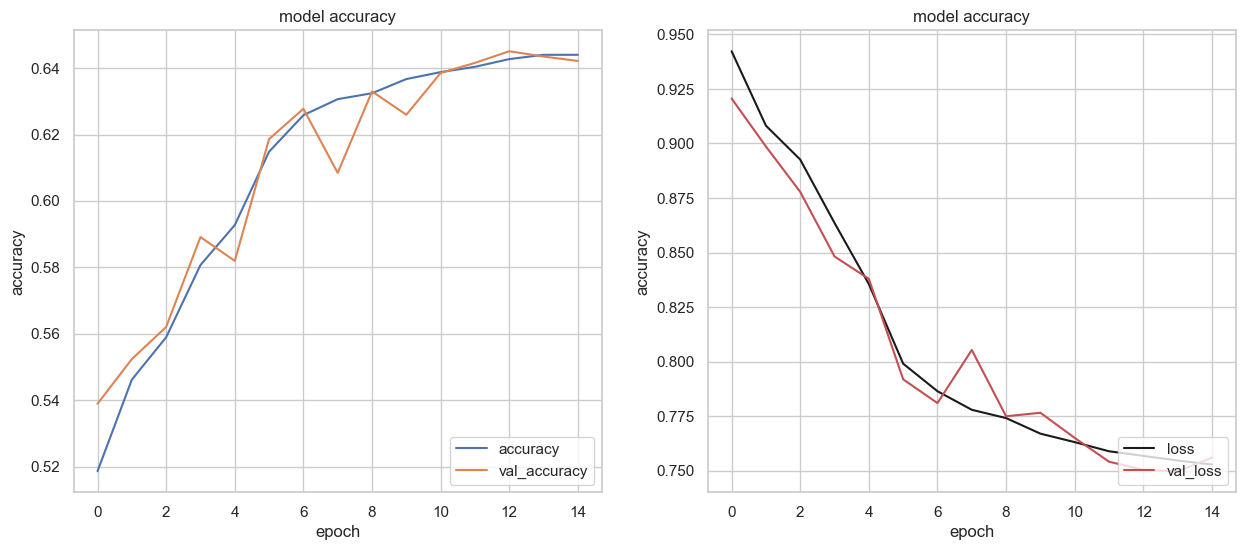

In [53]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss', color='k')
plt.plot(history.history['val_loss'], label='val_loss', color='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [54]:
pd.DataFrame.from_dict(model_results,orient='index').sort_values(by=['f1_test','accuracy_test'],ascending=False)

accuracy_train  accuracy_test  f1_train   f1_test
Random Forest           0.985142       0.820698     0.985137  0.820426
LightGBMClassifier      0.854646       0.816613     0.855105  0.817010
XGBClassifier           0.815820       0.804682     0.816289  0.805145
CatBoostClassifier      0.810177       0.803139     0.810493  0.803475
KNN                     0.838342       0.769272     0.834652  0.762840
Decision Tree           0.909617       0.762422     0.909496  0.761874
GradientBoost           0.747944       0.748250     0.748883  0.749153
AdaBoost                0.722380       0.722245     0.722928  0.722752
MLPClassifier           0.662957       0.657344     0.657041  0.651574
Logistic Regression     0.565023       0.563545     0.555625  0.553994
LSTM                    0.644023       0.641463          NaN       NaN

## Task 1
Prepare a complete data analysis report on the given data.
* The exploratory analysis is performed and the insights are given above.

## Task 2

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

* In this multiclass classification problem, the `CatBoostClassifier` appears to be the best model. It is generalising the models well.   
* XGBClassifier is also showing similar performance of that of CatBoostClassifier.
* Both RandomForest and LightGBM are overfitting.
* Logistic Regression is the least performing model with accuracy of 56% approx. 

## Task 3

Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings.

* Conduct thorough seismic hazard assessments to understand the potential risks in different regions.
* Identify active fault lines, seismic activity patterns, and historical earthquake data to determine areas at higher risk.
* Advocate for and enforce strict building codes and regulations that incorporate seismic-resistant design principles.
* Ensure that all new construction projects adhere to seismic standards and guidelines. 
* Encourage retrofitting of existing buildings to improve their seismic resilience.
* Prioritize retrofitting for older buildings and critical infrastructure that may not meet current seismic standards.
* Implement land use planning strategies that consider seismic hazards when locating critical infrastructure, such as hospitals, schools, and emergency response facilities.
* Avoid construction in high-risk areas prone to liquefaction, landslides, or other seismic hazards.
* Incorporate redundancy and robustness into infrastructure systems to minimize disruptions and ensure rapid recovery.